# CUSTOMER SATISFACTION
## Prediction of the Sentiment |Trustpilot reviews

**Authors:** Aysle Jafarova and Marion Diop


## Introduction

Online reviews play a crucial role in shaping consumer decisions and the reputation of businesses. Trustpilot.com, a popular review platform, hosts a vast amount of user-generated reviews covering a wide range of products and services. This Jupyter Notebook is dedicated to the task of sentiment analysis for reviews posted on Trustpilot.com. The primary goal is to classify these reviews into positive or negative sentiments.


## Objectives 

Our objectives include:

1. **Effective Data Cleaning and Preparation:** Thorough data cleaning enhances model performance.

2. **Accurate Sentiment Classification:** The model should correctly classify reviews as positive or negative.

3. **High Accuracy and Performance:** Achieving high accuracy and performance is crucial, measured by various metrics.

4. **Effective Visualization and Interpretation:** Results will be visualized and interpreted for valuable insights.


## Data source and collection

The data for this analysis was collected by web scraping Trustpilot.com using Python's BeautifulSoup library. The dataset contains various customer comments on appliances and electronics, including both positive and negative reviews. 


## Methodology and approach

In this notebook, we take a structured approach to predicting the sentiment of Trustpilot reviews. The main steps are:

1. **Pre-processing the data:** We will clean and preprocess the text data, as well as the metadata.

2. **Labelling:** We will use the star ratings associated with each review to label the sentiment as positive or negative. Reviews with 4 or 5 stars are labelled as positive, while reviews with 1, 2 or 3 stars are labelled as negative.

3. **Text vectorisation:** To analyse the text data, we will use techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text into numerical features.

4. **Modelling:** We will build and train machine learning models for sentiment classification. Various algorithms including Logistic Regression, Random Forest and Extreme Gradient Boosting are considered.

5. **Model evaluation:** The performance of the models is evaluated using metrics such as accuracy, precision, recall and F1 score. 

6. **Interpretation and insights:** We will interpret the results, identify important features and gain insights into the sentiment of Trustpilot ratings.


## Structure of the notebook

This notebook is divided into the following sections:

1. **Pre-processing and visualisation**
2. **Text Mining**
3. **Machine learning model for metadata**   
4. **Machine learning model for textdata**
5. **KMeans clustering for textdata**
6. **Neuronal network with text and metadata**
7. **Interpretation of the best models**
8. **Conclusion**


### Import most used Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Visualization and Exploration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split

# Machine Learning (ML)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.ensemble import BalancedRandomForestClassifier

# Evaluation and Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import classification_report_imbalanced

#General Utility and Data Serialization
from joblib import dump, load


### Import the dataset

In [2]:
# Load DataFrame from the CSV file
df = pd.read_csv('D:\\DataScientest\\Projekt\\reviews.csv', lineterminator='\n', header=0)

# Assign unique index numbers
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

Name Number of reviews Country  \
0       David Kv          1 review      US   
1          Ayden          1 review      US   
2      Christina         2 reviews      US   
3           Jess         2 reviews      US   
4  David Kennedy          1 review      US   

                                      Title  \
0                        No phone # to call   
1                      Great used tech site   
2  The order was quickly filled- and while…   
3                            Trusted Seller   
4                                Good price   

                                             Comment Date of comment  \
0  Item showed up defective with only one earbud ...     Jun 2, 2023   
1  Great used tech site, ordered 5 or 6 times now...      5 days ago   
2  The order was quickly filled- and while I have...     Jun 6, 2023   
3  I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4  Good price, great product.  Shipping not as fa...      5 days ago   

       Date of experience Company     Response Date of response  \
0  ['May', '19,', '2023']     A4C  No response                    
1  ['May', '25,', '2023']     A4C  No response                    
2  ['May', '20,', '2023']     A4C  No response                    
3  ['May', '19,', '2023']     A4C  No response                    
4  ['May', '26,', '2023']     A4C  No response                    

                    Stars  
0  Rated 1 out of 5 stars  
1  Rated 5 out of 5 stars  
2  Rated 5 out of 5 stars  
3  Rated 5 out of 5 stars  
4  Rated 4 out of 5 stars

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353345 entries, 0 to 353344
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Name                353249 non-null  object
 1   Number of reviews   353345 non-null  object
 2   Country             353344 non-null  object
 3   Title               353324 non-null  object
 4   Comment             353345 non-null  object
 5   Date of comment     353345 non-null  object
 6   Date of experience  353345 non-null  object
 7   Company             353345 non-null  object
 8   Response            353344 non-null  object
 9   Date of response    353345 non-null  object
 10  Stars               353345 non-null  object
dtypes: object(11)
memory usage: 29.7+ MB


### Description of columns in the file:

- Name: Username of the customer who wrote the comment
- Number of reviews: Number of reviews the customer has written
- Country: Country of the customer
- Title: Title of the comment
- Comment: Main body of the customer's comment
- Date of comment: Date when the customer's comment was posted
- Date of experience: Date of the customer's experience with the product
- Company: Company about which the comment was written
- Response: Captures any response provided by the company
- Date of response: Date of the company's response
- Stars: Rating given by the customer



# **Preprocessing and Visualization**



In [5]:
# Handling NaN values
df.isna().sum()/df.shape[0]*100

Name                  0.027169
Number of reviews     0.000000
Country               0.000283
Title                 0.005943
Comment               0.000000
Date of comment       0.000000
Date of experience    0.000000
Company               0.000000
Response              0.000283
Date of response      0.000000
Stars                 0.000000
dtype: float64

As the percentage of missing values is very low, they are deleted in the next step.

In [6]:
# Delete missing values
df=df.dropna()

In [7]:
# Handeling duplicates
print(df.duplicated().sum())

0


-> No duplicates in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353228 entries, 0 to 353344
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Name                353228 non-null  object
 1   Number of reviews   353228 non-null  object
 2   Country             353228 non-null  object
 3   Title               353228 non-null  object
 4   Comment             353228 non-null  object
 5   Date of comment     353228 non-null  object
 6   Date of experience  353228 non-null  object
 7   Company             353228 non-null  object
 8   Response            353228 non-null  object
 9   Date of response    353228 non-null  object
 10  Stars               353228 non-null  object
dtypes: object(11)
memory usage: 32.3+ MB


## Stars

The 'Stars' column contains unnecessary text. For further processing of the data we only need the number of rating.

In [9]:
# Splitting each value in the 'Stars' column 
df['Stars'] = df['Stars'].apply(lambda rating: rating.split(' ')[1])

# Converting to integer
df['Stars']=df['Stars'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353228 entries, 0 to 353344
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Name                353228 non-null  object
 1   Number of reviews   353228 non-null  object
 2   Country             353228 non-null  object
 3   Title               353228 non-null  object
 4   Comment             353228 non-null  object
 5   Date of comment     353228 non-null  object
 6   Date of experience  353228 non-null  object
 7   Company             353228 non-null  object
 8   Response            353228 non-null  object
 9   Date of response    353228 non-null  object
 10  Stars               353228 non-null  int32 
dtypes: int32(1), object(10)
memory usage: 31.0+ MB


### Visualize the number of stars

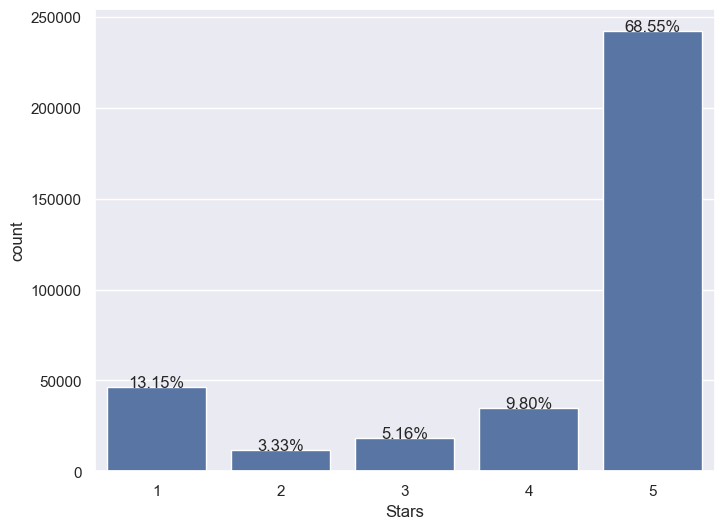

In [10]:
# Activate the Seaborn default theme
sns.set()

# Calculate the percentages for each category
total = float(len(df))  

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Stars', data=df)  

# Iterate through each bar's height and add the percentage
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width() / 2., height+3, '{:.2%}'.format(height/total), ha="center")

plt.show()

The ratings with 5 stars are the most common.

-> Imbalanced Dataset



## Sentiment

Create a new column 'Sentiment' from 'Stars', where ratings 5 and 4 are set to 'pos' and ratings 3,2 and 1 are set to 'neg'.

In [11]:
df['Sentiment'] = df['Stars'].replace(to_replace = [5,4,3,2,1], value = ['pos','pos','neg','neg','neg'])

Once the "Sentiment" column has been successfully created, "Stars" can be deleted.

In [12]:
# Delete 'Stars'
df=df.drop('Stars',axis=1)

### Visualize the number of positive and negative Sentiments

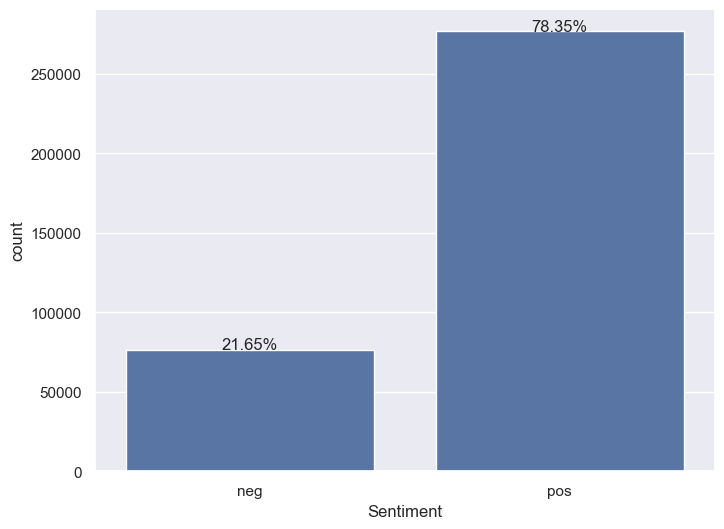

In [13]:
# Calculate the percentages for each category
total = float(len(df))  

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sentiment', data=df)  

# Iterate through each bar's height and add the percentage
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width() / 2., height+3, '{:.2%}'.format(height/total), ha="center")

plt.show()

Here, too, you can see that the majority of reviews are rated positively.

In [14]:
# To keep a better overview, putting the 'Sentiment' column (Target) on the first place.
df = pd.DataFrame.reindex(df,columns = ['Sentiment','Name', 'Number of reviews','Country', 'Title', 'Comment', 'Date of comment', 'Date of experience',
                                        'Company','Response', 'Date of response'])

df.head()

Sentiment           Name Number of reviews Country  \
0       neg       David Kv          1 review      US   
1       pos          Ayden          1 review      US   
2       pos      Christina         2 reviews      US   
3       pos           Jess         2 reviews      US   
4       pos  David Kennedy          1 review      US   

                                      Title  \
0                        No phone # to call   
1                      Great used tech site   
2  The order was quickly filled- and while…   
3                            Trusted Seller   
4                                Good price   

                                             Comment Date of comment  \
0  Item showed up defective with only one earbud ...     Jun 2, 2023   
1  Great used tech site, ordered 5 or 6 times now...      5 days ago   
2  The order was quickly filled- and while I have...     Jun 6, 2023   
3  I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4  Good price, great product.  Shipping not as fa...      5 days ago   

       Date of experience Company     Response Date of response  
0  ['May', '19,', '2023']     A4C  No response                   
1  ['May', '25,', '2023']     A4C  No response                   
2  ['May', '20,', '2023']     A4C  No response                   
3  ['May', '19,', '2023']     A4C  No response                   
4  ['May', '26,', '2023']     A4C  No response

## Name

Since the names are not of interest to the model, the column is deleted.

In [15]:
df=df.drop('Name',axis=1)
df.head()

Sentiment Number of reviews Country  \
0       neg          1 review      US   
1       pos          1 review      US   
2       pos         2 reviews      US   
3       pos         2 reviews      US   
4       pos          1 review      US   

                                      Title  \
0                        No phone # to call   
1                      Great used tech site   
2  The order was quickly filled- and while…   
3                            Trusted Seller   
4                                Good price   

                                             Comment Date of comment  \
0  Item showed up defective with only one earbud ...     Jun 2, 2023   
1  Great used tech site, ordered 5 or 6 times now...      5 days ago   
2  The order was quickly filled- and while I have...     Jun 6, 2023   
3  I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4  Good price, great product.  Shipping not as fa...      5 days ago   

       Date of experience Company     Response Date of response  
0  ['May', '19,', '2023']     A4C  No response                   
1  ['May', '25,', '2023']     A4C  No response                   
2  ['May', '20,', '2023']     A4C  No response                   
3  ['May', '19,', '2023']     A4C  No response                   
4  ['May', '26,', '2023']     A4C  No response

## Number of reviews

Convert this column to an integer

In [16]:
# Splitting each value in the 'Number of reviews' column 
df['Number of reviews'] = df['Number of reviews'].apply(lambda rating: rating.split(' ')[0])

# Converting to integer
df['Number of reviews']=df['Number of reviews'].astype('int')

# Renaming the column 'Number of reviews'
dic={'Number of reviews':'Num_of_reviews'}
df=df.rename(dic,axis=1)


df.head()

Sentiment  Num_of_reviews Country                                     Title  \
0       neg               1      US                        No phone # to call   
1       pos               1      US                      Great used tech site   
2       pos               2      US  The order was quickly filled- and while…   
3       pos               2      US                            Trusted Seller   
4       pos               1      US                                Good price   

                                             Comment Date of comment  \
0  Item showed up defective with only one earbud ...     Jun 2, 2023   
1  Great used tech site, ordered 5 or 6 times now...      5 days ago   
2  The order was quickly filled- and while I have...     Jun 6, 2023   
3  I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4  Good price, great product.  Shipping not as fa...      5 days ago   

       Date of experience Company     Response Date of response  
0  ['May', '19,', '2023']     A4C  No response                   
1  ['May', '25,', '2023']     A4C  No response                   
2  ['May', '20,', '2023']     A4C  No response                   
3  ['May', '19,', '2023']     A4C  No response                   
4  ['May', '26,', '2023']     A4C  No response

## Country




"Country" is removed because the majority of comments in the data set come from the USA and the UK, which again creates an imbalance.

In [ ]:
# Deleting Countries
df=df.drop('Country',axis=1)

## Title

The Title column often contains the same words as the Comment column.
In order not to give the individual words too much weight, we only add the title to the comments if it is not already there in the comments.

In [18]:
# Check if the content of 'Title' is present in 'Comment'
for index, row in df.iterrows():
    if row['Title'] not in row['Comment']:
        # Check if 'Comment' is equal to 'No comment'
        if row['Comment'] == 'No comment':
            # Delete 'No comment' from the cell and write the content of 'Title'
            df.at[index, 'Comment'] = row['Title']
        else:
            # Write the content of 'Title' into 'Comment', keeping the text of 'Comment'
            df.at[index, 'Comment'] += ' ' + row['Title']

     

In [19]:
df.head(20)

Sentiment  Num_of_reviews  \
0        neg               1   
1        pos               1   
2        pos               2   
3        pos               2   
4        pos               1   
5        pos               1   
6        pos               1   
7        pos               2   
8        neg               2   
9        pos               2   
10       pos               1   
11       neg               1   
12       pos               1   
13       pos               1   
14       pos               1   
15       pos               1   
16       pos               2   
17       pos               3   
18       neg               1   
19       pos               2   

                                                Title  \
0                                  No phone # to call   
1                                Great used tech site   
2            The order was quickly filled- and while…   
3                                      Trusted Seller   
4                                          Good price   
5                    Product and price were fantastic   
6                                        Good speaker   
7                                      After ordering   
8                               DO NOT BUY FROM A4C!!   
9                      Cost Efficient and Expeditious   
10             Very good communication and help with…   
11             I received a defective damaged speaker   
12                                Quick easy ordering   
13                                Super fast shipping   
14                            Excellent Communication   
15                Fast shipping and ease of checkout.   
16  The JVC Earbuds that I ordered came within a f...   
17                                 Great in every way   
18                    Speaker will not connect using…   
19                 Awesome product and quick delivery   

                                              Comment Date of comment  \
0   Item showed up defective with only one earbud ...     Jun 2, 2023   
1   Great used tech site, ordered 5 or 6 times now...      5 days ago   
2   The order was quickly filled- and while I have...     Jun 6, 2023   
3   I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4   Good price, great product.  Shipping not as fa...      5 days ago   
5   Product and price were fantastic! The JBL ear ...     Jun 3, 2023   
6   I have a strong affinity for this product. Whe...    May 30, 2023   
7   After ordering, the delivery was fast and the ...      6 days ago   
8   I should have done my research about this comp...    May 12, 2023   
9   The cost and efficiency of the purchase was wo...     Jun 3, 2023   
10  Very good communication and help with the onli...     May 5, 2023   
11  I received a defective damaged speaker. I sent...     May 5, 2023   
12  Quick easy ordering, product was as described,...     Jun 2, 2023   
13  Super fast shipping, tracking info sent. Price...    May 30, 2023   
14  Lots of notifications giving status of order u...      4 days ago   
15                Fast shipping and ease of checkout.     Jun 4, 2023   
16  The JVC Earbuds that I ordered came within a f...    May 13, 2023   
17  Fast shipping, item brand new and sealed as de...    Apr 12, 2023   
18  Speaker will not connect using Bluetooth. Trie...     May 6, 2023   
19                 Awesome product and quick delivery     Jun 4, 2023   

          Date of experience Company     Response Date of response  
0     ['May', '19,', '2023']     A4C  No response                   
1     ['May', '25,', '2023']     A4C  No response                   
2     ['May', '20,', '2023']     A4C  No response                   
3     ['May', '19,', '2023']     A4C  No response                   
4     ['May', '26,', '2023']     A4C  No response                   
5     ['May', '19,', '2023']     A4C  No response                   
6     ['May', '16,', '2023']     A4C  No response                   
7     ['May', '22,', '2023']     A4C  No respo

After this, we can delete 'Title'

In [20]:
# Deleting Title
df=df.drop('Title',axis=1)
df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment Date of comment  \
0  Item showed up defective with only one earbud ...     Jun 2, 2023   
1  Great used tech site, ordered 5 or 6 times now...      5 days ago   
2  The order was quickly filled- and while I have...     Jun 6, 2023   
3  I recently ordered some wireless earbuds from ...     Jun 2, 2023   
4  Good price, great product.  Shipping not as fa...      5 days ago   

       Date of experience Company     Response Date of response  
0  ['May', '19,', '2023']     A4C  No response                   
1  ['May', '25,', '2023']     A4C  No response                   
2  ['May', '20,', '2023']     A4C  No response                   
3  ['May', '19,', '2023']     A4C  No response                   
4  ['May', '26,', '2023']     A4C  No response

## **Date of comment**

Split the column into three columns:

*   com_day
*   com_month
*   com_year

In [21]:
# Replacing values
df=df.replace(to_replace=['A day ago','a day ago','1 day ago','1 days ago','2 days ago','3 days ago','4 days ago','5 days ago','6 days ago','7 days ago'],
                value=['Jun 13, 2023','Jun 13, 2023','Jun 13, 2023','Jun 13, 2023','Jun 12, 2023','Jun 11, 2023','Jun 10, 2023','Jun 9, 2023','Jun 8, 2023','Jun 7, 2023'])

df=df.replace(to_replace=['Updated A day ago','Updated a day ago','Updated 1 day ago','Updated 1 days ago','Updated 2 days ago','Updated 3 days ago','Updated 4 days ago','Updated 5 days ago','Updated 6 days ago','Updated 7 days ago'],
                value=['Jun 13, 2023','Jun 13, 2023','Jun 13, 2023','Jun 13, 2023','Jun 12, 2023','Jun 11, 2023','Jun 10, 2023','Jun 9, 2023','Jun 8, 2023','Jun 7, 2023'])

df=df.replace(to_replace=['Updated 16 hours ago','Updated 17 hours ago','An hour ago','1 hour ago','2 hours ago','3 hours ago','4 hours ago','5 hours ago','6 hours ago','7 hours ago','8 hours ago','9 hours ago','10 hours ago','11 hours ago','12 hours ago','13 hours ago',
                            '14 hours ago','15 hours ago','16 hours ago','17 hours ago','18 hours ago','19 hours ago','20 hours ago','21 hours ago','22 hours ago','23 hours ago','24 hours ago','one hour ago','a hour ago'],
                value=['Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                       'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023'])


df=df.replace(to_replace=['1 minutes ago','2 minutes ago','3 minutes ago','4 minutes ago','5 minutes ago','6 minutes ago','7 minutes ago','8 minutes ago','9 minutes ago','10 minutes ago',
                            '11 minutes ago','12 minutes ago','13 minutes ago','14 minutes ago','15 minutes ago','16 minutes ago','17 minutes ago','18 minutes ago','19 minutes ago','20 minutes ago',
                            '21 minutes ago','22 minutes ago','23 minutes ago','24 minutes ago','25 minutes ago','26 minutes ago','27 minutes ago','28 minutes ago','29 minutes ago','30 minutes ago',
                            '31 minutes ago','32 minutes ago','33 minutes ago','34 minutes ago','35 minutes ago','36 minutes ago','37 minutes ago','38 minutes ago','39 minutes ago','40 minutes ago',
                            '41 minutes ago','42 minutes ago','43 minutes ago','44 minutes ago','45 minutes ago','46 minutes ago','47 minutes ago','48 minutes ago','49 minutes ago','50 minutes ago',
                            '51 minutes ago','52 minutes ago','53 minutes ago','54 minutes ago','55 minutes ago','56 minutes ago','57 minutes ago','58 minutes ago','59 minutes ago','160 minutes ago'],
                 value=['Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                        'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                        'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                        'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                        'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023',
                        'Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023','Jun 14, 2023'])

# Splitting each value 
df['com_day'] = df['Date of comment'].apply(lambda date: date.split(' ')[-2])
df['com_month'] = df['Date of comment'].apply(lambda date: date.split(' ')[-3])
df['com_year'] = df['Date of comment'].apply(lambda date: date.split(' ')[-1])

# Replacing values 
df=df.replace(to_replace=['1,','2,','3,','4,','5,','6,','7,','8,','9,','10,','11,','12,','13,','14,','15,','16,','17,','18,','19,','20,','21,','22,','23,','24,','25,','26,','27,','28,','29,','30,','31,'],
                value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

df=df.replace(to_replace=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                value=[1,2,3,4,5,6,7,8,9,10,11,12])
df=df.replace(to_replace=['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012'],
                value=[2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012])

# Delete the 'Date of comment' column
df=df.drop('Date of comment', axis=1)

df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment      Date of experience  \
0  Item showed up defective with only one earbud ...  ['May', '19,', '2023']   
1  Great used tech site, ordered 5 or 6 times now...  ['May', '25,', '2023']   
2  The order was quickly filled- and while I have...  ['May', '20,', '2023']   
3  I recently ordered some wireless earbuds from ...  ['May', '19,', '2023']   
4  Good price, great product.  Shipping not as fa...  ['May', '26,', '2023']   

  Company     Response Date of response  com_day  com_month  com_year  
0     A4C  No response                         2          6      2023  
1     A4C  No response                         9          6      2023  
2     A4C  No response                         6          6      2023  
3     A4C  No response                         2          6      2023  
4     A4C  No response                         9          6      2023

## **Date of experience**

Deleting, because correlate with Date of Comment

In [22]:
df=df.drop('Date of experience', axis=1)

df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment Company     Response  \
0  Item showed up defective with only one earbud ...     A4C  No response   
1  Great used tech site, ordered 5 or 6 times now...     A4C  No response   
2  The order was quickly filled- and while I have...     A4C  No response   
3  I recently ordered some wireless earbuds from ...     A4C  No response   
4  Good price, great product.  Shipping not as fa...     A4C  No response   

  Date of response  com_day  com_month  com_year  
0                         2          6      2023  
1                         9          6      2023  
2                         6          6      2023  
3                         2          6      2023  
4                         9          6      2023

## **Company**


Deleting, because it is not neccessary for our analysis. We do not want to analyse a specific company, but rather get a general overview of how the comments affect sentiment. 

In [23]:
df=df.drop('Company',axis=1)
df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment     Response  \
0  Item showed up defective with only one earbud ...  No response   
1  Great used tech site, ordered 5 or 6 times now...  No response   
2  The order was quickly filled- and while I have...  No response   
3  I recently ordered some wireless earbuds from ...  No response   
4  Good price, great product.  Shipping not as fa...  No response   

  Date of response  com_day  com_month  com_year  
0                         2          6      2023  
1                         9          6      2023  
2                         6          6      2023  
3                         2          6      2023  
4                         9          6      2023

## **Response**

Distinguish whether a response is present or not.

In [24]:
def response(Comment):
    if Comment =='No response':
        return 0
    else:
        return 1

df['Response']= df['Response'].apply(response)

### Create the countplot

In this diagram we want to illustrate how the 'presence' or 'absence' of company responses to a comment relates to sentiment.

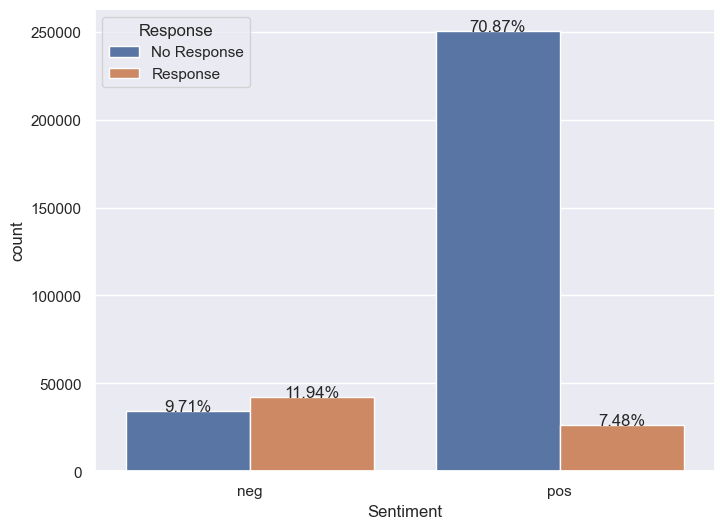

In [25]:
# Total number of reviews
total = float(len(df))  

# Size of the countplot
plt.figure(figsize=(8, 6))

# Create a countplot
ax = sns.countplot(x="Sentiment", hue="Response", data=df)

# Add alegend
ax.legend(title='Response', labels=['No Response', 'Response'])

# Iterate through each bar's height and add the percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2%}'.format(height / total), ha="center")

# Show the countplot
plt.show()

-> If the rating is positive, replies are written less often than if the rating is negative.

In [26]:
df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment  Response  \
0  Item showed up defective with only one earbud ...         0   
1  Great used tech site, ordered 5 or 6 times now...         0   
2  The order was quickly filled- and while I have...         0   
3  I recently ordered some wireless earbuds from ...         0   
4  Good price, great product.  Shipping not as fa...         0   

  Date of response  com_day  com_month  com_year  
0                         2          6      2023  
1                         9          6      2023  
2                         6          6      2023  
3                         2          6      2023  
4                         9          6      2023

## **Date of response**

Split into 3 columns:

*   res_day
*   res_month
*   res_year

In [27]:
# Replacing values
df=df.replace(to_replace=[' '],value=['0 0 0']) # when there was no response

df=df.replace(to_replace=['Reply from ao.comA day ago', 'Reply from ao.com3 hours ago', 'Reply from Miele Great Britain7 days ago', 'Reply from SteelSeries2 days ago', 'Reply from SteelSeries7 days ago',
                            'Reply from BoschA day ago', 'Reply from Bosch5 days ago', 'Reply from Bosch6 days ago', 'Reply from Miele Great Britain6 days ago', 'Reply from Miele Great BritainUpdated 7 days ago',
                            'Reply from Bosch Home UK7 hours ago', 'Reply from Bosch Home UK10 hours ago', 'Reply from Bosch Home UKA day ago', 'Reply from Bosch Home UKA day ago', 'Reply from Dyson UK6 days ago',
                            'Reply from Dyson UK5 days ago', 'Reply from Dyson UK17 hours ago', 'Reply from Bosch Home UKUpdated 2 days ago', 'Reply from Bosch Home UK5 days ago', 'Reply from Bosch Home UK6 days ago',
                            'Reply from Dyson UK3 days ago', 'Reply from Dyson UK4 days ago', 'Reply from Bosch Home UK2 days ago', 'Reply from Bosch Home UKUpdated a day ago', 'Reply from Bosch Home UK2 days ago',
                            'Reply from CASETiFY2 hours ago', 'Reply from CASETiFY3 hours ago', 'Reply from CASETiFY3 hours ago', 'Reply from CASETiFY4 hours ago', 'Reply from CASETiFY2 days ago', 'Reply from CASETiFYA day ago',
                            'Reply from CASETiFY20 hours ago', 'Reply from CASETiFY4 hours ago', 'Reply from CASETiFYUpdated a day ago', 'Reply from CASETiFY5 days ago', 'Reply from CASETiFY7 days ago',
                            'Reply from CASETiFYUpdated 7 days ago', 'Reply from CASETiFY6 days ago', 'Reply from CASETiFYUpdated 6 days ago', 'Reply from Currys 13 hours ago', 'Reply from Currys 2 days ago',
                            'Reply from Currys 16 hours ago', 'Reply from Currys 19 hours ago', 'Reply from Currys 14 hours ago', 'Reply from Currys 15 hours ago', 'Reply from Currys A day ago', 'Reply from Currys 18 hours ago',
                            'Reply from Currys 3 days ago', 'Reply from Currys 4 days ago', 'Reply from Currys 5 days ago', 'Reply from Currys 6 days ago', 'Reply from Currys 7 days ago', 'Reply from Dyson UK4 days ago',
                            'Reply from Nebraska Furniture Mart3 days ago', 'Reply from Nebraska Furniture MartA day ago', 'Reply from Nebraska Furniture Mart11 minutes ago', 'Reply from Nebraska Furniture Mart20 hours ago',
                            'Reply from Nebraska Furniture Mart6 days ago', 'Reply from Nebraska Furniture Mart22 minutes ago', 'Reply from Nebraska Furniture Mart5 days ago', 'Reply from Nebraska Furniture Mart4 days ago',
                            'Reply from Nebraska Furniture Mart7 days ago', 'Reply from Nebraska Furniture Mart21 hours ago', 'Reply from Nebraska Furniture MartUpdated 4 days ago', 'Reply from Nebraska Furniture Mart18 minutes ago'],
                value=['Reply from A4CUpdated Jun 13, 2023', 'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 7, 2023', 'Reply from A4CUpdated Jun 12, 2023', 'Reply from A4CUpdated Jun 7, 2023',
                       'Reply from A4CUpdated Jun 13, 2023', 'Reply from A4CUpdated Jun 9, 2023', 'Reply from A4CUpdated Jun 8, 2023', 'Reply from A4CUpdated Jun 8, 2023', 'Reply from A4CUpdated Jun 7, 2023' ,
                       'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 14, 2023' , 'Reply from A4CUpdated Jun 13, 2023' , 'Reply from A4CUpdated Jun 13, 2023' , 'Reply from A4CUpdated Jun 8, 2023' ,
                       'Reply from A4CUpdated Jun 9, 2023' , 'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 12, 2023', 'Reply from A4CUpdated Jun 9, 2023', 'Reply from A4CUpdated Jun 8, 2023',
                       'Reply from A4CUpdated Jun 11, 2023', 'Reply from A4CUpdated Jun 10, 2023', 'Reply from A4CUpdated Jun 12, 2023' , 'Reply from A4CUpdated Jun 13, 2023', 'Reply from A4CUpdated Jun 12, 2023',
                       'Reply from A4CUpdated Jun 14, 2023' , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 12, 2023',
                       'Reply from A4CUpdated Jun 13, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 13, 2023'  , 'Reply from A4CUpdated Jun 9, 2023'  ,
                       'Reply from A4CUpdated Jun 7, 2023'  , 'Reply from A4CUpdated Jun 7, 2023'  , 'Reply from A4CUpdated Jun 8, 2023'  , 'Reply from A4CUpdated Jun 8, 2023', 'Reply from A4CUpdated Jun 14, 2023'  ,
                       'Reply from A4CUpdated Jun 12, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  ,
                       'Reply from A4CUpdated Jun 13, 2023'  , 'Reply from A4CUpdated Jun 14, 2023'  , 'Reply from A4CUpdated Jun 11, 2023'  , 'Reply from A4CUpdated Jun 10, 2023'  , 'Reply from A4CUpdated Jun 9, 2023'  ,
                       'Reply from A4CUpdated Jun 8, 2023'  , 'Reply from A4CUpdated Jun 7, 2023'  , 'Reply from A4CUpdated Jun 10, 2023', 'Reply from A4CUpdated Jun 11, 2023', 'Reply from A4CUpdated Jun 13, 2023',
                       'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 8, 2023', 'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 9, 2023',
                       'Reply from A4CUpdated Jun 10, 2023', 'Reply from A4CUpdated Jun 7, 2023', 'Reply from A4CUpdated Jun 14, 2023', 'Reply from A4CUpdated Jun 10, 2023', 'Reply from A4CUpdated Jun 14, 2023' ] )

# Splitting each value 
df['res_day'] = df['Date of response'].apply(lambda date: date.split(' ')[-2])
df['res_month'] = df['Date of response'].apply(lambda date: date.split(' ')[-3])
df['res_year'] = df['Date of response'].apply(lambda date: date.split(' ')[-1])

# Replacing values
df=df.replace(to_replace=['0','3,','30,','17,','26,','6,','8,', '29,', '14,', '10,','4,', '19,', '13,', '20,', '18,', '16,', '21,', '23,', '9,', '25,','27,', '11,', '5,', '22,', '15,', '12,', '7,', '1,', '31,', '28,','24,','2,'],
                value=[0,3,30, 17, 26, 6, 8, 29, 14, 10, 11, 19, 13, 20, 18, 16, 21, 23, 9, 25,27, 11, 5, 22, 15, 12, 7, 1, 31, 28,24, 2])


df=df.replace(to_replace=['0', 'Apr', 'A4CMar', 'A4CApr', 'A4CDec', 'A4CSep', 'A4CAug','A4CJun', 'A4CMay', 'A4CJan', 'A4CNov', 'A4COct', 'A4CFeb','A4CJul', 'Jun', 'ao.comMay', 'May', 'ao.comFeb', 'ao.comSep',
                            'ao.comDec', 'Dec', 'Sep', 'ao.comAug', 'ao.comOct', 'Feb', 'Aug','ao.comJan', 'ao.comJul', 'Jul', 'ao.comMar', 'ao.comJun','ao.comApr', 'BekoJun', 'BekoMay', 'BekoApr', 'BekoMar', 'Mar',
                            'BekoFeb', 'BekoJan', 'BekoDec', 'BekoNov', 'BekoOct', 'Oct','BekoSep', 'BekoAug', 'BekoJul', 'Nov', 'BoschJun', 'BoschMay','BoschApr', 'BoschMar', 'BoschNov', 'BoschJan', 'BoschOct',
                            'BoschFeb', 'BoschDec', 'BoschSep', 'BoschAug', 'BoschJul', 'Jan','UKJun', 'UKMay', 'UKApr', 'UKMar', 'UKFeb', 'UKJan', 'UKDec','UKNov', 'UKOct', 'UKSep', 'UKAug', 'UKJul', 'CASETiFYJun',
                            'CASETiFYMay', 'CASETiFYApr', 'CASETiFYMar', 'CASETiFYFeb','CASETiFYJan', 'CASETiFYDec', 'CASETiFYNov', 'CASETiFYOct','CASETiFYSep', 'CASETiFYAug', 'CASETiFYJul', 'OutfitterMay',
                            'OutfitterNov', 'OutfitterMar', 'HiveJun', 'HiveMay', 'HiveApr','HiveMar', 'HiveFeb', 'HiveJan', 'HiveDec', 'HiveNov', 'HiveOct','HiveSep', 'HiveAug', 'HiveJul', 'GlobalJul', 'BritainJun',
                            'BritainMay', 'BritainApr', 'BritainMar', 'BritainFeb','BritainJan', 'BritainDec', 'BritainNov', 'BritainOct','BritainSep', 'BritainAug', 'BritainJul', 'PunkCaseNov',
                            'PunkCaseOct', 'PunkCaseSep', 'PunkCaseAug', 'PunkCaseJul','PunkCaseJun', 'PunkCaseMay', 'PunkCaseApr', 'PunkCaseMar','PunkCaseFeb', 'PunkCaseJan', 'PunkCaseDec', 'SteelSeriesJun',
                            'SteelSeriesMay', 'SteelSeriesFeb', 'SteelSeriesApr','SteelSeriesMar', 'SteelSeriesJan', 'SteelSeriesNov','SteelSeriesDec', 'SteelSeriesAug', 'SteelSeriesOct','SteelSeriesJul', 'SteelSeriesSep',
                            'ghdSep', 'ghdAug', 'ghdJun', 'ghdMay', 'ghdNov', 'ghdApr', 'ghdMar', 'ghdFeb', 'ghdJan', 'ghdOct', 'ghdJul', 'ghdDec', 'MartJun', 'MartMay', 'MartApr', 'MartMar', 'MartFeb', 'MartJan', 'MartDec',
                            'MartNov', 'MartOct', 'MartSep', 'MartAug', 'MartJul'],
                value=[0, 4, 3, 4, 12, 9, 8, 6, 5, 1, 11, 10, 2,7, 6, 5, 5, 2, 9,12, 12, 9, 8, 10, 2, 8,1, 7, 7, 3, 6, 4, 6, 5, 4, 3, 3, 2, 1, 12, 11, 10, 10, 9, 8, 7, 11, 6, 5, 4, 3, 11, 1, 10, 2, 12, 9, 8, 7, 1, 6, 5, 4, 3,
                       2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 5, 11, 3, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 6, 5, 2, 4,
                       3, 1, 11, 12, 8, 10, 7, 9, 9, 8,6, 5, 11, 4, 3, 2,1, 10, 7, 12, 6, 5,4, 3, 2, 1, 12, 11,10, 9, 8, 7])
df=df.replace(to_replace=['0', '2023', '2021', '2020', '2019', '2017', '2016', '2015','2014', '2022', '2018','2013', '2012'],
                value=[0, 2023, 2021, 2020, 2019, 2017, 2016, 2015,2014, 2022, 2018, 2013, 2012])

# Delete the'Date of response' column
df=df.drop('Date of response', axis=1)

df.head()

Sentiment  Num_of_reviews  \
0       neg               1   
1       pos               1   
2       pos               2   
3       pos               2   
4       pos               1   

                                             Comment  Response  com_day  \
0  Item showed up defective with only one earbud ...         0        2   
1  Great used tech site, ordered 5 or 6 times now...         0        9   
2  The order was quickly filled- and while I have...         0        6   
3  I recently ordered some wireless earbuds from ...         0        2   
4  Good price, great product.  Shipping not as fa...         0        9   

   com_month  com_year  res_day  res_month  res_year  
0          6      2023        0          0         0  
1          6      2023        0          0         0  
2          6      2023        0          0         0  
3          6      2023        0          0         0  
4          6      2023        0          0         0

# Text Mining

In this section we will take a closer look at the comments and prepare the texts for machine learning.

## Creation of metadata from the comments

**Determines the number of words in the comment**

In [28]:
df['Num_of_words'] = df['Comment'].str.split().str.len()

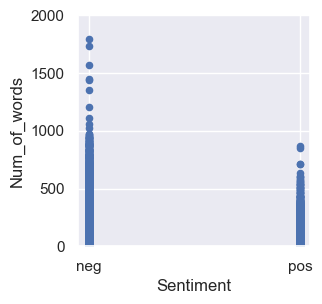

In [29]:
# Shows the Sentiment in relation to the number of words
df.plot(x='Sentiment',y='Num_of_words',kind='scatter',xlabel='Sentiment',ylabel='Num_of_words',
        figsize=(3, 3)).set_ylim(0,2000);

**Determines the number of  Capital letters**

In [30]:
df['Capital_count'] = df['Comment'].str.count('[A-Z]')

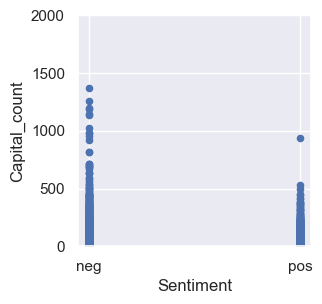

In [31]:
# Shows the Sentiment in relation to the number of capital letters
df.plot(x='Sentiment',y='Capital_count',kind='scatter',xlabel='Sentiment',ylabel='Capital_count',
       figsize=(3, 3)).set_ylim(0,2000);

In [32]:
# Shows the comments that have more than 1200 capital letters
df['Comment'].loc[df['Capital_count'] >1200] 

312924    I JUST WANT TO INFORM THE SAMSUNG COMPANY THAT...
314276    WELL LETS SEE WHERE DO I BEGIN!!! BRAND NEW SA...
315171    THEIR MESSAGE SYS WE WANT TO PROVIDE THE BEST ...
Name: Comment, dtype: object

**Determines the number of :) emoji**

In [33]:
df['Smile_count'] = df['Comment'].str.count(':\\)')

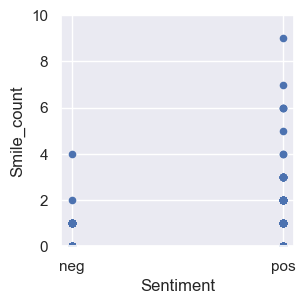

In [34]:
# Shows the Sentiment in relation to the number of positive emoji
df.plot(x='Sentiment',y='Smile_count',kind='scatter',xlabel='Sentiment',ylabel='Smile_count',
        figsize=(3, 3)).set_ylim(0,10);

In [35]:
# Shows the comment that has the most :) emoji
df['Comment'].loc[df['Smile_count'] ==9] 

185239    :):):):):):):):):)
Name: Comment, dtype: object

**Determines the number of :( emoji**

In [36]:
df['Sad_count'] = df['Comment'].str.count(':\\(')

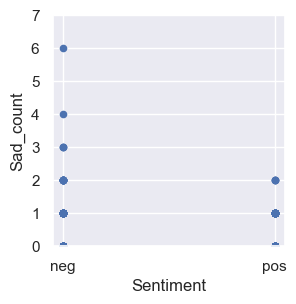

In [37]:
# Shows the Sentiment in relation to the number of negative emoji
df.plot(x='Sentiment',y='Sad_count',kind='scatter',xlabel='Sentiment',ylabel='Sad_count',
        figsize=(3, 3)).set_ylim(0,7);

**Determines the number of exclamation marks**

In [38]:
df['Exclamation_count'] = df['Comment'].str.count('!')

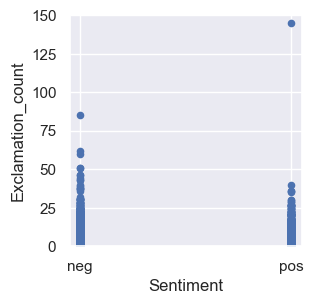

In [39]:
# Shows the Sentiment in relation to the number of exclamation marks
df.plot(x='Sentiment',y='Exclamation_count',kind='scatter',xlabel='Sentiment',ylabel='Exclamation_count',
        figsize=(3, 3)).set_ylim(0,150);

In [40]:
# Shows the comment that has more than 125 exclamation marks
print(df['Comment'].loc[df['Exclamation_count']>125])

290613    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
Name: Comment, dtype: object


**Determines the number of question marks**

In [41]:
df['Question_count'] = df['Comment'].str.count('\\?')

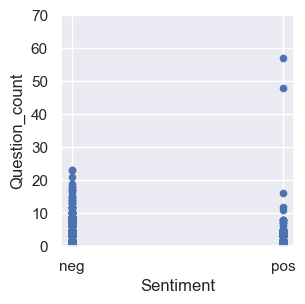

In [42]:
# Shows the Sentiment in relation to the number of question marks
df.plot(x='Sentiment',y='Question_count',kind='scatter',xlabel='Sentiment',ylabel='Question_count',
        figsize=(3, 3)).set_ylim(0,70);

**Determines the number of digits**

In [43]:
df['Integer_count'] = df['Comment'].str.count(r'\d')

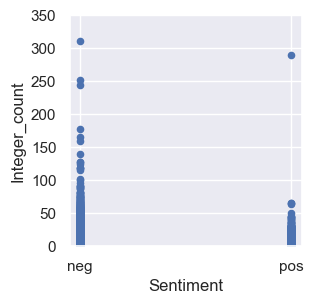

In [44]:
# Shows the Sentiment in relation to the number of digits
df.plot(x='Sentiment',y='Integer_count',kind='scatter',xlabel='Sentiment',ylabel='Integer_count',
        figsize=(3, 3)).set_ylim(0,350);

New Columns: 
- Num_of_words
- Capital_count
- Smile_count
- Sad_count
- Exclamation_count
- Question_count
- Interger_count

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353228 entries, 0 to 353344
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Sentiment          353228 non-null  object
 1   Num_of_reviews     353228 non-null  int32 
 2   Comment            353228 non-null  object
 3   Response           353228 non-null  int64 
 4   com_day            353228 non-null  int64 
 5   com_month          353228 non-null  int64 
 6   com_year           353228 non-null  int64 
 7   res_day            353228 non-null  int64 
 8   res_month          353228 non-null  int64 
 9   res_year           353228 non-null  int64 
 10  Num_of_words       353228 non-null  int64 
 11  Capital_count      353228 non-null  int64 
 12  Smile_count        353228 non-null  int64 
 13  Sad_count          353228 non-null  int64 
 14  Exclamation_count  353228 non-null  int64 
 15  Question_count     353228 non-null  int64 
 16  Integer_count      353228

## **Text cleaning**

The text must be cleaned up in the following steps in order to be prepared for the ML models.

A sample comment before text cleaning:

In [47]:
print(df.loc[5,'Comment'])

Product and price were fantastic! The JBL ear pods have a great sound quality, they hold a charge for a long period of time. They fit in perfect in my ear..they have not fallen out, but sometimes they feel like they are but are not…I think it is me just paranoid I am going to lose them.


**Stopwords generating**



In [49]:
# Import
import nltk
from nltk.corpus import stopwords

# Generates stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([",", ".", "?", ":", "!", "’", "/", ")", "'s", "(", "hair","n't", "ghd"])
print(stop_words)

{'both', 'their', 'no', "hadn't", 'she', 'it', 'a', 'an', 'isn', 'once', 're', 'Dyson', "needn't", 'of', 'y', "shouldn't", "won't", 'had', 'in', 'hasn', 'up', 'and', 'can', 'PunkCase', 's', 'couldn', 'by', 'here', 'how', 'which', 'm', ')', 'doesn', "you'll", 'under', "wouldn't", 'does', 'just', 'himself', "hasn't", "wasn't", 'then', 'now', 'if', 'should', 'those', 'we', 'or', 'Miele', 'Nebraska Furniture Mart', 'most', 'weren', 'him', 'o', 'Casefity', 'when', 'through', 'while', 'who', 'few', 'theirs', 'too', "should've", 'won', '/', 'did', 'been', "doesn't", 'any', 'ghd', 'is', 'ao', 'me', ':', 'after', "mustn't", 'shouldn', 'yours', 'Cellular Outfitter', 'ain', 'my', 'ourselves', 'but', 'so', 'LG', '(', 'hers', 'only', 'down', 'mightn', 'each', 'be', 'have', 'further', 'i', 'shan', 'our', 'with', 'will', 'against', 'that', 'Bissell', 'than', 'do', 'the', 'during', "it's", 'same', '.', "you've", 'needn', 'were', 'don', 'Bosch', 'until', 'he', 'Currys', 'A4C', 'over', 'having', 'Hive',

**Filtering stopwords**

In [50]:
# Function to filter stopwords
def stop_words_filtering(text):
    text = str(text).lower()
    tokens = text.split() 
    tokens_filtered = [word for word in tokens if word not in stop_words]
    return " ".join(tokens_filtered)

df['Comment'] = df['Comment'].apply(lambda x:stop_words_filtering(x))

**Cleaning text**

In [51]:
# Import
import re

# Function to clean the text
def review_cleaning(text):
    text = str(text).lower()   #Removes capital letters
    text = re.sub('\[.*?\]', '', text)  #Removes everything that is in square brackets, including the brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #Removes all URLs from the text
    text = re.sub('<.*?>+', '', text)  #Removes HTML tags
    text = re.sub('\n', '', text)  #Removes line breaks
    text = re.sub('\w*\d\w*', '', text)  #Removes all words containing numbers
    text = re.sub('[^\w\s]', '', text)  # Removes all non_alphanumeric characters an non-spaces
    return text
df['Comment'] = df['Comment'].apply(lambda x:review_cleaning(x))

In [52]:
# Check whether there are only letters and spaces left in the text
def are_only_letters_and_spaces(text):
    return all(char.isalpha() or char.isspace() for char in text)

result = are_only_letters_and_spaces("Only letters")  
print('Result:',result)

Result: True


**Lemmatization of the textdata**

Lemmatisation reduces different forms of a word to a common basic form.

In [53]:
# Imort
from nltk.stem import WordNetLemmatizer

# Function to perform lemmatisation operations
def lemmatization(text):
    wordnet_lemmatizer = WordNetLemmatizer()                                   
    words = text.split()                                                       
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words]         
    return ' '.join(lemmatized)  
                                               
df['Comment'] = df['Comment'].apply(lambda x:lemmatization(x))

A sample comment after text cleaning:

In [56]:
print(df.loc[5,'Comment'])

product price fantastic jbl ear pod great sound quality hold charge long period time fit perfect earthey fallen out sometimes feel like noti think paranoid going lose them


The example shows how the text has been changed. 
The sentence 'Product and price were fantastic!' became 'product price fantastic'. 
By editing the text, the focus falls on the meaningful words, which improves the accuracy of the model.

## Wordclouds

Word clouds provide a quick visual summary of the most important topics or key terms in a text. You can see at a glance which words occur most frequently.

In [58]:
# Split df in pos and neg for create a positive and a negative wordcloud
df_pos= df[df['Sentiment'] == 'pos']
df_neg= df[df['Sentiment'] == 'neg']

In [59]:
# Import
from wordcloud import WordCloud

# Instance a WordCloud
wc = WordCloud(background_color='white', max_words=200, stopwords = stop_words,
               max_font_size=50, random_state=52)

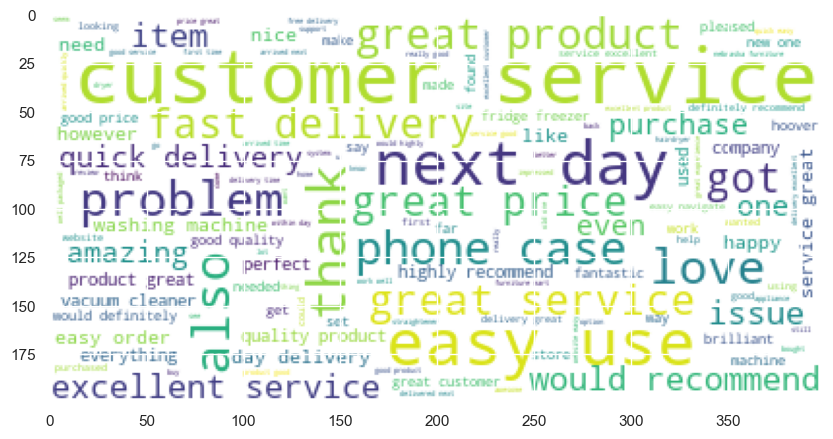

In [60]:
#Creating world cloud representaion of positive dataframe
text_pos = ""
for comment in df_pos.Comment:
    text_pos +=comment
plt.figure(figsize= (10,9))
wc.generate(text_pos)
plt.imshow(wc)
plt.show()

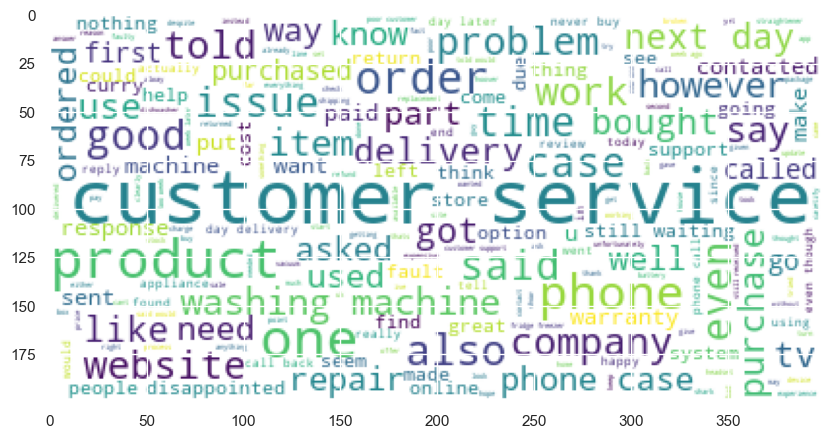

In [61]:
#Creating world cloud representaion of negative dataframe
text_neg = ""
for comment in df_neg.Comment:
    text_neg +=comment

plt.figure(figsize= (10,9))
wc.generate(text_neg)
plt.imshow(wc)
plt.show()

## Monogram analysis

Plot most frequent word in reviews based on sentiments.

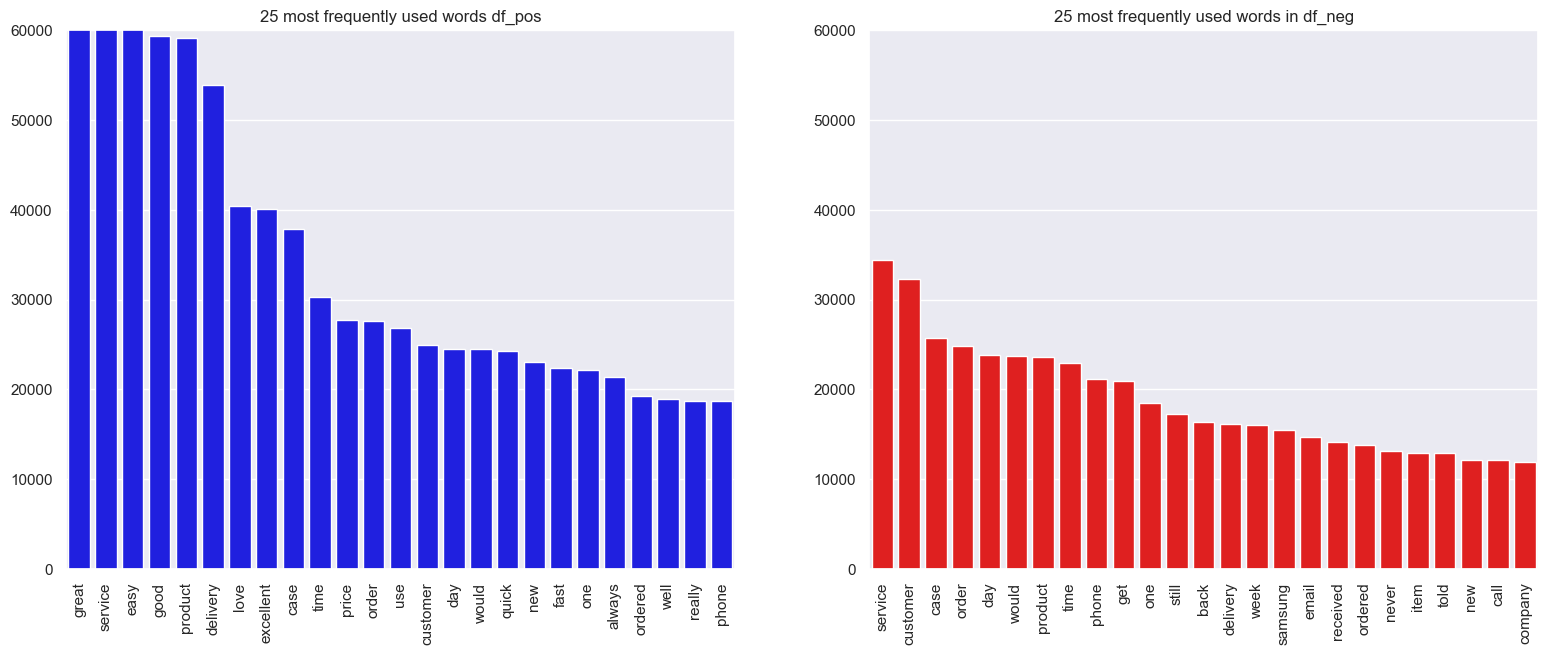

In [62]:
# Import
from nltk.tokenize import word_tokenize
from collections import Counter

#Most frequently used word count from the comments of positive dataframe
string1 = ' '.join(i.lower() for i in df_pos['Comment'])
tokens1 = word_tokenize(string1)
filtered_tokens1 = [word for word in tokens1 if word not in stop_words]
dico_1 = Counter(filtered_tokens1)
mots1 = [m[0] for m in dico_1.most_common(25)]
freq1 = [m[1] for m in dico_1.most_common(25)]

#Most frequently used word count from the comments of negative dataframe
string2 = ' '.join(i.lower() for i in df_neg['Comment'])
tokens2 = word_tokenize(string2)
filtered_tokens2 = [word for word in tokens2 if word not in stop_words]
dico_2 = Counter(filtered_tokens2)
mots2 = [m[0] for m in dico_2.most_common(25)]
freq2 = [m[1] for m in dico_2.most_common(25)]


plt.figure(figsize=(19, 7))

# plot positive words
plt.subplot (121)
plt.axis([0, 26, 0, 60000])
ax = sns.barplot(x=mots1, y=freq1, color='blue')
plt.title('25 most frequently used words df_pos')
ax.set_xticks(range(len(mots1)))  # Set the ticks based on the number of words
ax.set_xticklabels(mots1, rotation=90)


# plot negative words
plt.subplot (122)
plt.axis([0, 26, 0, 60000])
ax = sns.barplot(x=mots2, y=freq2, color='red')
plt.title('25 most frequently used words in df_neg')
ax.set_xticks(range(len(mots2)))  # Set the ticks based on the number of words
ax.set_xticklabels(mots2, rotation=90)

plt.show();

## Bigram analysis

Plot most frequent two words in reviews based on sentiments.

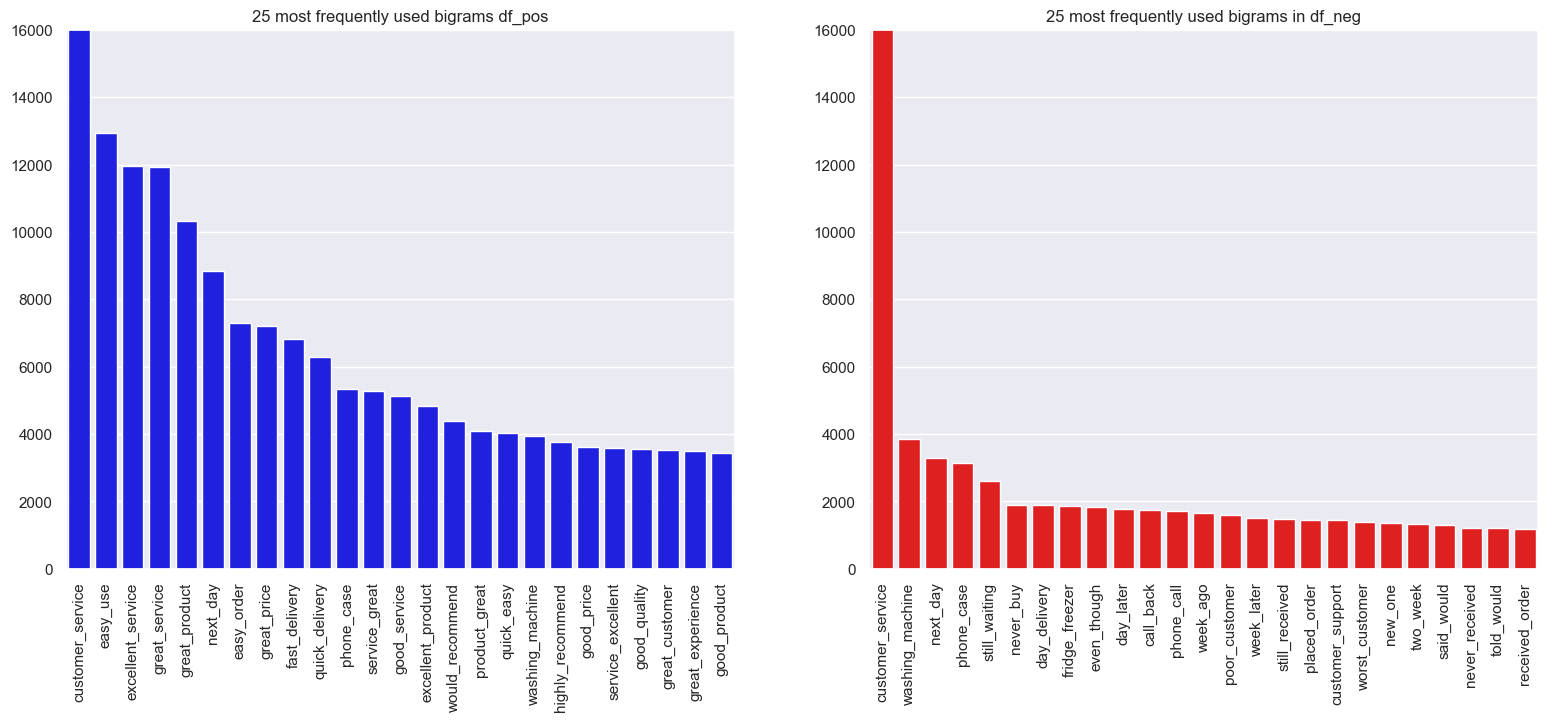

In [63]:
#Most frequently used bigrams from the comments of positive dataframe
string3 = ' '.join(i.lower() for i in df_pos['Comment'])
tokens3 = word_tokenize(string3)
filtered_tokens3 = [word for word in tokens3 if word not in stop_words]

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

bigram1 = find_ngrams(filtered_tokens3, 2)
bigrams1 = Counter(bigram1).most_common(25)
mots3 = [m[0] for m in bigrams1]
mots3=  [m[0]+'_'+m[1] for m in mots3]
freq3 = [m[1] for m in bigrams1]


# Most frequently used bigrams from the comments of negative dataframe
string4 = ' '.join(i.lower() for i in df_neg['Comment'])
tokens4 = word_tokenize(string4)
filtered_tokens4 = [word for word in tokens4 if word not in stop_words]

bigram2 = find_ngrams(filtered_tokens4, 2)
bigrams2 = Counter(bigram2).most_common(25)
mots4 = [m[0] for m in bigrams2]
mots4=  [m[0]+'_'+m[1] for m in mots4]
freq4 = [m[1] for m in bigrams2]

plt.figure(figsize=(19, 7))


# plot positive words
plt.subplot (121)
plt.axis([0, 26, 0, 16000])
ax = sns.barplot(x=mots3, y=freq3, color='blue')
plt.title('25 most frequently used bigrams df_pos')
ax.set_xticks(range(len(mots1)))
ax.set_xticklabels(mots3, rotation=90)

# plot negative words
plt.subplot (122)
plt.axis([0, 26, 0, 16000])
ax = sns.barplot(x=mots4, y=freq4, color='red')
plt.title('25 most frequently used bigrams in df_neg')
ax.set_xticks(range(len(mots2)))
ax.set_xticklabels(mots4, rotation=90)

plt.show();

## Trigram analysis

Plot most frequent three words in reviews based on sentiments.

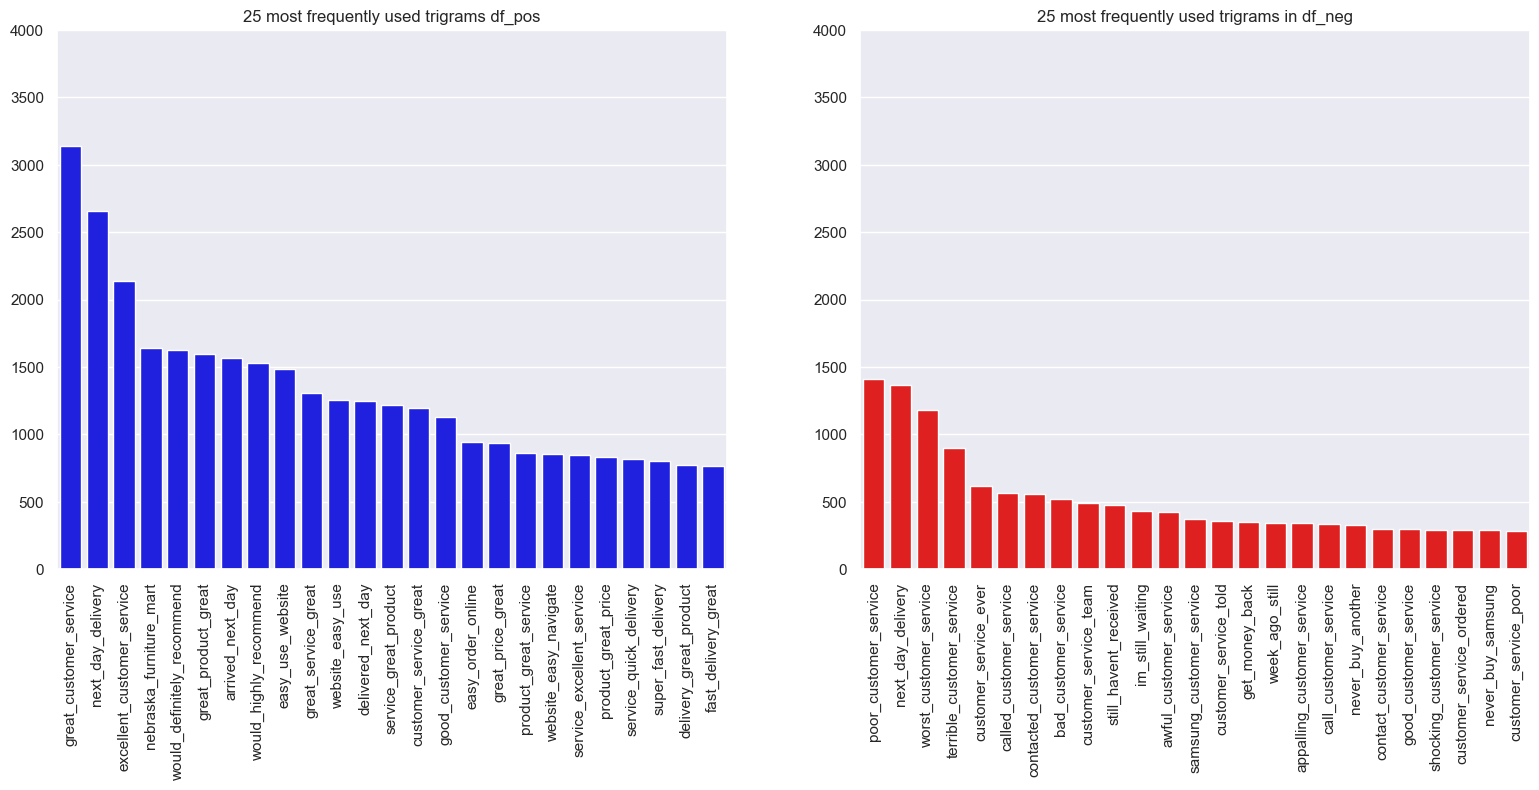

In [64]:
# Most frequently used bigrams from the comments of positive dataframe
string5 = ' '.join(i.lower() for i in df_pos['Comment'])
tokens5 = word_tokenize(string5)
filtered_tokens5 = [word for word in tokens5 if word not in stop_words]

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

trigram1 = find_ngrams(filtered_tokens5, 3)
trigrams1 = Counter(trigram1).most_common(25)
mots5 = [m[0] for m in trigrams1]
mots5=  [m[0]+'_'+m[1]+'_'+ m[2]for m in mots5]
freq5 = [m[1] for m in trigrams1]


# Most frequently used bigrams from the comments of negative dataframe
string6 = ' '.join(i.lower() for i in df_neg['Comment'])
tokens6 = word_tokenize(string6)
filtered_tokens6 = [word for word in tokens6 if word not in stop_words]

trigram2 = find_ngrams(filtered_tokens6, 3)
trigrams2 = Counter(trigram2).most_common(25)
mots6 = [m[0] for m in trigrams2]
mots6=  [m[0]+'_'+m[1]+'_'+ m[2] for m in mots6]
freq6 = [m[1] for m in trigrams2]

plt.figure(figsize=(19, 7))


# plot positive words
plt.subplot (121)
plt.axis([0, 26, 0, 4000])
ax = sns.barplot(x=mots5, y=freq5, color='blue')
plt.title('25 most frequently used trigrams df_pos')
ax.set_xticks(range(len(mots1)))
ax.set_xticklabels(mots5, rotation=90)

# plot negative words
plt.subplot (122)
plt.axis([0, 26, 0, 4000])
ax = sns.barplot(x=mots6, y=freq6, color='red')
plt.title('25 most frequently used trigrams in df_neg')
ax.set_xticks(range(len(mots2)))
ax.set_xticklabels(mots6, rotation=90)

plt.show();

## Encoding target variable'Sentiment'

 In many machine learning algorithms, it is necessary for the data to be numerical. The LabelEncoder is used to transform the categorical data in 'Sentiment' into numerical form.

In [65]:
# Import
from sklearn.preprocessing import LabelEncoder

# "neg" and "pos" are coded as 0 and 1
encoder = LabelEncoder()
encoder.fit(df['Sentiment'])
df['Sentiment'] = encoder.transform(df['Sentiment'])

df.Sentiment.unique()

array([0, 1])

In [66]:
df.head()

Sentiment  Num_of_reviews  \
0          0               1   
1          1               1   
2          1               2   
3          1               2   
4          1               1   

                                             Comment  Response  com_day  \
0  item showed defective one earbud working phone...         0        2   
1  great used tech site ordered time every time i...         0        9   
2  order quickly filled yet opened earbuds they i...         0        6   
3  recently ordered wireless earbuds shipping fai...         0        2   
4  good price great product shipping fast bigger ...         0        9   

   com_month  com_year  res_day  res_month  res_year  Num_of_words  \
0          6      2023        0          0         0            42   
1          6      2023        0          0         0            18   
2          6      2023        0          0         0            33   
3          6      2023        0          0         0            34   
4          6      2023        0          0         0            18   

   Capital_count  Smile_count  Sad_count  Exclamation_count  Question_count  \
0              4            0          0                  0               0   
1              2            0          0                  0               0   
2              3            0          0                  1               0   
3              7            0          0                  0               0   
4              2            0          0                  0               0   

   Integer_count  
0              0  
1              2  
2              0  
3              1  
4              0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353228 entries, 0 to 353344
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Sentiment          353228 non-null  int32 
 1   Num_of_reviews     353228 non-null  int32 
 2   Comment            353228 non-null  object
 3   Response           353228 non-null  int64 
 4   com_day            353228 non-null  int64 
 5   com_month          353228 non-null  int64 
 6   com_year           353228 non-null  int64 
 7   res_day            353228 non-null  int64 
 8   res_month          353228 non-null  int64 
 9   res_year           353228 non-null  int64 
 10  Num_of_words       353228 non-null  int64 
 11  Capital_count      353228 non-null  int64 
 12  Smile_count        353228 non-null  int64 
 13  Sad_count          353228 non-null  int64 
 14  Exclamation_count  353228 non-null  int64 
 15  Question_count     353228 non-null  int64 
 16  Integer_count      353228

## Count a heatmap

The code creates a heatmap to visualise the correlation matrix between numeric variables in a DataFrame.

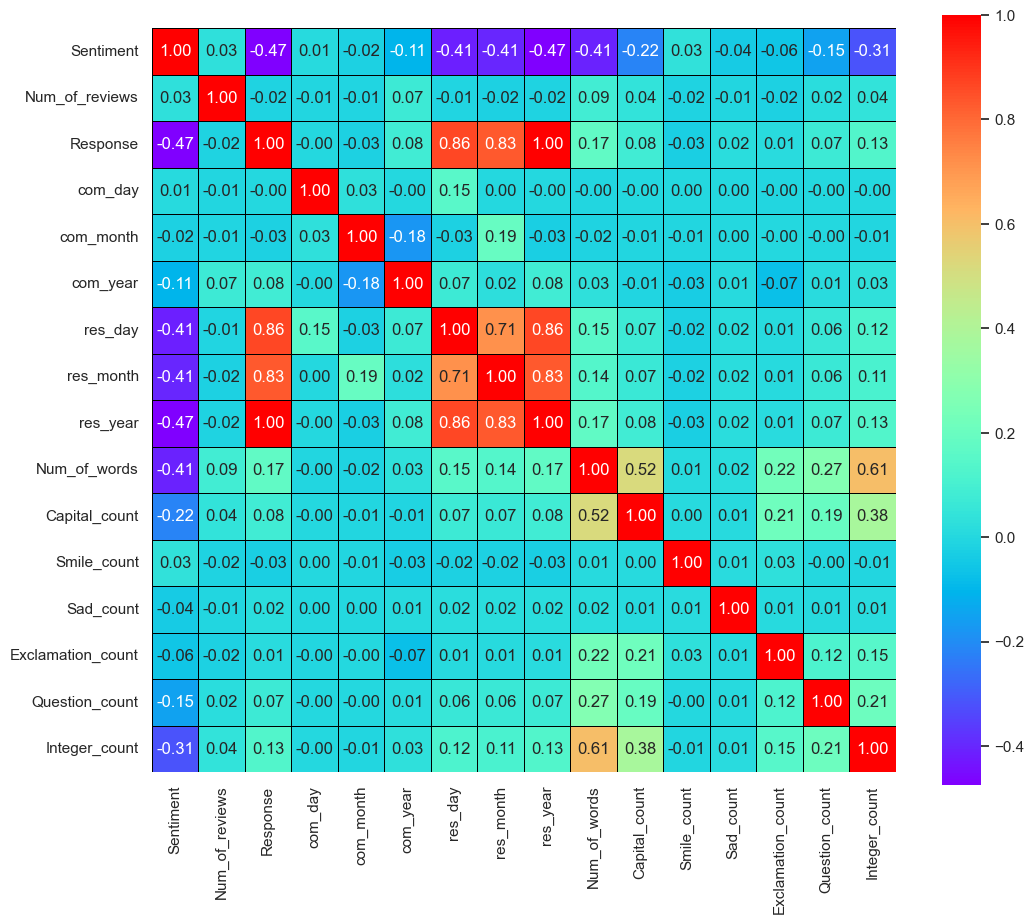

In [68]:
cor =df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='rainbow', linewidths=0.5, linecolor='black', square=True, ax=ax)
plt.show()

- Strong positive correlation observed between 'Response' and 'res_day', 'res_month', and 'res_year'
- 'res_day', 'res_month', and 'res_year' also show strong positive correlation with each other
- 'Response', 'res_day', 'res_month', and 'res_year' exhibit significant negative correlation with 'Sentiment'
- Negative correlation observed between 'Num_of_words' and 'Interger_count' with the target variable 'Sentiment'

________________________________________________________________________________________________________________________________________

In order not to have to carry out all the preparations again and again, the modified data set is now saved and can be reloaded at any time.

In [69]:
# Store df
dump(df, 'D:/DataScientest/joblib/df.pkl')

['D:/DataScientest/joblib/df.pkl']

In [70]:
# Load df
df = load('D:/DataScientest/joblib/df.pkl')

In [71]:
df.head()

Sentiment  Num_of_reviews  \
0          0               1   
1          1               1   
2          1               2   
3          1               2   
4          1               1   

                                             Comment  Response  com_day  \
0  item showed defective one earbud working phone...         0        2   
1  great used tech site ordered time every time i...         0        9   
2  order quickly filled yet opened earbuds they i...         0        6   
3  recently ordered wireless earbuds shipping fai...         0        2   
4  good price great product shipping fast bigger ...         0        9   

   com_month  com_year  res_day  res_month  res_year  Num_of_words  \
0          6      2023        0          0         0            42   
1          6      2023        0          0         0            18   
2          6      2023        0          0         0            33   
3          6      2023        0          0         0            34   
4          6      2023        0          0         0            18   

   Capital_count  Smile_count  Sad_count  Exclamation_count  Question_count  \
0              4            0          0                  0               0   
1              2            0          0                  0               0   
2              3            0          0                  1               0   
3              7            0          0                  0               0   
4              2            0          0                  0               0   

   Integer_count  
0              0  
1              2  
2              0  
3              1  
4              0

Once the data has been sufficiently prepared, it can now be used for ML.

("Comment" is coded separately for the different ML models.)






# Machine Learning model: Metadata 

## Data preprocessing

In [72]:
# Load df
df_meta = load('D:/DataScientest/joblib/df.pkl')

#### Drop the 'Comment' column

This column isn't relevant for model training with metadata. The comments are trained in a separate model.

In [73]:
df_meta=df_meta.drop('Comment', axis=1)
df_meta.head()

Sentiment  Num_of_reviews  Response  com_day  com_month  com_year  res_day  \
0          0               1         0        2          6      2023        0   
1          1               1         0        9          6      2023        0   
2          1               2         0        6          6      2023        0   
3          1               2         0        2          6      2023        0   
4          1               1         0        9          6      2023        0   

   res_month  res_year  Num_of_words  Capital_count  Smile_count  Sad_count  \
0          0         0            42              4            0          0   
1          0         0            18              2            0          0   
2          0         0            33              3            0          0   
3          0         0            34              7            0          0   
4          0         0            18              2            0          0   

   Exclamation_count  Question_count  Integer_count  
0                  0               0              0  
1                  0               0              2  
2                  1               0              0  
3                  0               0              1  
4                  0               0              0

#### Divide the data into training and test sets

In [74]:
# Separate the data into features and target
data =df_meta.drop('Sentiment', axis=1)
target= df_meta['Sentiment']

# Split the data into train and test sets
X_train_meta, X_test_meta, y_train_meta, y_test_meta =train_test_split(data, target, test_size =0.2, random_state=1, stratify=target)

### Standardisation of the features

Standardisation ensures that all characteristics are within a comparable range.

In [76]:
# Import
from sklearn.preprocessing import StandardScaler


# Scale the features
sc = StandardScaler()
X_train_meta = sc.fit_transform(X_train_meta)
X_test_meta= sc.transform(X_test_meta)

## Handling Imbalance target feature with SMOTE

Class imbalance can lead to poor performance of machine learning models. SMOTE generates synthetic examples of the rare class.

In [77]:
# Import
from imblearn.over_sampling import SMOTE

# SMOTE
SMO = SMOTE()
X_sm_meta, y_sm_meta = SMO.fit_resample(X_train_meta, y_train_meta)
print('SMOTE :', dict(pd.Series(y_sm_meta).value_counts()),'\n')

SMOTE : {1: 221410, 0: 221410} 




### Comparison of a logistic regression model with and without SMOTE


Train LR model with SMOTE

In [78]:
# Create a classification model
lr_sm = LogisticRegression(C=100, random_state=1)

# Train the model on the training set
lr_sm.fit(X_sm_meta, y_sm_meta)

print('SM score train:', lr_sm.score(X_sm_meta, y_sm_meta),'\n')
print('SM score test:', lr_sm.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_lr_sm = lr_sm.predict(X_test_meta)

# Display the corresponding confusion matrix
print('SM confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_lr_sm, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('SM Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_lr_sm),'\n\n')

SM score train: 0.804227451334628 

SM score test: 0.829671885173966 


SM confusion matrix:
 Predictions      0      1
Sentiment                
0            11727   3566
1             8467  46886 


SM Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.58      0.77      0.85      0.66      0.81      0.64     15293
          1       0.93      0.85      0.77      0.89      0.81      0.65     55353

avg / total       0.85      0.83      0.78      0.84      0.81      0.65     70646
 




Train LR model without SMOTE

In [79]:
# Create a classification model
lr = LogisticRegression(C=100, random_state=1)

# Train the model on the training set
lr.fit(X_train_meta, y_train_meta)


print('LR score train:', lr.score(X_train_meta, y_train_meta),'\n')
print('LR score test:', lr.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions on the test data
y_pred_lr = lr.predict(X_test_meta)

# Display the corresponding confusion matrix
print('LR confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_lr, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('LR Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_lr),'\n\n')

LR score train: 0.8678436701559193 

LR score test: 0.869405203408544 


LR confusion matrix:
 Predictions     0      1
Sentiment               
0            8386   6907
1            2319  53034 


LR Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.55      0.96      0.65      0.72      0.50     15293
          1       0.88      0.96      0.55      0.92      0.72      0.55     55353

avg / total       0.86      0.87      0.64      0.86      0.72      0.54     70646
 




- Logistic regression model without SMOTE: accuracy of 86.77% on the test data set.
- Recall for positive class (sentiment 1) at 96%, good identification of positive ratings.
- Recall for negative class (sentiment 0) at 54%, acceptable in less critical cases.
- Precision for positive class: 88%, accurate prediction of positive ratings.
- Precision for negative class: 78% of cases predicted as negative are actually negative.
- Improvement of recall for negative class by SMOTE may not be critical as precision is already acceptable.
- Adding synthetic examples through SMOTE may reduce model interpretability, make training process more complex.
- Model without SMOTE seems to perform sufficiently for this use case

-> Application of SMOTE is not necessary



___________________________________________________________________________________________________________________________

## Modelselection

The next step is to train different models and compare their performance. 


Models used:
- Logistic regression
- Random Forest
- Gradient Boosting
- Extreme Gradient Boosting


### Logistic Regression

In [80]:
# Create a classification model
lr = LogisticRegression(C=100, random_state=1)

# Train the model on the training set
lr.fit(X_train_meta, y_train_meta)

LogisticRegression(C=100, random_state=1)

In [81]:
# store lr
dump(lr, 'D:/DataScientest/joblib/lr.pkl')

['D:/DataScientest/joblib/lr.pkl']

In [82]:
# load lr
lr=load('D:/DataScientest/joblib/lr.pkl')

In [83]:
# Accuracy
print('LR score train:', lr.score(X_train_meta, y_train_meta),'\n')
print('LR score test:', lr.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_lr = lr.predict(X_test_meta)

# Display the corresponding confusion matrix
print('LR confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_lr, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('LR Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_lr),'\n\n')

LR score train: 0.8678436701559193 

LR score test: 0.869405203408544 


LR confusion matrix:
 Predictions     0      1
Sentiment               
0            8386   6907
1            2319  53034 


LR Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.55      0.96      0.65      0.72      0.50     15293
          1       0.88      0.96      0.55      0.92      0.72      0.55     55353

avg / total       0.86      0.87      0.64      0.86      0.72      0.54     70646
 




### RandomForest

In [84]:
# Create a classification model
rf=RandomForestClassifier()

# Train the model on the training set
rf.fit(X_train_meta, y_train_meta)

RandomForestClassifier()

In [85]:
# store rf
dump(rf, 'D:/DataScientest/joblib/rf.pkl')

['D:/DataScientest/joblib/rf.pkl']

In [86]:
# load rf
rf=load('D:/DataScientest/joblib/rf.pkl')

In [87]:
# Accuracy
print('RF score train:', rf.score(X_train_meta, y_train_meta),'\n')
print('RF score test:', rf.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_rf = rf.predict(X_test_meta)

# Display the corresponding confusion matrix
print('RF confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_rf, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('RF Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_rf),'\n\n')

RF score train: 0.9959905443375728 

RF score test: 0.8837726127452368 


RF confusion matrix:
 Predictions     0      1
Sentiment               
0            9851   5442
1            2769  52584 


RF Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.64      0.95      0.71      0.78      0.59     15293
          1       0.91      0.95      0.64      0.93      0.78      0.63     55353

avg / total       0.88      0.88      0.71      0.88      0.78      0.62     70646
 




### Gradient Boosting

In [88]:
# Create a classification model
gb=GradientBoostingClassifier()

# Train the model on the training set
gb.fit(X_train_meta, y_train_meta)

GradientBoostingClassifier()

In [89]:
# store gb
dump(gb, 'D:/DataScientest/joblib/gb.pkl')

['D:/DataScientest/joblib/gb.pkl']

In [90]:
#load gb
gb=load('D:/DataScientest/joblib/gb.pkl')

In [91]:
# Accuracy
print('GB score train:', gb.score(X_train_meta, y_train_meta),'\n')
print('GB score test:', gb.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_gb = gb.predict(X_test_meta)

# Display the corresponding confusion matrix
print('GB confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_gb, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('GB Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_gb),'\n\n')


GB score train: 0.8785449887112413 

GB score test: 0.8785776972510828 


GB confusion matrix:
 Predictions     0      1
Sentiment               
0            9075   6218
1            2360  52993 


GB Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.59      0.96      0.68      0.75      0.55     15293
          1       0.89      0.96      0.59      0.93      0.75      0.59     55353

avg / total       0.87      0.88      0.67      0.87      0.75      0.58     70646
 




### XGBoost

In [92]:
# Create a classification model
xgb = XGBClassifier()

# Train the model on the training set
xgb.fit(X_train_meta, y_train_meta)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
# store xgb
dump(xgb, 'D:/DataScientest/joblib/xgb.pkl')

['D:/DataScientest/joblib/xgb.pkl']

In [94]:
xgb=load('D:/DataScientest/joblib/xgb.pkl')

In [95]:
# Accuracy
print('XGB score train:', xgb.score(X_train_meta, y_train_meta),'\n')
print('XGB score test:', xgb.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_xgb = xgb.predict(X_test_meta)

# Display the corresponding confusion matrix
print('XGB confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_xgb, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('XGB Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_xgb),'\n\n')

XGB score train: 0.8955418250277796 

XGB score test: 0.8909350847889477 


XGB confusion matrix:
 Predictions     0      1
Sentiment               
0            9782   5511
1            2194  53159 


XGB Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.64      0.96      0.72      0.78      0.59     15293
          1       0.91      0.96      0.64      0.93      0.78      0.63     55353

avg / total       0.89      0.89      0.71      0.89      0.78      0.63     70646
 




##### Comparison of the models:

- All models perform well, with test accuracies ranging from 86.77% to 89.06%
- Random Forest achieved the highest training accuracy but slightly lower test accuracy compared to XGBoost
- The accuracy scores of the training and test data of the Random Forest model indicate overfitting
- XGBoost showed a good balance between training and test accuracy and has the highest precision, recall and F1-Score for both classes


### ROC-curve and AUC

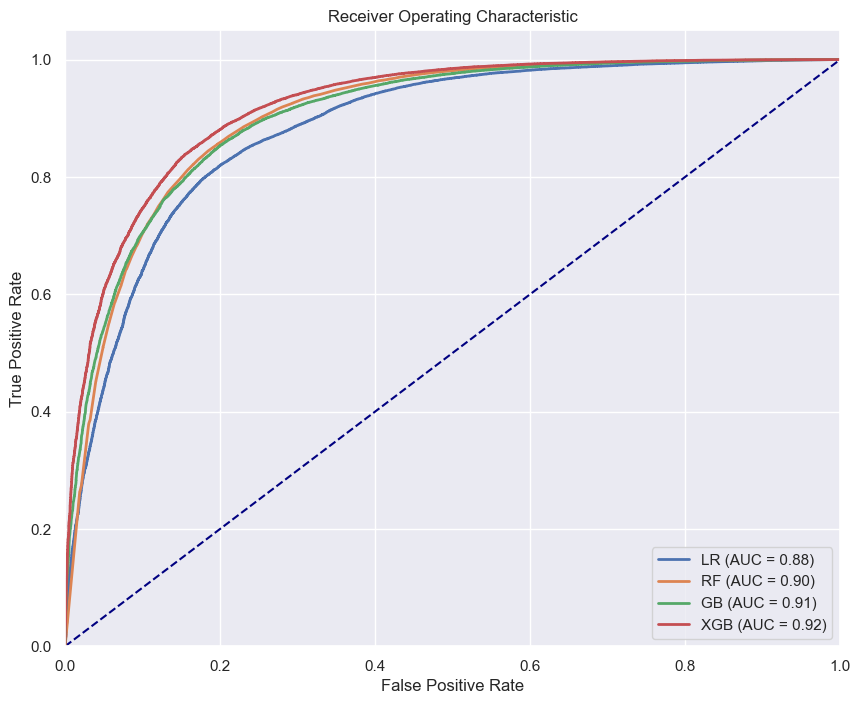

In [96]:
# Prepare data for ROC-curve and AUC
lr_y_score= lr.predict_proba(X_test_meta)
rf_y_score = rf.predict_proba(X_test_meta)
gb_y_score = gb.predict_proba(X_test_meta)
xgb_y_score = xgb.predict_proba(X_test_meta)

models = [ 'LR','RF', 'GB', 'XGB']
model_scores = [lr_y_score, rf_y_score, gb_y_score, xgb_y_score]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_meta, model_scores[i][:, 1])  # fpr: False Positive Rate, tpr: True Positive Rate
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

To summarise, the ROC curves and AUC values indicate that XGBoost is the most promising model for sentiment analysis.

-> Next, the hyperparameters of the XGB model will be optimised.

___________________________________________________________________________________________________________________________________

## Gridsearch on the XGB model

In [97]:
# Import 
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]}

grid_xgb=GridSearchCV(xgb, xgb_param_grid)
grid_xgb.fit(X_train_meta,y_train_meta)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [98]:
# store grid_xgb
dump(grid_xgb, 'D:/DataScientest/joblib/grid_xgb.pkl')

['D:/DataScientest/joblib/grid_xgb.pkl']

In [99]:
# load grid_xgb
grid_xgb=load('D:/DataScientest/joblib/grid_xgb.pkl')

In [100]:
# Evaluation
print('Best parameters:',grid_xgb.best_params_,'\n')
print('XGB_grid score train:',grid_xgb.score(X_train_meta, y_train_meta),'\n')
print('XGB_grid score test:',grid_xgb.score(X_test_meta, y_test_meta),'\n')

y_pred_grid_xgb = grid_xgb.predict(X_test_meta)
print('XGB_grid Classification report: \n',classification_report_imbalanced(y_test_meta, y_pred_grid_xgb))

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8} 

XGB_grid score train: 0.9167073628185801 

XGB_grid score test: 0.8926053845936076 

XGB_grid Classification report: 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.65      0.96      0.72      0.79      0.60     15293
          1       0.91      0.96      0.65      0.93      0.79      0.64     55353

avg / total       0.89      0.89      0.72      0.89      0.79      0.63     70646



## XGB_best


The optimal hyperparameters are currently employed to train an XGBoost model, which is subsequently utilized for additional modeling later in the notebook.

In [204]:
# Create a classification model
xgb_best = XGBClassifier(colsample_bytree= 0.8,
                         gamma= 0.1,
                         learning_rate = 0.1,
                         max_depth = 10,
                         n_estimators = 200,
                         subsample = 0.8)

# Train the model on the training set
xgb_best.fit(X_train_meta, y_train_meta)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [205]:
# store xgb_best
dump(xgb_best, 'D:/DataScientest/joblib/xgb_best.pkl')

['D:/DataScientest/joblib/xgb_best.pkl']

In [206]:
# load xgb_best
xgb_best=load('D:/DataScientest/joblib/xgb_best.pkl')

In [207]:
# Accuracy
print('XGB_best score train:', xgb_best.score(X_train_meta, y_train_meta),'\n')
print('XGB_best score test:', xgb_best.score(X_test_meta, y_test_meta),'\n\n')

# Perform the predictions of our model on the test data
y_pred_xgb_best = xgb_best.predict(X_test_meta)

# Display the corresponding confusion matrix
print('XGB_best confusion matrix:\n',pd.crosstab(y_test_meta, y_pred_xgb_best, colnames=['Predictions']),'\n\n')

# Display the model evaluation report on the test sample
print('XGB_best Classification report:\n',classification_report_imbalanced(y_test_meta, y_pred_xgb_best),'\n\n')

XGB_best score train: 0.9167073628185801 

XGB_best score test: 0.8926053845936076 


XGB_best confusion matrix:
 Predictions     0      1
Sentiment               
0            9920   5373
1            2214  53139 


XGB_best Classification report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.65      0.96      0.72      0.79      0.60     15293
          1       0.91      0.96      0.65      0.93      0.79      0.64     55353

avg / total       0.89      0.89      0.72      0.89      0.79      0.63     70646
 




### Comparison between the XGB model before and after optimisation:

- The model with the best hyperparameters (xgb_best) shows a slightly improved training accuracy compared to the standard XGBoost model (xgb).
- On the test data set, the accuracy of the model with the best hyperparameters is also slightly higher.
- Precision and F1-Score stayed the same.
- The recall for class 0 has increased from 0.64 to 0.65.

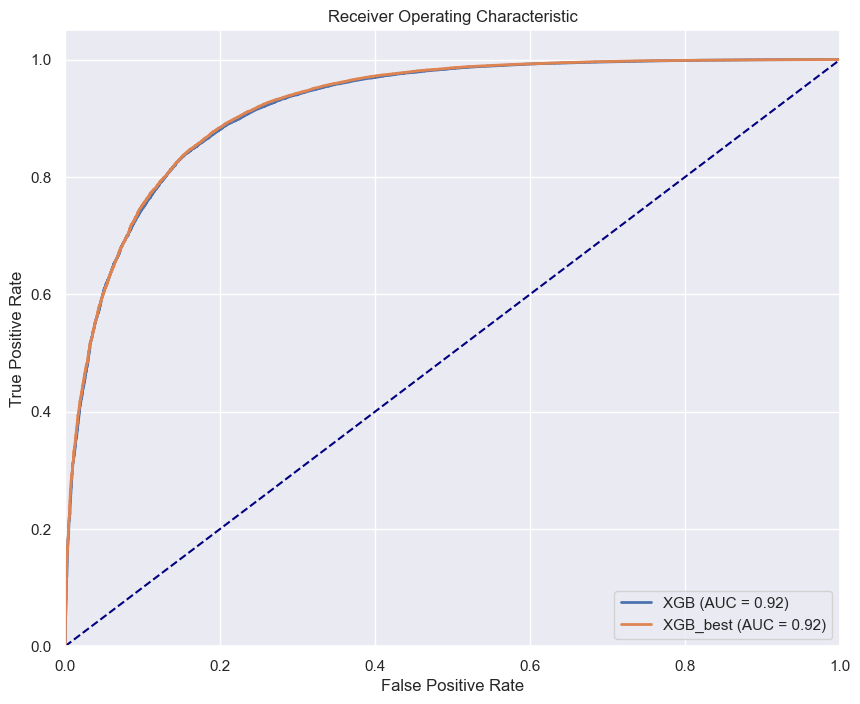

In [208]:
# Prepare data for ROC-curve and AUC
xgb_y_score = xgb.predict_proba(X_test_meta)
xgb_best_y_score = xgb_best.predict_proba(X_test_meta)

models = ['XGB', 'XGB_best']
model_scores = [xgb_y_score, xgb_best_y_score]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_meta, model_scores[i][:, 1])  # fpr: False Positive Rate, tpr: True Positive Rate
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

 - The AUC remains the same in both cases.

Overall, the model with the best hyperparameters shows a slight improvement  compared to the standard XGBoost model.

______________________________________________________________________________________________________________________________________

# Machine learning model: Text data


In this segment, we implement both CountVectorizer and TfidfVectorizer on the textual data, followed by a comparative analysis of various models.

In [39]:
# Load df
df = load('D:/DataScientest/joblib/df.pkl')
df_txt=df.copy()

## Countvectorizer with 1 grams


This process is common in natural language processing (NLP) tasks to convert text data into a format that can be used as input for machine learning models.

### Data preprocessing

Here, only the column "Comment" is used as input. The metadata is not needed.


In [107]:
# Split the data
X_train_bag_1, X_test_bag_1, y_train_bag_1, y_test_bag_1 = train_test_split(df_txt['Comment'], df_txt['Sentiment'], test_size = 0.2, random_state = 1234)

In [108]:
# Import
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data into bag-of-words
vectorizer = CountVectorizer()
X_train_bag_1 = vectorizer.fit_transform(X_train_bag_1)
X_test_bag_1 = vectorizer.transform(X_test_bag_1)


### Model selection

Models:
- Logistic Regression
- Gradient Boosting
- MultinomialNB
- XGBoost
- Balanced Random Forest

__________________________________________________________________________________________________________________________________________________


Logistic Regression:

In [109]:
# Train a logistic regression model on the bag-of-words representations of the text data 
lr_txt = LogisticRegression(max_iter=4000)
lr_txt.fit(X_train_bag_1, y_train_bag_1)


LogisticRegression(max_iter=4000)

In [110]:
# store lr_txt
dump(lr_txt, 'D:/DataScientest/joblib/lr_txt.pkl')

['D:/DataScientest/joblib/lr_txt.pkl']

In [111]:
# load lr_txt
lr_txt= load ('D:/DataScientest/joblib/lr_txt.pkl')

In [112]:
# Prediction from the test data set
y_pred_lr_txt= lr_txt.predict(X_test_bag_1)

# Accuracy from the training and test data set
print('LR_txt train score:',lr_txt.score(X_train_bag_1, y_train_bag_1))
print('LR_txt test score:',lr_txt.score(X_test_bag_1,y_test_bag_1))

# Classification report
print(classification_report_imbalanced(y_pred_lr_txt, y_test_bag_1))

LR_txt train score: 0.9499225003715736
LR_txt test score: 0.9328058205701667
                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.89      0.94      0.84      0.91      0.83     13866
          1       0.97      0.94      0.89      0.96      0.91      0.84     56780

avg / total       0.94      0.93      0.90      0.93      0.91      0.84     70646



Grandient Boosting:

In [113]:
# Train a grandient boosting model on the bag-of-words representations of the text data
gb_txt = GradientBoostingClassifier()
gb_txt.fit(X_train_bag_1, y_train_bag_1)

GradientBoostingClassifier()

In [114]:
# store gb_txt
dump(gb_txt, 'D:/DataScientest/joblib/gb_txt.pkl')

['D:/DataScientest/joblib/gb_txt.pkl']

In [115]:
# load gb_txt
gb_txt= load ('D:/DataScientest/joblib/gb_txt.pkl')

In [116]:
# Prediction from the test data set
y_pred_gb_txt= gb_txt.predict(X_test_bag_1)

# Accuracy from the train and test data set
print('GB_txt train score:',gb_txt.score(X_train_bag_1, y_train_bag_1))
print('GB_txt test score:',gb_txt.score(X_test_bag_1, y_test_bag_1))

# Classification report
print(classification_report_imbalanced(y_pred_gb_txt, y_test_bag_1))

GB_txt train score: 0.8856438131232705
GB_txt test score: 0.8846219177306571
                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.91      0.88      0.67      0.89      0.80      8942
          1       0.99      0.88      0.91      0.93      0.89      0.80     61704

avg / total       0.93      0.88      0.90      0.90      0.89      0.80     70646



MultinomialNB:

In [117]:
# Train a MultinomialNB model on the bag-of-words representations of the text data
mnb = MultinomialNB()
mnb.fit(X_train_bag_1, y_train_bag_1)

MultinomialNB()

In [118]:
# store mnb
dump(mnb, 'D:/DataScientest/joblib/mnb.pkl')

['D:/DataScientest/joblib/mnb.pkl']

In [119]:
# load mnb
mnb= load ('D:/DataScientest/joblib/mnb.pkl')

In [120]:
# Prediction from the test data set
y_pred_mnb= mnb.predict(X_test_bag_1)

# Accuracy from the train and test data set
print('MNB train score:',mnb.score(X_train_bag_1, y_train_bag_1))
print('MNB test score:',mnb.score(X_test_bag_1, y_test_bag_1))

# Classification report
print(classification_report_imbalanced(y_pred_mnb, y_test_bag_1))

MNB train score: 0.9250483045629233
MNB test score: 0.9197972992101464
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.82      0.95      0.82      0.88      0.77     15319
          1       0.95      0.95      0.82      0.95      0.88      0.79     55327

avg / total       0.92      0.92      0.85      0.92      0.88      0.78     70646



XGBoost:

In [121]:
# Train a xgboost model on the bag-of-words representations of the text data
xgb_txt = XGBClassifier()
xgb_txt.fit(X_train_bag_1, y_train_bag_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
# store xgb_txt
dump(xgb_txt, 'D:/DataScientest/joblib/xgb_txt.pkl')

['D:/DataScientest/joblib/xgb_txt.pkl']

In [123]:
# load xgb_txt
xgb_txt= load ('D:/DataScientest/joblib/xgb_txt.pkl')

In [124]:
# Prediction from the test data set
y_pred_xgb_txt= xgb_txt.predict(X_test_bag_1)

# Accuracy from the training and test data set
print('XGB_txt train score:',xgb_txt.score(X_train_bag_1, y_train_bag_1))
print('XGB_txt test score:',xgb_txt.score(X_test_bag_1, y_test_bag_1))

# Classification report
print(classification_report_imbalanced(y_pred_xgb_txt, y_test_bag_1))

XGB_txt train score: 0.9275466944108259
XGB_txt test score: 0.9211137219375478
                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.89      0.93      0.80      0.91      0.82     12636
          1       0.97      0.93      0.89      0.95      0.91      0.83     58010

avg / total       0.93      0.92      0.90      0.92      0.91      0.83     70646



Balanced Random Forest:

In [125]:
# Train a balanced random forrest model on the bag-of-words representations of the text data
brf= BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)
brf.fit(X_train_bag_1, y_train_bag_1)


BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [126]:
# store brf
dump(brf, 'D:/DataScientest/joblib/brf.pkl')

['D:/DataScientest/joblib/brf.pkl']

In [127]:
# load brf
brf= load ('D:/DataScientest/joblib/brf.pkl')

In [128]:
# Prediction from the test data set
y_pred_brf= brf.predict(X_test_bag_1)

# Accuracy from the train and test data set
print('BRF train score:',brf.score(X_train_bag_1, y_train_bag_1))
print('BRF test score:',brf.score(X_test_bag_1, y_test_bag_1))

# Classification report
print(classification_report_imbalanced(y_pred_brf, y_test_bag_1))

BRF train score: 0.9628391051093134
BRF test score: 0.9117996772641055
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.75      0.97      0.82      0.85      0.71     18528
          1       0.92      0.97      0.75      0.94      0.85      0.74     52118

avg / total       0.91      0.91      0.81      0.91      0.85      0.73     70646



### Comparison of the models

- Highest training accuracy: Balanced Random Forest (BRF) - 96.3%
- Highest test accuracy: Logistic Regression (LR_txt) - 93.3%, indicating strong generalization.
- BRF and MNB show highest precision for class 0.
- LR_txt, GB_txt, and XGB_txt have highest recall, while LR_txt achieves highest F1 score for class 0.
- GB_txt has highest precision for class 1.
- BRF achieves highest recall, and LR_txt achieves highest F1 score for class 1.


Balanced Random Forest (BRF) and Logistic Regression (LR_txt) are preferred. Both models exhibit a good balance between precision, recall, and F1 score for both negative and positive reviews.

### ROC-curve and AUC

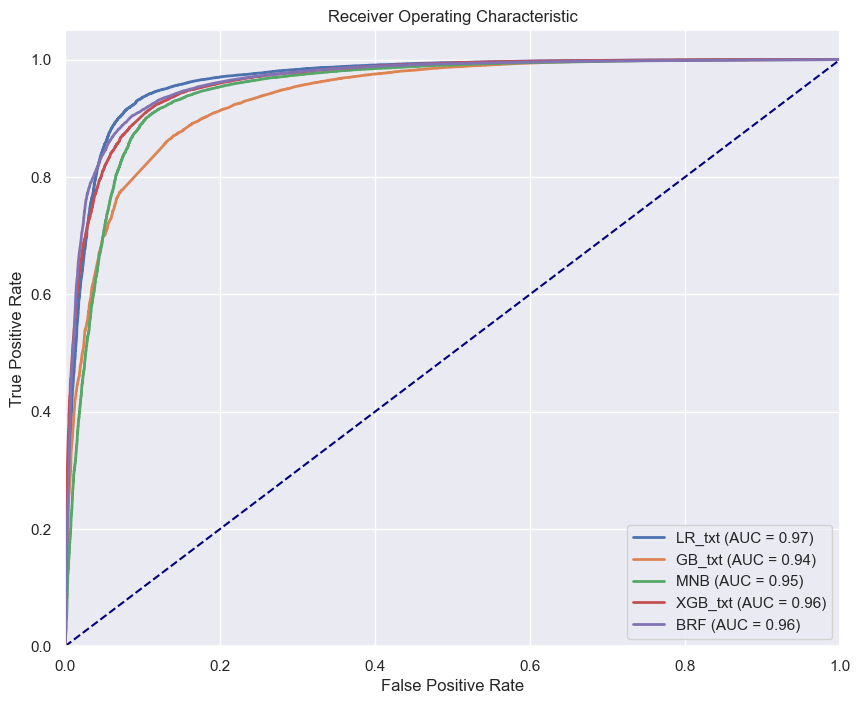

In [129]:
# Prepare data for ROC-curve and AUC
y_lr_txt= lr_txt.predict_proba(X_test_bag_1)
y_gb_txt = gb_txt.predict_proba(X_test_bag_1)
y_mnb = mnb.predict_proba(X_test_bag_1)
y_xgb_txt = xgb_txt.predict_proba(X_test_bag_1)
y_brf = brf.predict_proba(X_test_bag_1)

models = ['LR_txt','GB_txt','MNB','XGB_txt','BRF']
model_scores = [y_lr_txt, y_gb_txt,y_mnb, y_xgb_txt, y_brf]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_bag_1, model_scores[i][:, 1]) 
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- Logistic Regression has the highest AUC value.

Considering all metrics and focusing on balanced performance for both classes (positive and negative scores), Logistic Regression (LR_txt) seems to be the best choice. It achieves the highest test accuracy, a high AUC value, and its precision, recall and F1 score for negative evaluations are balanced.
_________________________________________________________________________________________________________________________________________________________

## Countvectorizer with 2 grams

This CountVectorizer converts both unigrams and bigrams, which means that both individual words and pairs of consecutive words (bigrams) are taken into account. 



### Data preprocessing

In [130]:
# Split the data
X_train_bag_2, X_test_bag_2, y_train_bag_2, y_test_bag_2 = train_test_split(df_txt['Comment'], df_txt['Sentiment'], test_size = 0.2, random_state = 1234)

In [131]:
# Converts text data into bag-of-words with 1-grams and 2-grams
vectorizer_2 = CountVectorizer(ngram_range =(1,2))
X_train_bag_2 = vectorizer_2.fit_transform(X_train_bag_2)
X_test_bag_2 = vectorizer_2.transform(X_test_bag_2)


### Model selection

Models:
- Logistic Regression
- Gradient Boosting
- MultinomialNB
- XGBoost
- Balanced Random Forest

__________________________________________________________________________________________________________________________________________________


Logistic Regression

In [132]:
# Train a logistic regression model on the bag-of-words representations of the text data
lr_txt_2 = LogisticRegression(max_iter=4000)
lr_txt_2.fit(X_train_bag_2, y_train_bag_2)

LogisticRegression(max_iter=4000)

In [133]:
# store lr_txt_2
dump(lr_txt_2, 'D:/DataScientest/joblib/lr_txt_2.pkl')

['D:/DataScientest/joblib/lr_txt_2.pkl']

In [134]:
# load lr_txt_2
lr_txt_2= load ('D:/DataScientest/joblib/lr_txt_2.pkl')

In [135]:
# Prediction from the test data set
y_pred_lr_txt_2= lr_txt_2.predict(X_test_bag_2)

# Accuracy from the train and test data set
print('LR_txt_2 train score:', lr_txt_2.score(X_train_bag_2, y_train_bag_2))
print('LR_txt_2 test score:',lr_txt_2.score(X_test_bag_2,y_test_bag_2))

# Classification report
print(classification_report_imbalanced(y_pred_lr_txt_2, y_test_bag_2))

LR_txt_2 train score: 0.9925012916604737
LR_txt_2 test score: 0.9382272173937661
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.89      0.95      0.85      0.92      0.84     14373
          1       0.97      0.95      0.89      0.96      0.92      0.85     56273

avg / total       0.94      0.94      0.90      0.94      0.92      0.85     70646



Gradient Boosting

In [136]:
# Train a gradient boosting model on the bag-of-words representations of the text data
gb_txt_2 = GradientBoostingClassifier()
gb_txt_2.fit(X_train_bag_2, y_train_bag_2)

GradientBoostingClassifier()

In [137]:
# store gb_txt_2
dump(gb_txt_2, 'D:/DataScientest/joblib/gb_txt_2.pkl')

['D:/DataScientest/joblib/gb_txt_2.pkl']

In [138]:
# load gb_txt_2
gb_txt_2= load ('D:/DataScientest/joblib/gb_txt_2.pkl')

In [139]:
# Prediction from the test data set
y_pred_gb_txt_2= gb_txt_2.predict(X_test_bag_2)

# Accuracy from the train and test data set
print('GB_txt_2 train score:',gb_txt_2.score(X_train_bag_2, y_train_bag_2))
print('GB_txt_2 test score:',gb_txt_2.score(X_test_bag_2,y_test_bag_2))

# Classification report
print(classification_report_imbalanced(y_pred_gb_txt_2, y_test_bag_2))

GB_txt_2 train score: 0.8856933562647302
GB_txt_2 test score: 0.8845936075644764
                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.91      0.88      0.67      0.89      0.80      8950
          1       0.98      0.88      0.91      0.93      0.89      0.80     61696

avg / total       0.93      0.88      0.90      0.90      0.89      0.80     70646



MultinomialNB

In [140]:
# Train a MultinomialNB model on the bag-of-words representations of the text data
mnb_2 = MultinomialNB()
mnb_2.fit(X_train_bag_2, y_train_bag_2)

MultinomialNB()

In [141]:
# store mnb_2
dump(mnb_2, 'D:/DataScientest/joblib/mnb_2.pkl')

['D:/DataScientest/joblib/mnb_2.pkl']

In [142]:
# load mnb_2
mnb_2= load ('D:/DataScientest/joblib/mnb_2.pkl')

In [143]:
# Prediction from the test data set
y_pred_mnb_2= mnb_2.predict(X_test_bag_2)

# Accuracy from the train and test data set
print('MNB_2 train score:', mnb_2.score(X_train_bag_2, y_train_bag_2))
print('MNB_2 test score:', mnb_2.score(X_test_bag_2,y_test_bag_2))

# Classification report
print(classification_report_imbalanced(y_pred_mnb_2, y_test_bag_2))

MNB_2 train score: 0.9624604539567276
MNB_2 test score: 0.9300031141182798
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.85      0.95      0.84      0.90      0.80     14898
          1       0.96      0.95      0.85      0.96      0.90      0.82     55748

avg / total       0.93      0.93      0.87      0.93      0.90      0.81     70646



XGBoost

In [144]:
# Train a xgboost model on the bag-of-words representations of the text data
xgb_txt_2 = XGBClassifier()
xgb_txt_2.fit(X_train_bag_2, y_train_bag_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
# store xgb_txt_2
dump(xgb_txt_2, 'D:/DataScientest/joblib/xgb_txt_2.pkl')

['D:/DataScientest/joblib/xgb_txt_2.pkl']

In [146]:
# load xgb_txt_2
xgb_txt_2= load ('D:/DataScientest/joblib/xgb_txt_2.pkl')

In [147]:
# Prediction from the test data set
y_pred_xgb_txt_2= xgb_txt_2.predict(X_test_bag_2)

# Accuracy from the train and test data set
print('XGB_txt_2 train score:',xgb_txt_2.score(X_train_bag_2, y_train_bag_2))
print('XGB_txt_2 test score:',xgb_txt_2.score(X_test_bag_2,y_test_bag_2))

# Classification report
print(classification_report_imbalanced(y_pred_xgb_txt_2, y_test_bag_2))

XGB_txt_2 train score: 0.9274546857195434
XGB_txt_2 test score: 0.920873085525012
                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.89      0.93      0.80      0.91      0.82     12599
          1       0.98      0.93      0.89      0.95      0.91      0.83     58047

avg / total       0.93      0.92      0.90      0.92      0.91      0.83     70646



Balanced Random Forrest

In [148]:
# Train a balanced random forrest model on the bag-of-words representations of the text data
brf_2 = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)
brf_2.fit(X_train_bag_2, y_train_bag_2)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [149]:
# store brf_2
dump(brf_2, 'D:/DataScientest/joblib/brf_2.pkl')

['D:/DataScientest/joblib/brf_2.pkl']

In [150]:
# load brf_2
brf_2= load ('D:/DataScientest/joblib/brf_2.pkl')

In [151]:
# Prediction from the test data set
y_pred_brf_2= brf_2.predict(X_test_bag_2)

# Accuracy from the train and test data set
print('BRF_2 train score:',brf_2.score(X_train_bag_2, y_train_bag_2))
print('BRF_2 test score:',brf_2.score(X_test_bag_2,y_test_bag_2))

# Classification report
print(classification_report_imbalanced(y_pred_brf_2, y_test_bag_2))

BRF_2 train score: 0.9663495905613237
BRF_2 test score: 0.9147297794638054
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.76      0.97      0.82      0.86      0.72     18095
          1       0.92      0.97      0.76      0.94      0.86      0.75     52551

avg / total       0.91      0.91      0.81      0.91      0.86      0.74     70646



### Comparison of the models

- The highest training accuracy is achieved by LR_txt_2
- GB_txt_2 has the lowest training accuracy 
- In terms of test accuracy, LR_txt_2 also achieves the highest accuracy 
- For negative ratings (class 0), Logistic Regression (LR_txt_2) and Naive Bayes (MNB_2) show balanced precision, recall and F1 score. BRF_2 achieves the highest precision, while GB_txt achieves the highest recall and LR_txt_2 achieves the highest F1 score.
- For positive scores (Class 1), Gradient Boosting (GB_txt_2), XGBoost (XGB_txt_2), and Balanced Random Forest (BRF_2) also show strong performance. GB_txt_2 and XGB_txt2 achieve the highest precision, while BRF_2 achieves the highest recall and LR_txt achieves the highest F1 score.
- Logistic Regression (LR_txt_2) shows the best performance overall with high accuracy, precision, recall and F1 score for both classes.
Gradient Boosting (GB_txt_2) and Balanced Random Forest (BRF_2) also show strong performances, especially for positive reviews.



### ROC-curve and AUC

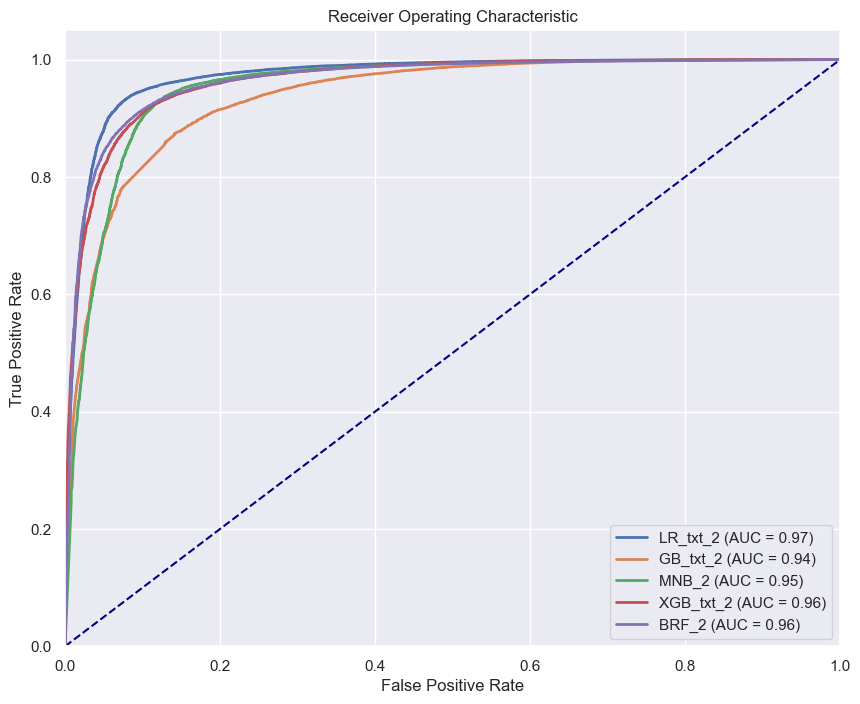

In [152]:
# Prepare data for ROC-curve and AUC
y_lr_txt_2= lr_txt_2.predict_proba(X_test_bag_2)
y_gb_txt_2 = gb_txt_2.predict_proba(X_test_bag_2)
y_mnb_2 = mnb_2.predict_proba(X_test_bag_2)
y_xgb_txt_2 = xgb_txt_2.predict_proba(X_test_bag_2)
y_brf_2 = brf_2.predict_proba(X_test_bag_2)

models = ['LR_txt_2','GB_txt_2','MNB_2','XGB_txt_2','BRF_2']
model_scores = [y_lr_txt_2, y_gb_txt_2,y_mnb_2, y_xgb_txt_2, y_brf_2]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_bag_2, model_scores[i][:, 1])  
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- 'LR_txt_2' with an AUC of 0.97 shows an excellent ability to distinguish between classes.
- 'BRF_2' and 'XGB_txt_2' both have an AUC of 0.96, indicating a good ability to discriminate between classes.
- 'MNB_2' with an AUC of 0.94 is also good.

Ultimately, based on the AUC values and the previously discussed metrics, 'LR_txt_2' can be considered the model that best discriminates between classes.

________________________________________________________________________________________________________________________________________________________

## TFidf Vectorizer with 1 grams

The TF-IDF representation assigns weights to terms based on their frequency in the document and their rarity across documents, providing a numerical representation of the text data that can be used as input to machine learning models.

### Data preprocessing

In [153]:
# Split the data
X_train_tf_1, X_test_tf_1, y_train_tf_1, y_test_tf_1 = train_test_split(df_txt['Comment'], df_txt['Sentiment'], test_size = 0.2, random_state = 1234)

In [154]:
# Import
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert data into a TF-IDF representation
vectorizer_tf_1 = TfidfVectorizer()
X_train_tf_1 = vectorizer_tf_1.fit_transform(X_train_tf_1)
X_test_tf_1 = vectorizer_tf_1.transform(X_test_tf_1)

### Model selection

Models:
- Logistic Regression
- Gradient Boosting
- MultinomialNB
- XGBoost
- Balanced Random Forest

__________________________________________________________________________________________________________________________________________________


Logistic Regression:

In [155]:
# Train a logistic regression model on the TF-IDF representations of the text data
lr_txt_TF = LogisticRegression(max_iter=4000)
lr_txt_TF.fit(X_train_tf_1, y_train_tf_1)

LogisticRegression(max_iter=4000)

In [156]:
# store lr_txt_TF
dump(lr_txt_TF, 'D:/DataScientest/joblib/lr_txt_TF.pkl')

['D:/DataScientest/joblib/lr_txt_TF.pkl']

In [157]:
# load lr_txt_TF
lr_txt_TF= load ('D:/DataScientest/joblib/lr_txt_TF.pkl')

In [158]:
# Prediction from the test data set
y_pred_lr_txt_TF= lr_txt_TF.predict(X_test_tf_1)

# Accuracy from the train and test data set
print('LR_txt_TF train score:',lr_txt_TF.score(X_train_tf_1, y_train_tf_1))
print('LR_txt_TF test score:',lr_txt_TF.score(X_test_tf_1,y_test_tf_1))

# Classification report
print(classification_report_imbalanced(y_pred_lr_txt_TF, y_test_tf_1))

LR_txt_TF train score: 0.9444232116695331
LR_txt_TF test score: 0.9374486878237975
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.88      0.95      0.85      0.92      0.83     14492
          1       0.97      0.95      0.88      0.96      0.92      0.84     56154

avg / total       0.94      0.94      0.89      0.94      0.92      0.84     70646



Grandient Boosting:

In [159]:
# Train a gradient boosting model on the TF-IDF representations of the text data
gb_txt_TF = GradientBoostingClassifier()
gb_txt_TF.fit(X_train_tf_1, y_train_tf_1)

GradientBoostingClassifier()

In [160]:
# store gb_txt_TF
dump(gb_txt_TF, 'D:/DataScientest/joblib/gb_txt_TF.pkl')

['D:/DataScientest/joblib/gb_txt_TF.pkl']

In [161]:
# load gb_txt_TF
gb_txt_TF= load ('D:/DataScientest/joblib/gb_txt_TF.pkl')

In [162]:
# Prediction from the test data set
y_pred_gb_txt_TF= gb_txt_TF.predict(X_test_tf_1)

# Accuracy from the train and test data set
print('GB_txt_TF train score:',gb_txt_TF.score(X_train_tf_1, y_train_tf_1))
print('GB_txt_TF test score:',gb_txt_TF.score(X_test_tf_1, y_test_tf_1))

# Classification report
print(classification_report_imbalanced(y_pred_gb_txt_TF, y_test_tf_1))

GB_txt_TF train score: 0.8869850167385043
GB_txt_TF test score: 0.8857260142117034
                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.90      0.88      0.67      0.89      0.80      9192
          1       0.98      0.88      0.90      0.93      0.89      0.79     61454

avg / total       0.93      0.89      0.90      0.90      0.89      0.79     70646



MultinomialNB:

In [163]:
# Train a MultinomialNB model on the TF-IDF representations of the text data
mnb_TF = MultinomialNB()
mnb_TF.fit(X_train_tf_1, y_train_tf_1)

MultinomialNB()

In [164]:
# store mnb_TF
dump(mnb_TF, 'D:/DataScientest/joblib/mnb_TF.pkl')

['D:/DataScientest/joblib/mnb_TF.pkl']

In [165]:
# load mnb_TF
mnb_TF= load ('D:/DataScientest/joblib/mnb_TF.pkl')

In [166]:
# Prediction from the test data set
y_pred_mnb_TF= mnb_TF.predict(X_test_tf_1)

# Accuracy from the train and test data set
print('MNB_TF train score:',mnb_TF.score(X_train_tf_1, y_train_tf_1))
print('MNB_TF test score:',mnb_TF.score(X_test_tf_1, y_test_tf_1))

# Classification report
print(classification_report_imbalanced(y_pred_mnb_TF, y_test_tf_1))

MNB_TF train score: 0.91756729020249
MNB_TF test score: 0.9105823401183365
                   pre       rec       spe        f1       geo       iba       sup

          0       0.65      0.92      0.91      0.76      0.91      0.83     10950
          1       0.98      0.91      0.92      0.95      0.91      0.83     59696

avg / total       0.93      0.91      0.92      0.92      0.91      0.83     70646



XGBoost:

In [167]:
# Train a xgboost model on the TF-IDF representations of the text data
xgb_txt_TF = XGBClassifier()
xgb_txt_TF.fit(X_train_tf_1, y_train_tf_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
# store xgb_txt_TF
dump(xgb_txt_TF, 'D:/DataScientest/joblib/xgb_txt_TF.pkl')

['D:/DataScientest/joblib/xgb_txt_TF.pkl']

In [169]:
# load xgb_txt_TF
xgb_txt_TF= load ('D:/DataScientest/joblib/xgb_txt_TF.pkl')

In [170]:
# Prediction from the test data set
y_pred_xgb_txt_TF= xgb_txt_TF.predict(X_test_tf_1)

# Accuracy from the train and test data set
print('XGB_txt_TF train score:',xgb_txt_TF.score(X_train_tf_1, y_train_tf_1))
print('XGB_txt_TF test score:',xgb_txt_TF.score(X_test_tf_1, y_test_tf_1))

# Classification report
print(classification_report_imbalanced(y_pred_xgb_txt_TF, y_test_tf_1))

XGB_txt_TF train score: 0.9308731624802712
XGB_txt_TF test score: 0.9227698666591173
                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.88      0.93      0.81      0.91      0.82     13021
          1       0.97      0.93      0.88      0.95      0.91      0.83     57625

avg / total       0.93      0.92      0.89      0.93      0.91      0.83     70646



Balanced Random Forest:

In [171]:
# Train a balanced random forrest model on the TF-IDF representations of the text data
brf_TF= BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)
brf_TF.fit(X_train_tf_1, y_train_tf_1)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [172]:
# store brf_TF
dump(brf_TF, 'D:/DataScientest/joblib/brf_TF.pkl')

['D:/DataScientest/joblib/brf_TF.pkl']

In [173]:
# load brf_TF
brf_TF= load ('D:/DataScientest/joblib/brf_TF.pkl')

In [174]:
# Prediction from the test data set
y_pred_brf_TF= brf_TF.predict(X_test_tf_1)

# Accuracy from the train and test data set
print('BRF_TF train score:',brf_TF.score(X_train_tf_1, y_train_tf_1))
print('BRF_TF test score:',brf_TF.score(X_test_tf_1, y_test_tf_1))

# Classification report
print(classification_report_imbalanced(y_pred_brf_TF, y_test_tf_1))

BRF_TF train score: 0.951787445767954
BRF_TF test score: 0.9035472638224387
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.72      0.97      0.80      0.84      0.68     19341
          1       0.90      0.97      0.72      0.94      0.84      0.72     51305

avg / total       0.90      0.90      0.79      0.90      0.84      0.71     70646



### Comparison of the models

- The model with the highest test accuracy is LR_txt_TF
- For negative ratings (class 0), BRF_TF shows the highest precision. MNB_2 achieves the highest recall
- For positive ratings (class 1), GB_txt_TF and MNB_TF show the highest precision. BRF_TF achieves the highest recall
- The highest F1 score is achieved by LR_txt_TF for both classes

Logistic Regression with TF-IDF (LR_txt_TF) shows the best performance overall with the highest test accuracy and balanced precision, recall and F1 score.




### ROC-curve and AUC

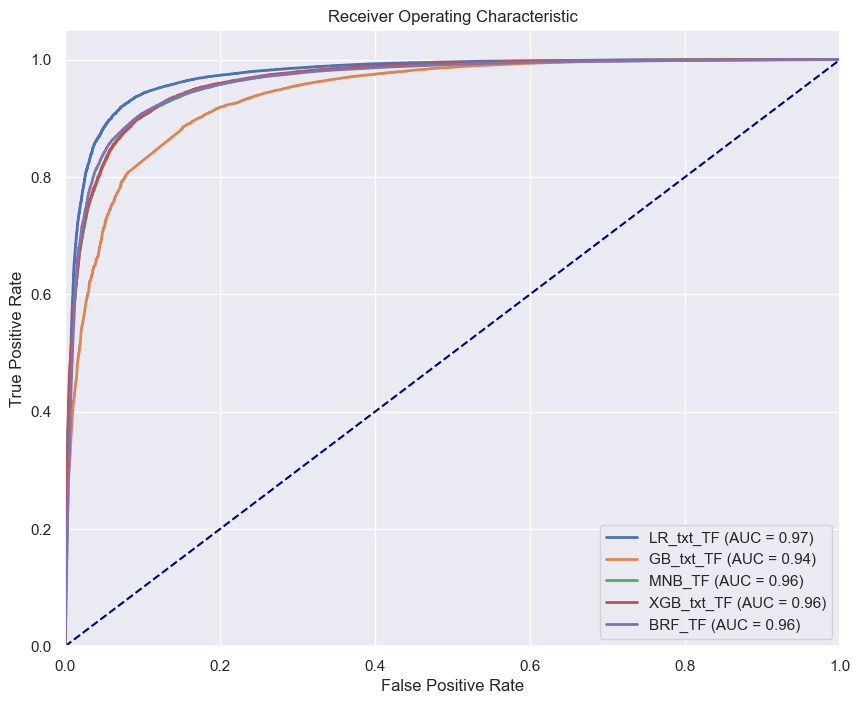

In [175]:
# Prepare data for ROC-curve and AUC
y_lr_txt_TF= lr_txt_TF.predict_proba(X_test_tf_1)
y_gb_txt_TF = gb_txt_TF.predict_proba(X_test_tf_1)
y_mnb_TF = mnb_TF.predict_proba(X_test_tf_1)
y_xgb_txt_TF = xgb_txt_TF.predict_proba(X_test_tf_1)
y_brf_TF = brf_TF.predict_proba(X_test_tf_1)

models = ['LR_txt_TF','GB_txt_TF','MNB_TF','XGB_txt_TF','BRF_TF']
model_scores = [y_lr_txt_TF, y_gb_txt_TF,y_mnb_TF, y_xgb_txt_TF, y_brf_TF]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_tf_1, model_scores[i][:, 1]) 
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- LR_txt_TF has the highest AUC value

Considering test accuracy, precision, recall, F1 score and AUC values, 'LR_txt_TF' consistently shows strong performance in all aspects and is considered the best choice in this particular application. 

___________________________________________________________________________________________________________________________________________________

## Tfidf Vectorizer with 2 grams

This TfidfVectoriser converts both unigrams and bigrams, which means that both individual words and pairs of consecutive words (bigrams) are taken into account. 

### Data preprocessing

In [176]:
# Split the data
X_train_TF_2, X_test_TF_2, y_train_tf_2, y_test_tf_2 = train_test_split(df_txt['Comment'], df_txt['Sentiment'], test_size = 0.2, random_state = 1234)

In [177]:
# Import
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data to Tf-IDF with 1 grams and 2 grams
vectorizer_tf_2 = TfidfVectorizer(ngram_range =(1,2),)
X_train_tf_2 = vectorizer_tf_2.fit_transform(X_train_TF_2)
X_test_tf_2 = vectorizer_tf_2.transform(X_test_TF_2)

### Model selection

Models:
- Logistic Regression
- Gradient Boosting
- MultinomialNB
- XGBoost
- Balanced Random Forest

__________________________________________________________________________________________________________________________________________________


Logistic Regression

In [178]:
# Train a logisitc regression model on the TF-IDF representations of the text data
lr_txt_TF_2 = LogisticRegression(max_iter=4000)
lr_txt_TF_2.fit(X_train_tf_2, y_train_tf_2)

LogisticRegression(max_iter=4000)

In [179]:
# store lr_txt_TF_2
dump(lr_txt_TF_2, 'D:/DataScientest/joblib/lr_txt_TF_2.pkl')

['D:/DataScientest/joblib/lr_txt_TF_2.pkl']

In [180]:
# load lr_txt_TF_2
lr_txt_TF_2= load ('D:/DataScientest/joblib/lr_txt_TF_2.pkl')

In [181]:
# Prediction from the test data set
y_pred_lr_txt_TF_2= lr_txt_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('LR_txt_TF_2 train score:', lr_txt_TF_2.score(X_train_tf_2, y_train_tf_2))
print('LR_txt_TF_2 test score:',lr_txt_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_pred_lr_txt_TF_2, y_test_tf_2))

LR_txt_TF_2 train score: 0.9581891274037271
LR_txt_TF_2 test score: 0.9391897630439091
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.88      0.95      0.86      0.92      0.84     14553
          1       0.97      0.95      0.88      0.96      0.92      0.85     56093

avg / total       0.94      0.94      0.90      0.94      0.92      0.85     70646



Gradient Boosting:

In [182]:
# Train a gradient boosting model on the TF-IDF representations of the text data
gb_txt_TF_2 = GradientBoostingClassifier()
gb_txt_TF_2.fit(X_train_tf_2, y_train_tf_2)

GradientBoostingClassifier()

In [183]:
# store gb_txt_TF_2
dump(gb_txt_TF_2, 'D:/DataScientest/joblib/gb_txt_TF_2.pkl')

['D:/DataScientest/joblib/gb_txt_TF_2.pkl']

In [184]:
# load gb_txt_TF_2
gb_txt_TF_2= load ('D:/DataScientest/joblib/gb_txt_TF_2.pkl')

In [185]:
# Prediction from the test data set
y_pred_gb_txt_TF_2= gb_txt_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('GB_txt_TF_2 train score:',gb_txt_TF_2.score(X_train_tf_2, y_train_tf_2))
print('GB_txt_TF_2 test score:',gb_txt_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_pred_gb_txt_TF_2, y_test_tf_2))

GB_txt_TF_2 train score: 0.8871478013461579
GB_txt_TF_2 test score: 0.8857967896271551
                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.90      0.88      0.67      0.89      0.80      9115
          1       0.98      0.88      0.90      0.93      0.89      0.80     61531

avg / total       0.93      0.89      0.90      0.90      0.89      0.80     70646



MultinomialNB

In [186]:
# Train a MultinomialNB model on the TF-IDF representations of the text data
mnb_TF_2 = MultinomialNB()
mnb_TF_2.fit(X_train_tf_2, y_train_tf_2)

MultinomialNB()

In [187]:
# store mnb_TF_2
dump(mnb_TF_2, 'D:/DataScientest/joblib/mnb_TF_2.pkl')

['D:/DataScientest/joblib/mnb_TF_2.pkl']

In [188]:
# load mnb_TF_2
mnb_TF_2= load ('D:/DataScientest/joblib/mnb_TF_2.pkl')

In [189]:
# Prediction from the test data set
y_pred_mnb_TF_2= mnb_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('MNB_TF_2 train score:', mnb_TF_2.score(X_train_tf_2, y_train_tf_2))
print('MNB_TF_2 test score:', mnb_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_pred_mnb_TF_2, y_test_tf_2))

MNB_TF_2 train score: 0.9128217650098025
MNB_TF_2 test score: 0.8836876822466948
                   pre       rec       spe        f1       geo       iba       sup

          0       0.48      0.97      0.87      0.64      0.92      0.86      7610
          1       1.00      0.87      0.97      0.93      0.92      0.84     63036

avg / total       0.94      0.88      0.96      0.90      0.92      0.84     70646



XGBoost

In [190]:
# Train a xgboost model on the TF-IDF representations of the text data
xgb_txt_TF_2 = XGBClassifier()
xgb_txt_TF_2.fit(X_train_tf_2, y_train_tf_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
# store xgb_txt_TF_2
dump(xgb_txt_TF_2, 'D:/DataScientest/joblib/xgb_txt_TF_2.pkl')

['D:/DataScientest/joblib/xgb_txt_TF_2.pkl']

In [192]:
# load xgb_txt_TF_2
xgb_txt_TF_2= load ('D:/DataScientest/joblib/xgb_txt_TF_2.pkl')

In [193]:
# Prediction from the test data set
y_pred_xgb_txt_TF_2= xgb_txt_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('XGB_txt_TF_2 train score:',xgb_txt_TF_2.score(X_train_tf_2, y_train_tf_2))
print('XGB_txt_TF_2 test score:',xgb_txt_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_pred_xgb_txt_TF_2, y_test_tf_2))

XGB_txt_TF_2 train score: 0.9316587751519912
XGB_txt_TF_2 test score: 0.9225858505789429
                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.89      0.93      0.81      0.91      0.82     12830
          1       0.97      0.93      0.89      0.95      0.91      0.83     57816

avg / total       0.93      0.92      0.90      0.93      0.91      0.83     70646



Balanced Random Forrest

In [194]:
# Train a balanced random forrest model on the TF-IDF representations of the text data
brf_TF_2 = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)
brf_TF_2.fit(X_train_tf_2, y_train_tf_2)

BalancedRandomForestClassifier(replacement=True, sampling_strategy='all')

In [195]:
# store brf_TF_2
dump(brf_TF_2, 'D:/DataScientest/joblib/brf_TF_2.pkl')

['D:/DataScientest/joblib/brf_TF_2.pkl']

In [196]:
# load brf_TF_2
brf_TF_2= load ('D:/DataScientest/joblib/brf_TF_2.pkl')

In [197]:
# Prediction from the test data set
y_pred_brf_TF_2= brf_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('BRF_TF_2 train score:',brf_TF_2.score(X_train_tf_2, y_train_tf_2))
print('BRF_TF_2 test score:',brf_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_pred_brf_TF_2, y_test_tf_2))

BRF_TF_2 train score: 0.9546326376060754
BRF_TF_2 test score: 0.9078220989157206
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.74      0.97      0.81      0.85      0.70     18431
          1       0.91      0.97      0.74      0.94      0.85      0.73     52215

avg / total       0.91      0.91      0.80      0.91      0.85      0.72     70646



### Comparison of Test Accuracy for Different Models

- Logistic Regression with TF-IDF (LR_txt_TF_2) shows the best performance overall with the highest test accuracy, precision, recall and F1 score
- Multinomial Naive Bayes with TF-IDF (MNB_TF_2) also shows strong performance, especially with high precision for positive scores.
- The other models, including Gradient Boosting with TF-IDF (GB_txt_TF_2), XGBoost with TF-IDF (XGB_txt_TF_2), and Balanced Random Forest with TF-IDF (BRF_TF_2), show different strengths in different metrics


### ROC-curve and AUC

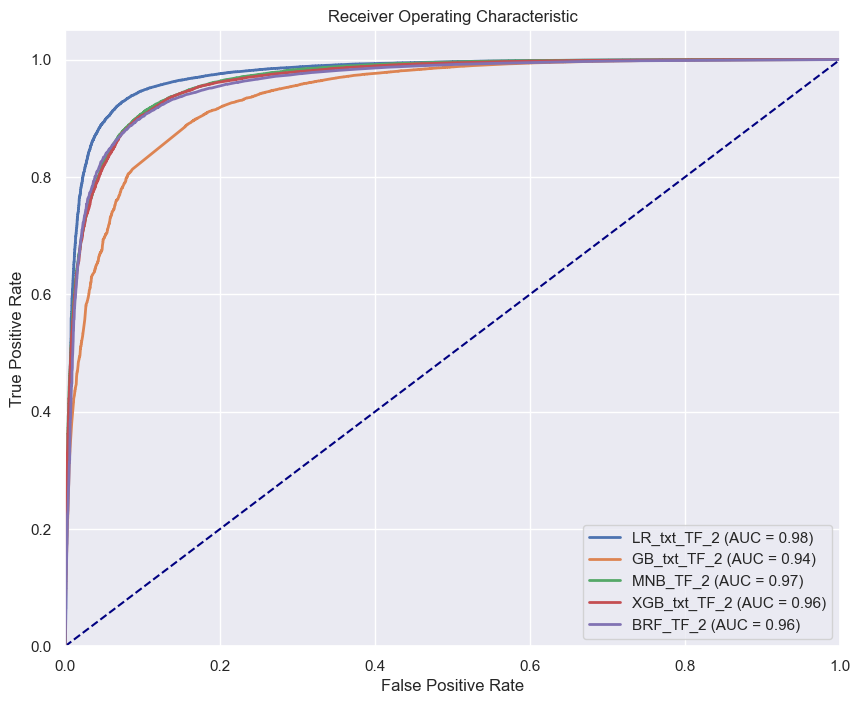

In [198]:
# Prepare data for ROC-curve and AUC
y_lr_txt_TF_2= lr_txt_TF_2.predict_proba(X_test_tf_2)
y_gb_txt_TF_2 = gb_txt_TF_2.predict_proba(X_test_tf_2)
y_mnb_TF_2 = mnb_TF_2.predict_proba(X_test_tf_2)
y_xgb_txt_TF_2 = xgb_txt_TF_2.predict_proba(X_test_tf_2)
y_brf_TF_2 = brf_TF_2.predict_proba(X_test_tf_2)

models = ['LR_txt_TF_2','GB_txt_TF_2','MNB_TF_2','XGB_txt_TF_2','BRF_TF_2']
model_scores = [y_lr_txt_TF_2, y_gb_txt_TF_2, y_mnb_TF_2, y_xgb_txt_TF_2, y_brf_TF_2]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_tf_2, model_scores[i][:, 1])  
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- The highest AUC value is achieved by LR_txt_TF_2, followed by XGB_txt_TF_2 and MNB_TF_2 


The logistic regression model was also chosen here. It has the highest accuracy, the highest AUC value and a balanced ratio between precision and recall indicates that the model performs well in identifying both positive and negative cases.

___________________________________________________________________________________________________________________________________________________

# Comparision of the best models

Here the best models from each group are compared again

- CountVectorizer with 1 grams: Logistic Regression
- CountVectoriser with 2 grams: Logistic Regression
- TfidfVectorizer with 1 grams: Logistic Regression
- TfidfVectorizer with 2 grams: Logistic Regression

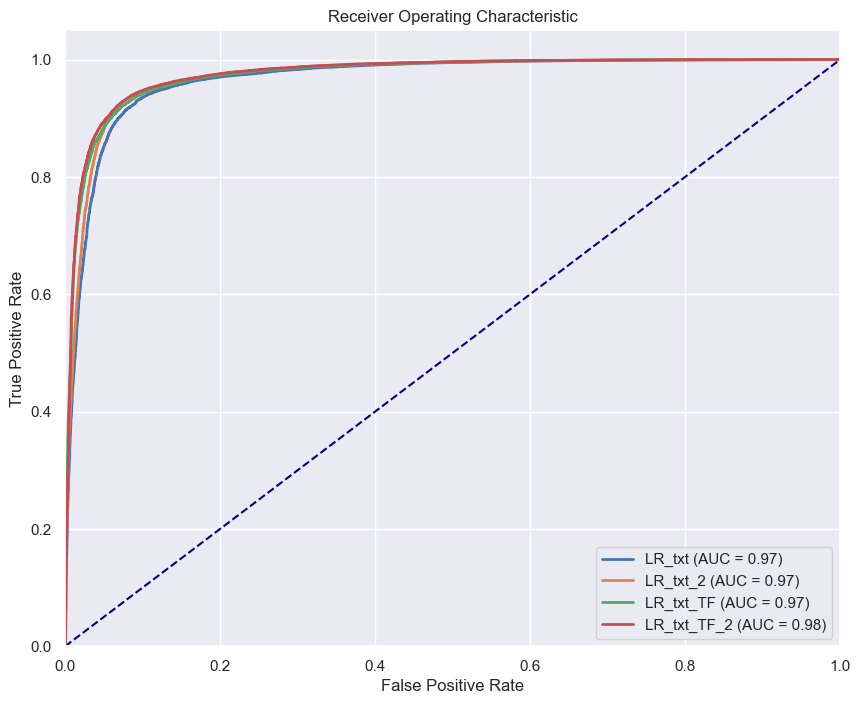

In [199]:
# Prepare data for ROC-curve and AUC
y_lr_txt = lr_txt.predict_proba(X_test_bag_1)
y_lr_txt_2 = lr_txt_2.predict_proba(X_test_bag_2)
y_lr_txt_TF = lr_txt_TF.predict_proba(X_test_tf_1)
y_lr_txt_TF_2 = lr_txt_TF_2.predict_proba(X_test_tf_2)

models = ['LR_txt', 'LR_txt_2', 'LR_txt_TF', 'LR_txt_TF_2']
model_scores = [y_lr_txt, y_lr_txt_2, y_lr_txt_TF, y_lr_txt_TF_2]

# labels for each model
y_tests = [y_test_bag_1, y_test_bag_2, y_test_tf_1, y_test_tf_2]

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_tests[i], model_scores[i][:, 1])  
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

The performance of the best models is very close to each other. We therefore apply further metrics here to make a selection.

**Matthews Correlation Coefficient (MCC):** The MCC is a balanced metric that takes into account all four values of the confusion matrix and is particularly effective when the classes are of different sizes.


**Kappa statistic (Cohen's Kappa):** The kappa statistic evaluates the performance of a model taking into account the possibility of random predictions. It is particularly useful for unbalanced classes.

In [209]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

y_lr_txt= lr_txt.predict(X_test_bag_1)
y_lr_txt_2 = lr_txt_2.predict(X_test_bag_2)
y_lr_txt_TF = lr_txt_TF.predict(X_test_tf_1)
y_lr_txt_TF_2 = lr_txt_TF_2.predict(X_test_tf_2)

# Matthews Correlation Coefficient
mcc_lr_txt = matthews_corrcoef(y_test_bag_1, y_lr_txt)
print(f"Matthews Correlation Coefficient for lr_txt : {mcc_lr_txt}")

mcc_lr_txt_2 = matthews_corrcoef(y_test_bag_2, y_lr_txt_2)
print(f"Matthews Correlation Coefficient for lr_txt_2: {mcc_lr_txt_2}")

mcc_lr_txt_TF = matthews_corrcoef(y_test_tf_1, y_lr_txt_TF)
print(f"Matthews Correlation Coefficient for lr_txt_TF: {mcc_lr_txt_TF}")

mcc_lr_txt_TF_2 = matthews_corrcoef(y_test_tf_2, y_lr_txt_TF_2)
print(f"Matthews Correlation Coefficientfor lr_txt_TF_2: {mcc_lr_txt_TF_2}")

# Cohen's Kappa 
kappa_lr_txt = cohen_kappa_score(y_test_bag_1, y_lr_txt)
print(f"Cohen's Kappa lr_txt: {kappa_lr_txt}")

kappa_lr_txt_2 = cohen_kappa_score(y_test_bag_2, y_lr_txt_2)
print(f"Cohen's Kappa lr_txt_2: {kappa_lr_txt_2}")

kappa_lr_txt_TF = cohen_kappa_score(y_test_tf_1, y_lr_txt_TF)
print(f"Cohen's Kappa lr_txt_TF: {kappa_lr_txt_TF}")

kappa_lr_txt_TF_2 = cohen_kappa_score(y_test_tf_2, y_lr_txt_TF_2)
print(f"Cohen's Kappa lr_txt_TF_2: {kappa_lr_txt_TF_2}")

Matthews Correlation Coefficient for lr_txt : 0.7976075391064965
Matthews Correlation Coefficient for lr_txt_2: 0.8153705643531843
Matthews Correlation Coefficient for lr_txt_TF: 0.8133843499471716
Matthews Correlation Coefficientfor lr_txt_TF_2: 0.8187818605823087
Cohen's Kappa lr_txt: 0.7957791163885369
Cohen's Kappa lr_txt_2: 0.8145333734128448
Cohen's Kappa lr_txt_TF: 0.8127290599650052
Cohen's Kappa lr_txt_TF_2: 0.8182061713696577


- All models show good performance with high AUC values.
- The LR_txt_2 and LR_txt_TF_2 models show overall high accuracies and are good at discriminating between classes.
- Both the Matthews Correlation Coefficient and Cohen's Kappa are highest for lr_txt_2 and lr_txt_TF_2.
- The use of bigrams is more suitable than than only use unigrams


For further comparisons at the notebook, we select lr_txt_TF_2 as the best model.


______________________________________________________________________________________________________________________________________________

## Gridsearch

For Gridsearch, the logistic regression was applied to the tfidf vectorisation with 2-grams. 

In [201]:
# Import 
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters 
param_grid = {'C': [0.1, 5, 10, 100],
              'solver': ['liblinear', 'saga','lbfgs'],
              'max_iter': [4000, 6000],
              'class_weight': [None, 'balanced']}

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=4000)

# Use GridSearchCV for optimization
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to the tfidf data with 2-grams
grid_search.fit(X_train_tf_2, y_train_tf_2)

# Display the best-found hyperparameters
print("The best hyperparameters are: ", grid_search.best_params_)

# Display the best-found accuracy
print("The best accuracy is: ", grid_search.best_score_)

The best hyperparameters are:  {'C': 5, 'class_weight': None, 'max_iter': 4000, 'solver': 'liblinear'}
The best accuracy is:  0.9413373819117105


In [202]:
# The best-found hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# Create the Logistic Regression model with the best hyperparameters
best_lr_txt_TF_2 = LogisticRegression(**best_params)

# Fit the model to your training data
best_lr_txt_TF_2.fit(X_train_tf_2, y_train_tf_2)

LogisticRegression(C=5, max_iter=4000, solver='liblinear')

In [210]:
# store best_lr_txt_TF_2
dump(best_lr_txt_TF_2, 'D:/DataScientest/joblib/best_lr_txt_TF_2.pkl')

['D:/DataScientest/joblib/best_lr_txt_TF_2.pkl']

In [211]:
# load best_lr_txt_TF_2
best_lr_txt_TF_2= load ('D:/DataScientest/joblib/best_lr_txt_TF_2.pkl')

In [213]:
# predictions
y_best_lr_txt_TF_2 = best_lr_txt_TF_2.predict(X_test_tf_2)

# Accuracy from the train and test data set
print('best_lr_txt_TF_2 train score:',best_lr_txt_TF_2.score(X_train_tf_2, y_train_tf_2))
print('best_lr_txt_TF_2 test score:',best_lr_txt_TF_2.score(X_test_tf_2,y_test_tf_2))

# Classification report
print(classification_report_imbalanced(y_best_lr_txt_TF_2, y_test_tf_2))

best_lr_txt_TF_2 train score: 0.985720958872115
best_lr_txt_TF_2 test score: 0.9417801432494409
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.88      0.96      0.86      0.92      0.84     14930
          1       0.97      0.96      0.88      0.96      0.92      0.85     55716

avg / total       0.94      0.94      0.90      0.94      0.92      0.85     70646



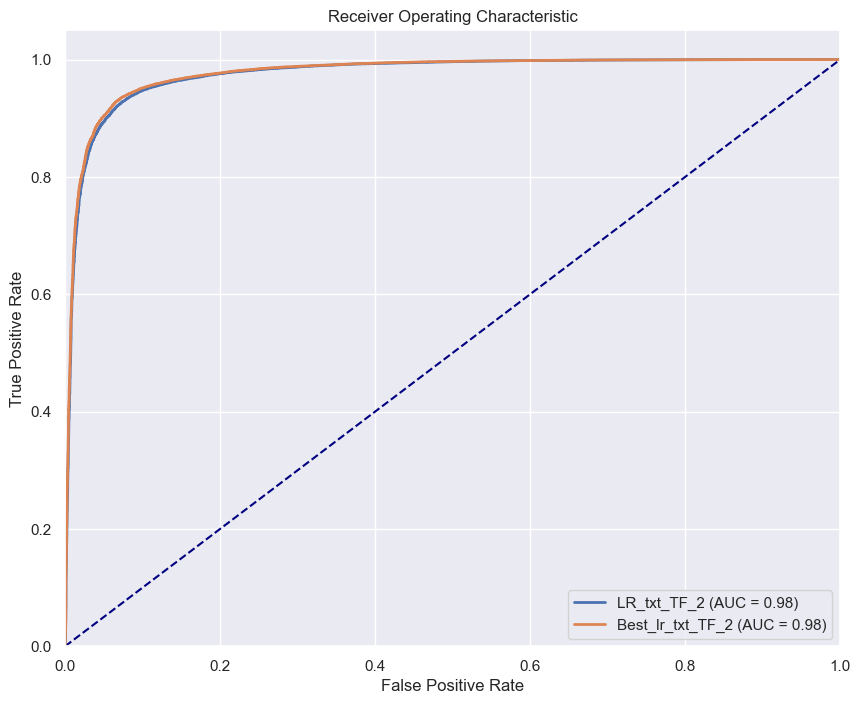

In [214]:
# Prepare data for ROC-curve and AUC
y_lr_txt_TF_2 = lr_txt_TF_2.predict_proba(X_test_tf_2)
y_best_lr_txt_TF_2 = best_lr_txt_TF_2.predict_proba(X_test_tf_2)


models = ['LR_txt_TF_2', 'Best_lr_txt_TF_2']
model_scores = [y_lr_txt_TF_2,y_best_lr_txt_TF_2 ]  

# Prepare plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


# ROC-curve for every model
for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test_tf_2, model_scores[i][:, 1])  
    roc_auc = auc(fpr, tpr)  # compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'{models[i]} (AUC = {roc_auc:.2f})')

# Adjust plot 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- Increased test accuracy
- Increased precision and recall
- Increased F1 score


________________________________________________________________________________________________________________________________________________

## POS Tagging of words

Now that we have chosen logistic regression as the best model for the text data, we will try to improve it with POS tagging.

This code involves tokenizing the comments, tagging the parts of speech (POS) for each token, and then creating a feature based on the POS tags.

In [215]:
from nltk import pos_tag

# Extract comments and labels
comments = df_txt['Comment']
labels = df_txt['Sentiment']  

# Tokenization and POS tagging
tagged_comments = []

for comment in comments:
    tokens = word_tokenize(comment)
    tagged_tokens = pos_tag(tokens)
    tagged_comments.append(tagged_tokens)

# Creating POS features
pos_features = []

for tagged_tokens in tagged_comments:
    pos_tags = [pos for _, pos in tagged_tokens]
    pos_features.append(" ".join(pos_tags))

#### Vectorization with TfIdf 2 grams after POS Tagging:

In [216]:
# Convert the text data to Tf-IDF with POS features
vectorizer_pos = TfidfVectorizer(ngram_range = (1,2))
X_pos = vectorizer_pos.fit_transform(pos_features)

In [217]:
# Split the data
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, labels, test_size=0.2, random_state=42)

In [218]:
# Train a logistic regression model on the TF-IDF representations of the POS features
lr_txt_TF_pos= LogisticRegression(C= 5, class_weight= None, max_iter= 4000, solver= 'liblinear')
lr_txt_TF_pos.fit(X_train_pos, y_train_pos)


LogisticRegression(C=5, max_iter=4000, solver='liblinear')

In [219]:
# store lr_txt_TF_pos
dump(lr_txt_TF_pos, 'D:/DataScientest/joblib/lr_txt_TF_pos.pkl')

['D:/DataScientest/joblib/lr_txt_TF_pos.pkl']

In [220]:
# load lr_txt_TF_pos
lr_txt_TF_pos= load ('D:/DataScientest/joblib/lr_txt_TF_pos.pkl')

In [221]:
# Prediction from the test data set
y_pred_lr_txt_TF_pos = lr_txt_TF_pos.predict(X_test_pos)

# Accuracy from the training and test data set
print('LR_txt_TF_pos train score:',lr_txt_TF_pos.score(X_train_pos, y_train_pos))
print('LR_txt_TF_pos train score:',lr_txt_TF_pos.score(X_test_pos, y_test_pos))

# Accuracy from the training and test data set
print(classification_report_imbalanced(y_pred_lr_txt_TF_pos, y_test_pos))


LR_txt_TF_pos train score: 0.832140759142479
LR_txt_TF_pos train score: 0.8321207145485944
                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.68      0.85      0.50      0.76      0.57      8819
          1       0.95      0.85      0.68      0.90      0.76      0.59     61827

avg / total       0.88      0.83      0.71      0.85      0.76      0.59     70646



In [222]:
# AUC
y_lr_txt_TF_pos = lr_txt_TF_pos.predict_proba(X_test_pos)

fpr, tpr, _ = roc_curve(y_test_pos, y_lr_txt_TF_pos[:, 1])  # fpr: False Positive Rate, tpr: True Positive Rate
auc = auc(fpr, tpr)  # compute AUC
print('AUC=',auc)

AUC= 0.826542492955414


- "LR_txt_TF_2" shows a better performance overall, especially in terms of Accuracy, Precision, Recall and F1-Score for class 0.
- The precision value for class 0 is higher in "LR_txt_TF_2", which means that of the instances predicted as class 0, a larger percentage actually belong to class 0.
- The Recall value for class 0 is also higher in "LR_txt_TF_2", which indicates that a larger percentage of the actual instances of class 0 are recognised by the model.


-> No improvement with POS tagging

_________________________________________________________________________________________________________________________________________________________

## Word2vec analysis

Word2Vec is a technique in the field of natural language processing (NLP) and machine learning that is used to represent words as vectors in a multidimensional space.

In the following code, the comments are tokenised and these are used to create a Word2Vec model. Vectors are then created for each comment to represent the semantic representation of the words in the comment in the vector space.

In Word2Vec, the vector_size refers to the dimensionality of the vectors used to represent the words in the vocabulary. Typically, larger vectors are capable of capturing more semantic information, but also require more computational resources. We will create two models, one with vector_size=100 and one with vector_size=300, to test which one gives better results.

### Word2vec word embeddings with vector size: 100



In [223]:
# Import
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Extract comments and labels
comments =df_txt['Comment']
labels = df_txt['Sentiment']

# Tokenize comments
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_comments, vector_size=100, window=5, min_count=1, workers=4)

# Generate comment vectors
comment_vectors = []

for comment in tokenized_comments:
    vector = sum([word2vec_model.wv[word] for word in comment]) / len(comment) if len(comment) > 0 else [0] * 100 
    comment_vectors.append(vector)
    

In [224]:
# Split the data
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(comment_vectors, labels, test_size=0.2, random_state=42)

In [225]:
# Train a logistic regression model on the word2vec representations of the text data
lr_w2v = LogisticRegression(C= 5, class_weight= None, max_iter= 4000, solver= 'liblinear')
lr_w2v.fit(X_train_w2v, y_train_w2v)

LogisticRegression(C=5, max_iter=4000, solver='liblinear')

In [226]:
# store lr_w2v
dump(lr_w2v, 'D:/DataScientest/joblib/lr_w2v.pkl')

['D:/DataScientest/joblib/lr_w2v.pkl']

In [227]:
# load lr_w2v
lr_w2v= load ('D:/DataScientest/joblib/lr_w2v.pkl')

In [228]:
# Prediction from the test data set
y_pred_w2v = lr_w2v.predict(X_test_w2v)

# Accuracy from the train and test data set
print(lr_w2v.score(X_train_w2v, y_train_w2v))
print(lr_w2v.score(X_test_w2v, y_test_w2v))

# Classification report
print(classification_report_imbalanced(y_pred_w2v, y_test_w2v))

0.9241777607915579
0.9249922147043003
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.84      0.95      0.82      0.89      0.78     14592
          1       0.96      0.95      0.84      0.95      0.89      0.80     56054

avg / total       0.93      0.92      0.86      0.93      0.89      0.80     70646



## Word2vec word embeddings with vector size: 300

In [40]:
# Import
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Extract comments and labels
comments = df_txt['Comment']
labels = df_txt['Sentiment']

# Tokenize comments
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]

# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_comments,
    vector_size=300,
    window=5,
    min_count=1,
    workers=4)

# Generate comment vectors
comment_vectors_300 = []

for comment in tokenized_comments:
    
    word_vectors = [word2vec_model.wv[word] for word in comment if word in word2vec_model.wv]
    
    if word_vectors:
        vector = np.mean(word_vectors, axis=0)
    else:
        vector = np.zeros(300) 
    
    comment_vectors_300.append(vector)

In [230]:
# Split the data
X_train_w2v_300, X_test_w2v_300, y_train_w2v_300, y_test_w2v_300 = train_test_split(comment_vectors_300, labels, test_size=0.2, random_state=42)

In [231]:
# Train a logistic regression model on the TF-IDF representations of the text data
lr_w2v_300 = LogisticRegression(C= 5, class_weight= None, max_iter= 4000, solver= 'liblinear')
lr_w2v_300.fit(X_train_w2v_300, y_train_w2v_300)

LogisticRegression(C=5, max_iter=4000, solver='liblinear')

In [232]:
# store lr_w2v_300
dump(lr_w2v_300, 'D:/DataScientest/joblib/lr_w2v_300.pkl')

['D:/DataScientest/joblib/lr_w2v_300.pkl']

In [233]:
# load lr_w2v_300
lr_w2v_300= load ('D:/DataScientest/joblib/lr_w2v_300.pkl')

In [234]:
# Prediction from the test data set
y_pred_w2v_300 = lr_w2v_300.predict(X_test_w2v_300)

# Accuracy from the train and test data set
print(lr_w2v_300.score(X_train_w2v_300, y_train_w2v_300))
print(lr_w2v_300.score(X_test_w2v_300, y_test_w2v_300))

# Classification report
print(classification_report_imbalanced(y_pred_w2v_300, y_test_w2v_300))

0.9294894933152147
0.9299748039520992
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.85      0.95      0.83      0.90      0.80     14638
          1       0.96      0.95      0.85      0.96      0.90      0.81     56008

avg / total       0.93      0.93      0.87      0.93      0.90      0.81     70646



-> Neither the model with vector_size=100 nor the model with vector_size=300 provides an improvement.


# KMeans

Although Word2Vec did not improve performance, we use the comment_vectors_300 to apply KMeans clustering to our dataset. The goal is to capture semantic relationships between words in our text data.

#### Dimension reduction with PCA
Before we can apply kMeans, we need to reduce the dimension of our dataset because it is too large. To do this, we apply PCA (Principal Component Analysis) to the comment_vectors_300. This is a linear transformation technique that aims to reduce the correlations between the variables in a data set by transforming the data into a new coordinate space.

So at first, we determine the optimal number of principal components to retain most of the variance in the data.

In [41]:
# Import
from sklearn.decomposition import PCA

# Convert the list comment_vectors_300 into a numpy-array
X = np.array(comment_vectors_300)

# Create a PCA object
pca = PCA(n_components=0.95, whiten=True)
vectors_pca = pca.fit_transform(X)

# Analyse the explained variance and determine the optimal number of components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
optimal_num_components = (cumulative_variance >= 0.95).argmax() + 1

# Output of the optimum number of components
print(f'Optimal Number of Components: {optimal_num_components}')

Optimal Number of Components: 103


**The cumulative explained variance in relation to the number of principal components**

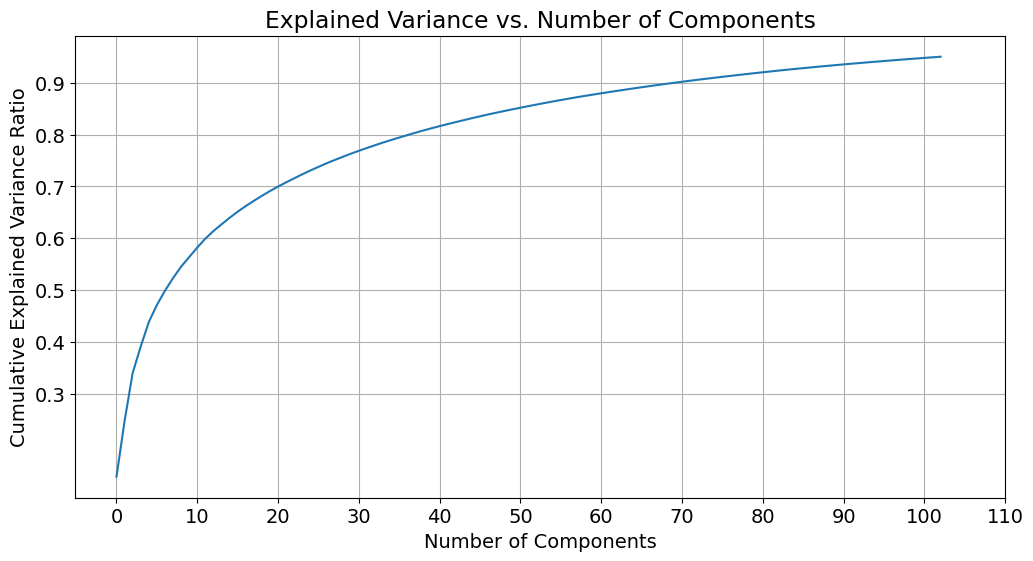

In [42]:
# Calculates the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Creates a line chart with the cumulative explained variance
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.xticks(np.arange(0, 120, step=10))
plt.yticks(np.arange(0.3, 1.0, step=0.1))

plt.grid(True)
plt.show()

- The line rises steeply up to about the first 10 principal components, which means that these principal components contain the most information

- A cumulative explained variance of at least 95% is reached at 103 principal components

In [43]:
variance_ratio = 0.95  
n_components = np.argmax(cumulative_variance_ratio >= variance_ratio) + 1
print(n_components)

103


#### Silhouette Score

to find the number of clusters (k) for KMeans

In [7]:
# Import
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_silhouette_score = -1
best_n_clusters = -1

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    current_silhouette_score = silhouette_score(vectors_pca, cluster_labels)

    if current_silhouette_score > best_silhouette_score:
        best_silhouette_score = current_silhouette_score
        best_n_clusters = n_clusters

print(f"Best Number of Clusters: {best_n_clusters}")

Best Number of Clusters: 2


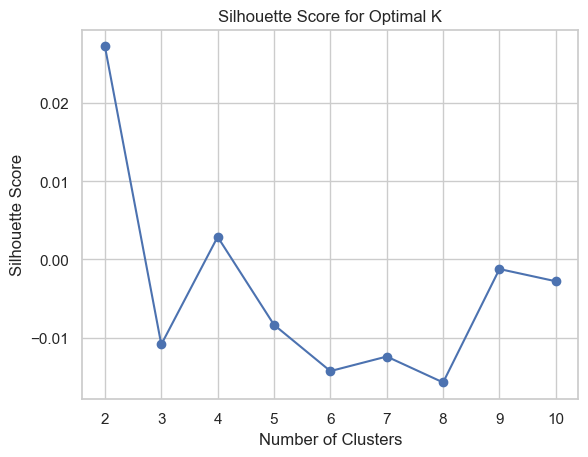

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(vectors_pca)
    silhouette_scores.append(silhouette_score(vectors_pca, cluster_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

The optimal number of clusters is the one with the highest average Silhouette Score across all data points. Consequently, the number 2 was determined for n_clusters.
2 Clusters only separate the data into good and bad reviews. For the following cluster analysis, we take the second maximum that can be seen in the diagram.

-> N_clusters = 4



Once the number of clusters has been determined, the following code performs KMeans clustering on the PCA-transformed vectors (vectors_pca) and visualises the resulting clusters in two-dimensional space (if two principal components are present).

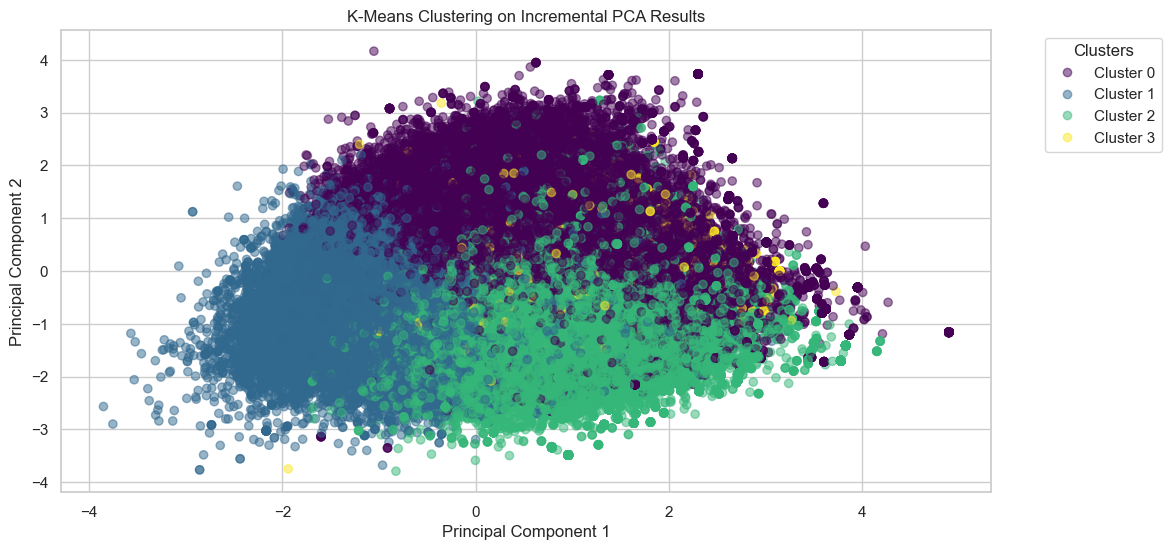

In [53]:
 # Import
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 4

# KMeans-Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(vectors_pca)

# Visualisation of the clusters
cluster_labels = kmeans.labels_

if n_components >= 2:
    scatter_plot = plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title('K-Means Clustering on Incremental PCA Results')
    plt.xlabel(f'Principal Component 1')
    plt.ylabel(f'Principal Component 2')

    # Adding Legend
    legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
    legend = plt.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()
else:
    print("Visualization is not possible with fewer than 2 components.")

# Assignment of the cluster labels to the DataFrame
df_txt['ClusterLabel'] = cluster_labels

- Overlapping of the clusters
- Clusters 0, 1 and 2 can be clearly distinguished from each other
- In cluster 3 you only see isolated data points.



Further research is required to examine specific areas within the cluster in detail. 



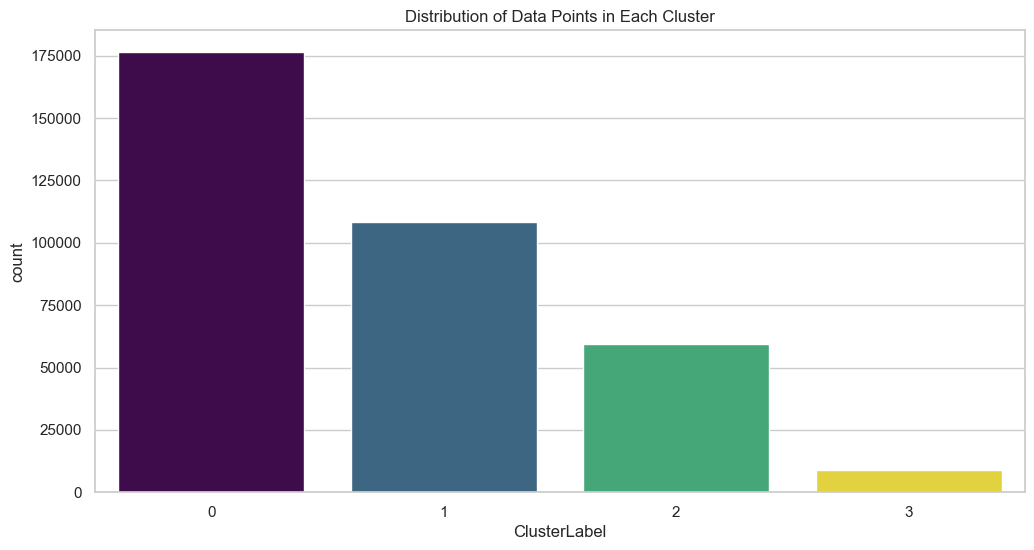

Cluster Assignments:
Cluster 0: 176401 data points
Cluster 1: 108467 data points
Cluster 2: 59352 data points
Cluster 3: 9008 data points


In [58]:
# Plot Distribution of Data Points in Each Cluster
sns.set(style="whitegrid")
sns.countplot(data=df_txt, x='ClusterLabel', hue='ClusterLabel', palette='viridis', legend=False)
plt.title('Distribution of Data Points in Each Cluster')
plt.show()

# Output cluster assignments
print("Cluster Assignments:")
for i in range(n_clusters):
    print(f"Cluster {i}: {np.sum(cluster_labels == i)} data points")

In [59]:
# Cluster characteristics for 'Sentiment' and 'Comment' columns:

# Iterating over clusters and printing characteristics
for cluster_id in range(n_clusters):
    # Extracting data for the current cluster
    cluster_data = df_txt[df_txt['ClusterLabel'] == cluster_id][['Sentiment', 'Comment']]
    
    # Printing cluster-specific information
    print(f"\nCluster {cluster_id} Characteristics:")
    print(cluster_data.head(50))


Cluster 0 Characteristics:
     Sentiment                                            Comment
1            1  great used tech site ordered time every time i...
2            1  order quickly filled yet opened earbuds they i...
3            1  recently ordered wireless earbuds shipping fai...
5            1  product price fantastic jbl ear pod great soun...
6            1  strong affinity product come sound quality opi...
8            0  done research company purchasing anything like...
9            1  cost efficiency purchase worth star product al...
17           1  fast shipping item brand new sealed described ...
18           0  speaker connect using bluetooth tried multiple...
21           0  sound great ear pod ear pod trouble staying ea...
24           1  carry nice variety product many deep discount ...
25           1  great product excellent price otterbox defende...
27           1  see lot review regarding purchase throughout m...
33           1  continue use many year buying ap

#### Interpretation of cluster characteristics:

- Cluster 0: Emphasizes the quality of products and customer satisfaction.
- Cluster 1: Contains mixed reviews with a focus on issues and customer service.
- Cluster 2: Shows positive reviews with a strong emphasis on price and fast shipping.
- Cluster 3: Contains consistently positive reviews that reflect long-term experiences.



In [60]:
# Statistic information of each cluster

# Sentiment
cluster_stats_selected = df_txt.groupby('ClusterLabel')['Sentiment'].describe()
print('Sentiment:', cluster_stats_selected)

# Comment
cluster_stats_selected = df_txt.groupby('ClusterLabel')['Comment'].describe()
print('Comment:',cluster_stats_selected)

Sentiment:                  count      mean       std  min  25%  50%  75%  max
ClusterLabel                                                       
0             176401.0  0.887075  0.316501  0.0  1.0  1.0  1.0  1.0
1             108467.0  0.492316  0.499943  0.0  0.0  0.0  1.0  1.0
2              59352.0  0.976580  0.151233  0.0  1.0  1.0  1.0  1.0
3               9008.0  0.990231  0.098360  0.0  1.0  1.0  1.0  1.0
Comment:                count  unique                      top  freq
ClusterLabel                                               
0             176401  162161         great experience   422
1             108467  107294               easy check    33
2              59352   44327            great service  1172
3               9008    7564  always great experience   106



Cluster 0 - Most Common Words: [('great', 50922), ('easy', 46345), ('case', 43100), ('good', 39897), ('love', 35022), ('product', 31947), ('use', 24265), ('time', 22062), ('one', 20494), ('price', 20192), ('would', 20003), ('phone', 19819), ('it', 19479), ('new', 17262), ('service', 17150), ('delivery', 17073), ('really', 16221), ('well', 15504), ('order', 15385), ('excellent', 14973), ('bought', 14674), ('best', 14670), ('website', 14271), ('like', 13374), ('purchase', 13332)]

Cluster 1 - Most Common Words: [('service', 55368), ('customer', 40330), ('day', 38971), ('order', 32872), ('product', 29673), ('delivery', 29215), ('time', 27808), ('would', 26427), ('ordered', 22892), ('get', 22502), ('one', 19739), ('phone', 19509), ('case', 19292), ('received', 18903), ('still', 18110), ('week', 17610), ('email', 17343), ('back', 17284), ('new', 17144), ('good', 16825), ('great', 16288), ('machine', 16125), ('item', 15893), ('it', 14603), ('samsung', 14483)]

Cluster 2 - Most Common Words:

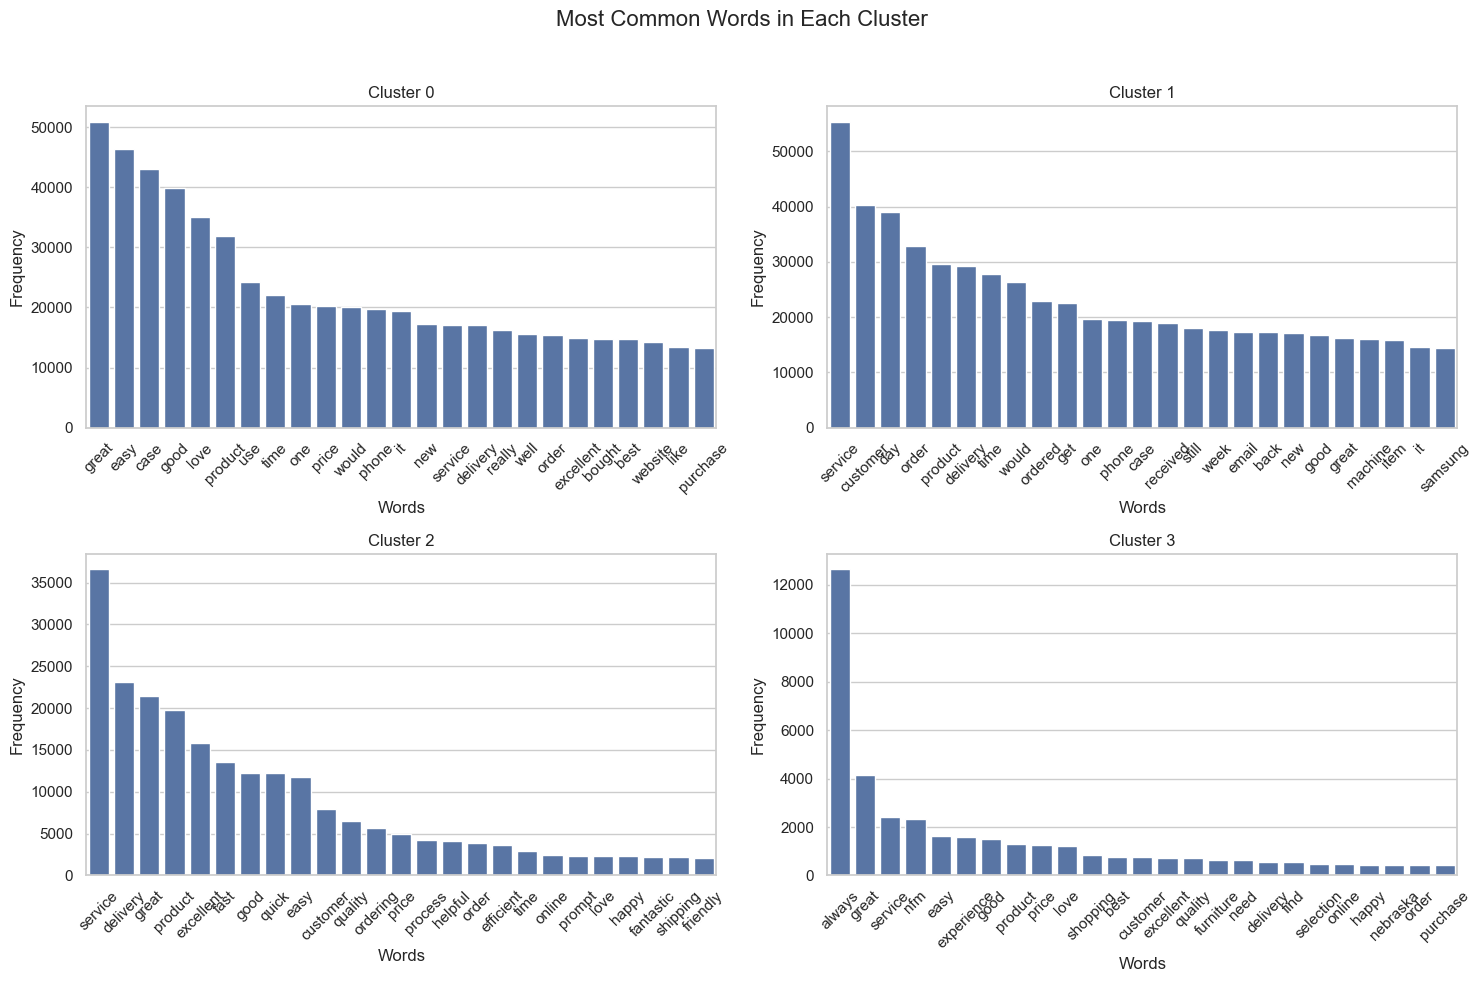

In [62]:
# Most common words of each cluster

# Import
from collections import Counter

# Grouping comments by cluster
cluster_comments = df_txt.groupby('ClusterLabel')['Comment'].apply(list)

def get_most_common_words(tokenized_comments, top_n=25):
    all_words = [word for comment_list in tokenized_comments for comment in comment_list.split() for word in comment.split()]
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Most Common Words in Each Cluster", fontsize=16)

# Iterate over each cluster and its associated comments
for i, (ax, (cluster, comments)) in enumerate(zip(axes.flatten(), cluster_comments.items()), start=1):
    # Get the most common words for the current cluster
    common_words = get_most_common_words(comments)
    
    # Unpack words and counts from the common_words list
    words, counts = zip(*common_words)
    
    # Print cluster characteristics
    print(f"\nCluster {cluster} - Most Common Words: {common_words}")
    
    # Plot bar chart with seaborn
    sns.barplot(x=words, y=counts, ax=ax)
    
    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

#### T test
to compare the mean values of sentiment scores between the clusters.

The t-statistic represents the test statistic of the t-test, and the P-value is the probability of observing such extreme values under the null hypothesis. If the P-value is less than the chosen significance level (alpha), one would reject the null hypothesis and conclude that there is a significant difference in sentiment between the two clusters.

To perform the t-test, cluster 0 and cluster 2 are selected. 

In [63]:
# Import
from scipy.stats import ttest_ind

# Extracting sentiment data for Cluster 0
cluster_0_data = df_txt[df_txt['ClusterLabel'] == 0]['Sentiment']

# Extracting sentiment data for Cluster 4
cluster_2_data = df_txt[df_txt['ClusterLabel'] == 2]['Sentiment']

# Performing a t-test
t_statistic, p_value = ttest_ind(cluster_0_data, cluster_2_data)

# Displaying the results with greater precision
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Setting the significance level (alpha)
alpha = 0.05

# Checking if the p-value is less than alpha
if p_value < alpha:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")

T-Statistic: -66.39217013702188
P-Value: 0.0
The difference in means is statistically significant.


The t-test shows a significant difference in the mean sentiment scores between clusters 0 and 2. The t-statistic of about -66.39 and the P-value of 0.0 indicate that the observed difference in the means is statistical is significant.

_____________________________________________________________________________________________________________________________________

#  Neuronal network with feature selection and dimensionality reduction



**Pre-processing**

In [20]:
# Import
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Load df
df = load('D:/DataScientest/joblib/df.pkl')
df_nn=df.copy()



# Separate the data into features and target
data_nn =df_nn.drop('Sentiment', axis=1)
target_nn= df_nn['Sentiment']

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn =train_test_split(data_nn, target_nn, test_size =0.2, random_state=1, stratify=target_nn)

# col_names for metadata features
col=['Num_of_reviews', 'Response', 'com_day', 'com_month',
       'com_year', 'res_day', 'res_month', 'res_year', 'Num_of_words',
       'Capital_count', 'Smile_count', 'Sad_count', 'Exclamation_count',
       'Question_count', 'Integer_count']

# Convert the text data to Tf-IDF with 1 grams and 2 grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_comment_tfidf = vectorizer.fit_transform(X_train_nn['Comment'])
X_test_comment_tfidf = vectorizer.transform(X_test_nn['Comment'])


# Scale the metadata features using StandardScaler 
sc = StandardScaler()
X_train_nn[col] = sc.fit_transform(X_train_nn[col])
X_test_nn[col]= sc.transform(X_test_nn[col])




1. In this preparation step, the 10 best numerical features are selected, a SimpleImputer is created (replaces missing values with the mean value of the respective column) and a StandardScaler is created.

2. The dimension of the text data is reduced to 200 principal components.

3. The pipelines make it possible to organize and automate the different pre-processing steps for numerical and text data so that they can be applied equally to training and test data.

4. The ColumnTransformer is used to apply different transformations to numeric and textual data separately before merging them into a combined data set.

5. 'preproccesor' (ColumnTransformer, consisting of the two pipelines) is used to perform preprocessing on the training data (X_train_nn).

6. The feature selection 'selector_numeric' is applied to the numeric part of the combined data to extract the most important numeric features.


In [9]:
# Import
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Feature Selection for numeric data
k_best_numeric = 10  
selector_numeric = SelectKBest(f_classif, k=k_best_numeric)

# Imputer for missing values
imputer = SimpleImputer()

# scale for combined data
scaler = StandardScaler()

# PCA for textdata (TruncatedSVD is used for sparsely populated data instead of PCA)
n_components_text = 200 
pca_text = TruncatedSVD(n_components=n_components_text)


# Pipeline for numeric data
numeric_pipeline = Pipeline([('imputer', imputer),
                             ('scaler', scaler)])

# Pipeline for text data
text_pipeline = Pipeline([('tfidf', vectorizer),  
                          ('pca', pca_text)])


# ColumnTransformer for numeric and textdata separate
preprocessor = ColumnTransformer(
    transformers=[('numeric', numeric_pipeline, col),
                  ('text', text_pipeline, 'Comment')])


# Execute preprocessing on traindata
X_train_combined = preprocessor.fit_transform(X_train_nn)

# Apply the feature selection to the numerical part
X_train_numeric_selected = selector_numeric.fit_transform(X_train_combined[:, :k_best_numeric], y_train_nn)

**Neuronal network (NN)**

- The combined train data is divided again into training and validation data

- A sequential model with three layers is created.

- The model is compiled with the binary cross entropy as loss function, the Adam optimizer and the accuracy as metric.

- The model is trained on training data and evaluated on the validation data in each epoch.

In [10]:
# Import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split to train and val data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_combined, y_train_nn, test_size=0.2, random_state=42)

# Create a neuronal network
model_nn = Sequential()

# Add layers for the combined data
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model_nn.fit(X_train,
                     y_train,
                     epochs=10,
                     batch_size=32,
                     validation_data=(X_valid, y_valid))


Epoch 1/10
7065/7065 [==============================] - 45s 5ms/step - loss: 0.1824 - accuracy: 0.9276 - val_loss: 0.1596 - val_accuracy: 0.9387
Epoch 2/10
7065/7065 [==============================] - 19s 3ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.1556 - val_accuracy: 0.9398
Epoch 3/10
7065/7065 [==============================] - 21s 3ms/step - loss: 0.1520 - accuracy: 0.9394 - val_loss: 0.1501 - val_accuracy: 0.9418
Epoch 4/10
7065/7065 [==============================] - 19s 3ms/step - loss: 0.1484 - accuracy: 0.9411 - val_loss: 0.1563 - val_accuracy: 0.9379
Epoch 5/10
7065/7065 [==============================] - 22s 3ms/step - loss: 0.1448 - accuracy: 0.9425 - val_loss: 0.1468 - val_accuracy: 0.9432
Epoch 6/10
7065/7065 [==============================] - 18s 3ms/step - loss: 0.1428 - accuracy: 0.9433 - val_loss: 0.1495 - val_accuracy: 0.9425
Epoch 7/10
7065/7065 [==============================] - 17s 2ms/step - loss: 0.1404 - accuracy: 0.9442 - val_loss: 0.1456 - val_ac

In [11]:
# store model_nn
dump(model_nn, 'D:/DataScientest/joblib/model_nn.pkl')

# store history
dump(history, 'D:/DataScientest/joblib/history.pkl')


['D:/DataScientest/joblib/history.pkl']

In [12]:
# load model_nn
model_nn= load ('D:/DataScientest/joblib/model_nn.pkl')

# load history
history=load ('D:/DataScientest/joblib/history.pkl')


**Evaluation of the model_nn**

In [13]:
# Execute preprocessing on testdata
X_test_combined = preprocessor.transform(X_test_nn)

# Apply the feature selection to the numerical part
X_test_numeric_selected = selector_numeric.transform(X_test_combined[:, :k_best_numeric])

In [14]:
# Import
from sklearn.metrics import roc_auc_score

# Make prediction
y_pred_nn = model_nn.predict(X_test_combined)
y_pred_nn = (y_pred_nn > 0.5).astype(int)


# Evaluation
accuracy_nn_test = accuracy_score(y_test_nn, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test_nn, y_pred_nn)

print(f'Accuracy test: {accuracy_nn_test }')
print(f'ROC-AUC: {roc_auc_nn}')

# Classification_report
print(classification_report_imbalanced(y_test_nn, y_pred_nn))

2208/2208 [==============================] - 18s 1ms/step
Accuracy test: 0.9441865073747983
ROC-AUC: 0.9030755134068876
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.83      0.98      0.87      0.90      0.80     15293
          1       0.95      0.98      0.83      0.96      0.90      0.82     55353

avg / total       0.94      0.94      0.86      0.94      0.90      0.82     70646



- The test accuracy of model_nn is higher than the Logistic regression model .

- In terms of precision, recall and F1-score, both models are able to evaluate positive and negative classes well.

- The precision for class 0 is higher in model_nn compared to Best_lr_txt_TF_2.

- The recall for class 0 is higher in Best_lr_txt_TF_2 compared to that of model_nn.


**Loss and Accuracy Visualization**

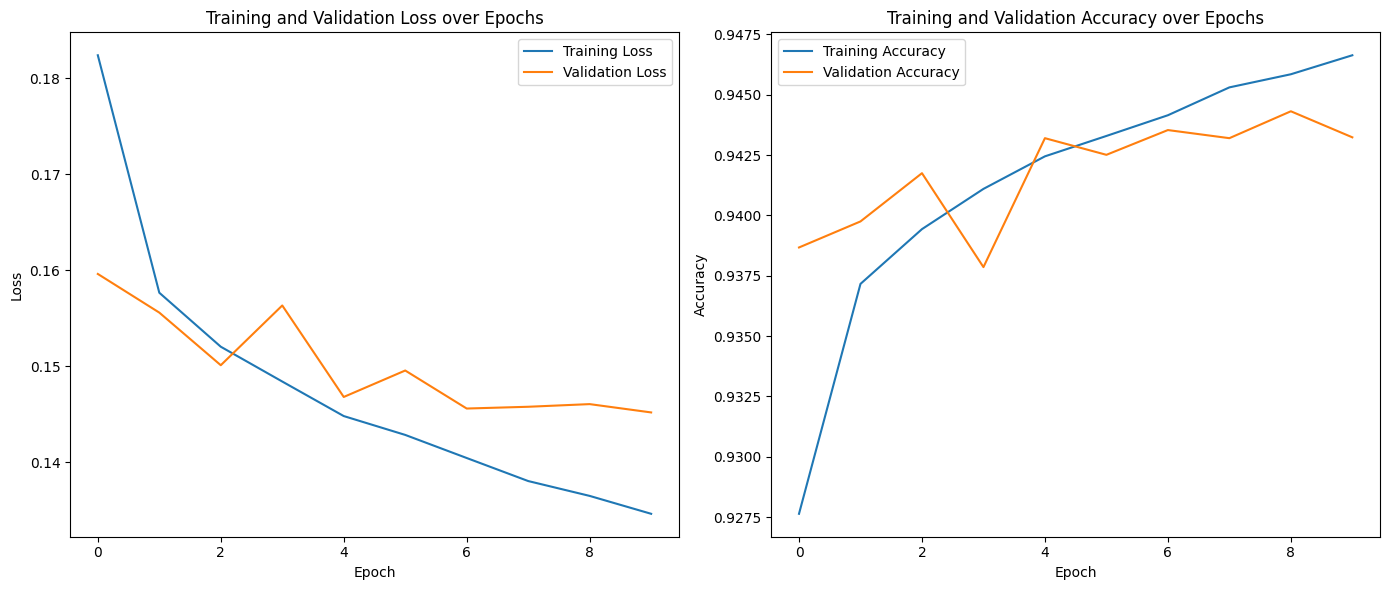

In [15]:
# Create figuresize
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout spacing
plt.tight_layout()

plt.show()

- Train loss and validation loss decrease
- Train accuracy and validation accuracy increase


The model exhibits effective learning without overfitting or underfitting, making it well-suited for sentiment classification in comments.
_____________________________________________________________________________________________________________________________________

# Interpretation of the models

In [21]:
# load 
best_lr_txt_TF_2 = load('D:/DataScientest/joblib/best_lr_txt_TF_2.pkl')
xgb_best = load ('D:/DataScientest/joblib/xgb_best.pkl')
model_nn = load ('D:/DataScientest/joblib/model_nn.pkl')

## Interpretation of the model for metadata

### Feature importance 

The chart shows the relative importance of each feature to the model and allows you to visually understand the importance of features in model prediction.

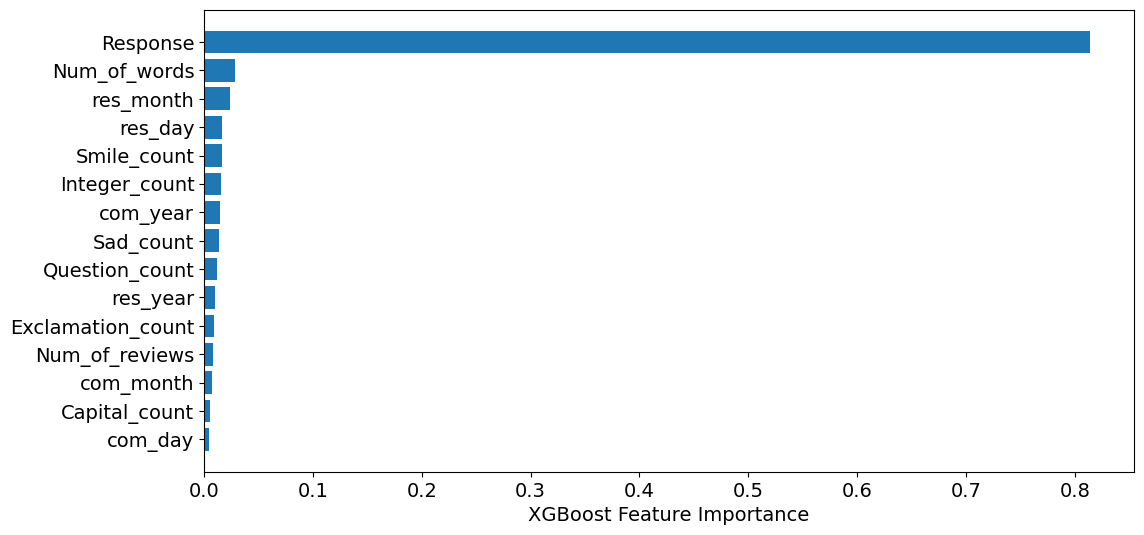

In [32]:
# Updates the size of the diagrams and the font size
plt.rcParams.update({'figure.figsize': (12.0, 6.0)})
plt.rcParams.update({'font.size': 14})

# Retrieving and sorting the Feature Importance values
sorted_idx = xgb_best.feature_importances_.argsort()

data= data_nn.drop('Comment', axis=1)

# Bar chart
plt.barh(data.columns[sorted_idx], xgb_best.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.show();

### SHAP 

The code uses the SHAP (SHapley Additive exPlanations) library to visualise feature importance for an XGBoost model.

[12:40:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


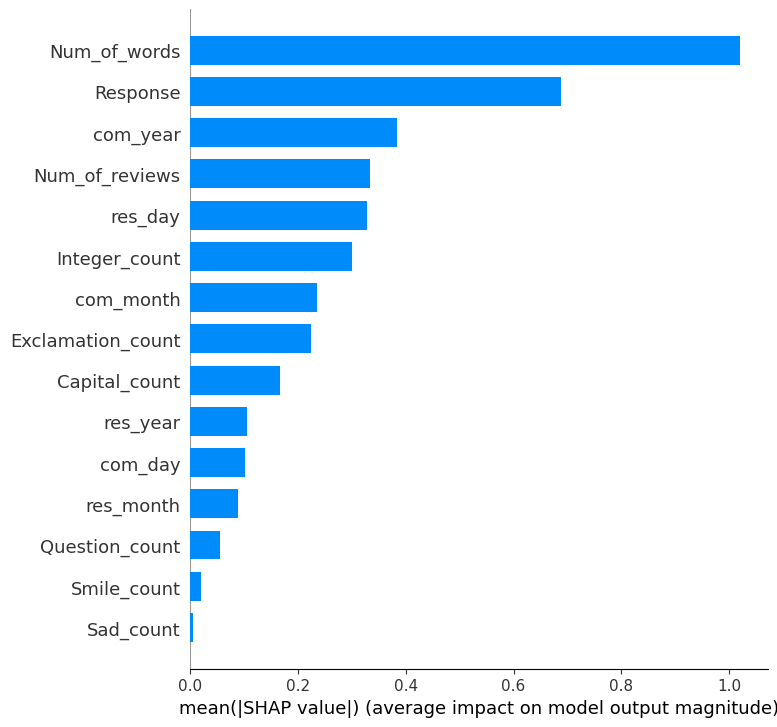

In [18]:
# Import
import shap

explainer = shap.TreeExplainer(xgb_best)
X_test= X_test_nn.drop('Comment',axis=1)
shap_values = explainer.shap_values(X_test)

column_names = data_nn.drop('Comment', axis=1)
column_names = column_names.columns
shap.summary_plot(shap_values,column_names, plot_type="bar")

### LIME 

LIME (Local Interpretable Model-agnostic Explanations) is a machine learning model interpretation method that focuses on explaining predictions for specific data points. Unlike global interpretation methods such as Feature Importance or SHAP, LIME focuses on the local explanation of individual predictions.


Example for a postive review:

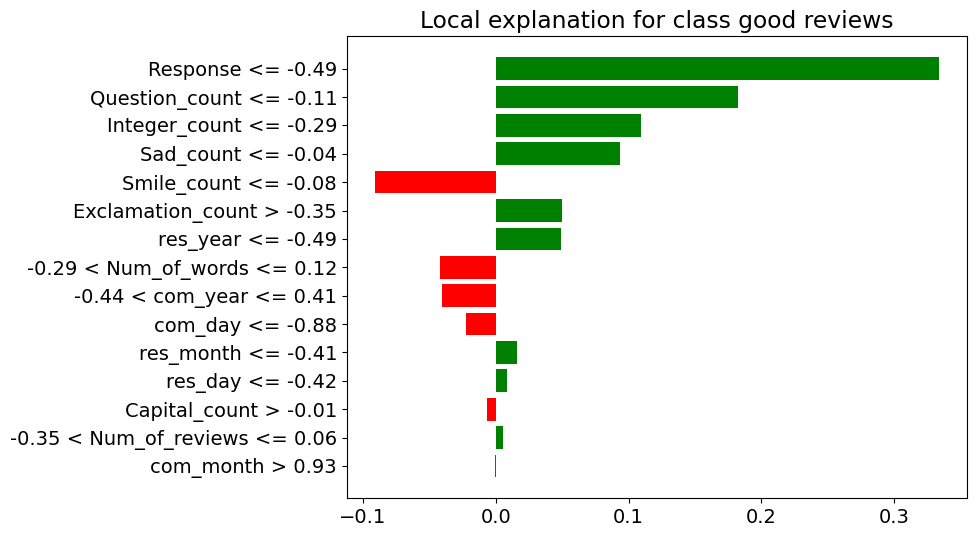

In [22]:
# Import
from lime.lime_tabular import LimeTabularExplainer

column_names = data_nn.drop('Comment', axis=1)
column_names = column_names.columns

predict_fn = lambda x: xgb_best.predict_proba(x).astype(float)
X_train_array = X_train_nn.drop('Comment', axis=1).values

# Prepare data (Dummy variables for categorical features)
X_test_encoded = pd.get_dummies(X_test_nn.drop('Comment', axis=1))


# Create LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_array,
    feature_names=column_names,
    class_names=['bad reviews', 'good reviews'],
    kernel_width=5)

# Explain an instance
exp = explainer.explain_instance(X_test_encoded.iloc[5698, :].values, predict_fn, num_features=15)

# Visualize the explanation with adjusted figure size
fig = exp.as_pyplot_figure()
fig.set_size_inches(8, 6) 

# Show the figure
plt.show()

In [23]:
exp.show_in_notebook(show_all=False)

Example for a negative review:

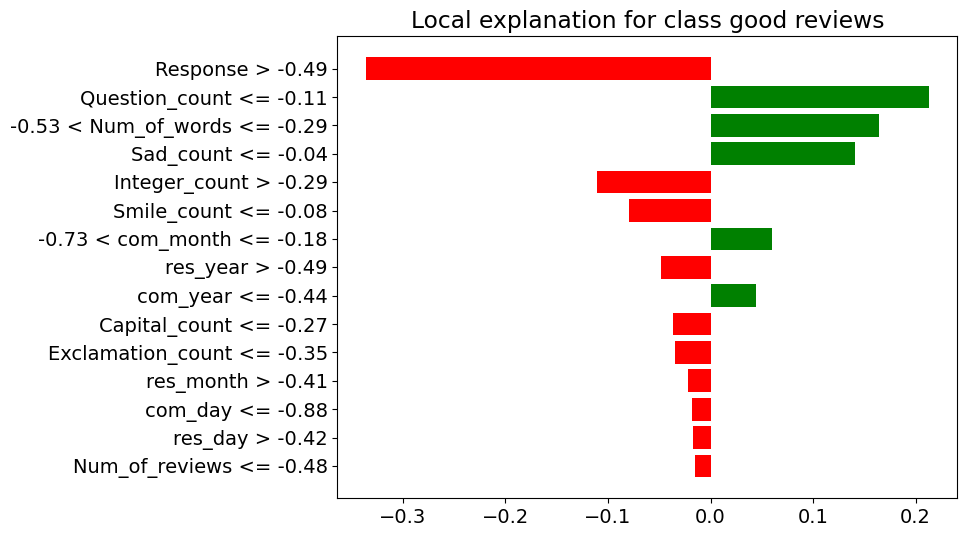

In [24]:
# Import
from lime.lime_tabular import LimeTabularExplainer

column_names = data_nn.drop('Comment', axis=1)
column_names = column_names.columns

predict_fn = lambda x: xgb_best.predict_proba(x).astype(float)
X_train_array = X_train_nn.drop('Comment', axis=1).values

# Prepare data (Dummy variables for categorical features)
X_test_encoded = pd.get_dummies(X_test_nn.drop('Comment', axis=1))


# Create LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_array,
    feature_names=column_names,
    class_names=['bad reviews', 'good reviews'],
    kernel_width=5)

# Explain an instance
exp = explainer.explain_instance(X_test_encoded.iloc[2595, :].values, predict_fn, num_features=15)

# Visualize the explanation with adjusted figure size
fig = exp.as_pyplot_figure()
fig.set_size_inches(8, 6) 

# Show the figure
plt.show()

In [25]:
exp.show_in_notebook(show_all=False)

## Interpretion of the text model 


### Feature Importance 

In [33]:
# Retrieve the coefficients (weights) of the features from the trained model
coefficients = best_lr_txt_TF_2.coef_

# Display feature importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = list(zip(feature_names, coefficients[0]))

top_n = 10

# Sort the features by importance in descending order
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the top 'top_n' features
for feature, importance in sorted_feature_importance[:top_n]:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: exactly manufacture, Importance: 20.602165480663544
Feature: easierhowever, Importance: 18.428388490847038
Feature: graciously, Importance: 18.379950296147737
Feature: pointless gumpf, Importance: -17.412553485937092
Feature: lot could, Importance: 16.70669069927636
Feature: working sturdy, Importance: -15.514584607399005
Feature: amazement true, Importance: 15.33543535243459
Feature: bent bad, Importance: 14.334649514668222
Feature: telling great, Importance: -13.982071050128283
Feature: family self, Importance: 13.28066778574765


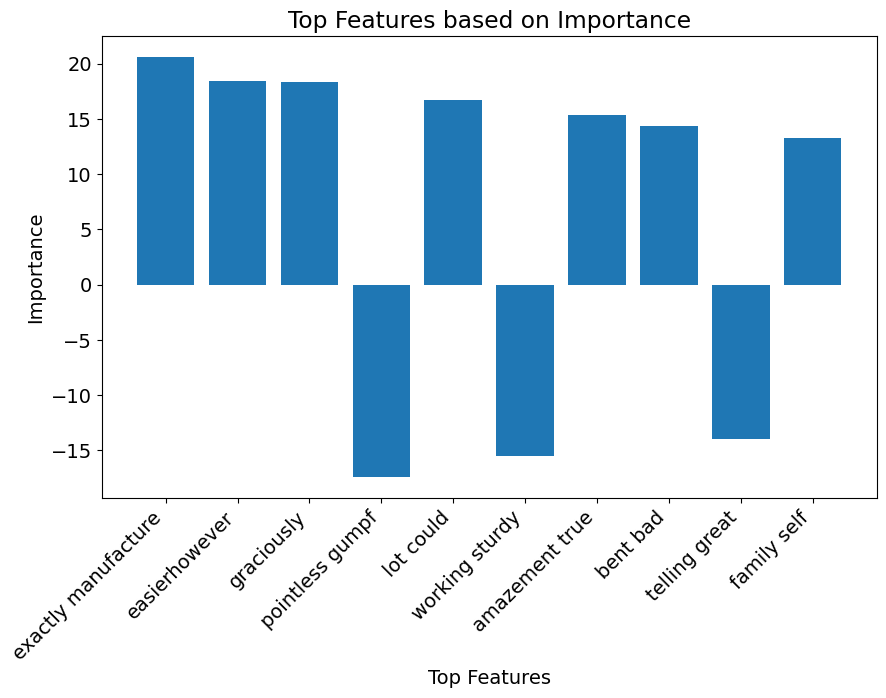

In [34]:
# Extract top features and their importance
top_features = [feature for feature, _ in sorted_feature_importance[:top_n]]
top_importance = [importance for _, importance in sorted_feature_importance[:top_n]]

# Create a sorted bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importance)
plt.xlabel('Top Features')
plt.ylabel('Importance')
plt.title('Top Features based on Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

**Meaning of the "Importance" values:**

The "Importance" values represent the strength and direction of the influence. Positive values contribute to class 1 (positive sentiment), while negative values contribute to class 0 (negative sentiment).
The greater the absolute value of the coefficient, the stronger the influence of the corresponding word on the predictions of the model.

____________________________________________________________________________________________________________________________________________________

## Interpretation of the Neuronal network model

### Feature Importance for numeric features

In [28]:
# Feature Importance for numeric features
numeric_feature_names = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(input_features=col)
all_feature_names = np.concatenate([numeric_feature_names, vectorizer.get_feature_names_out()])

# Important features
important_features = all_feature_names[selector_numeric.get_support(indices=True)]

print("Important feature:", important_features)

Important feature: ['Num_of_reviews' 'Response' 'com_day' 'com_month' 'com_year' 'res_day'
 'res_month' 'res_year' 'Num_of_words' 'Capital_count']


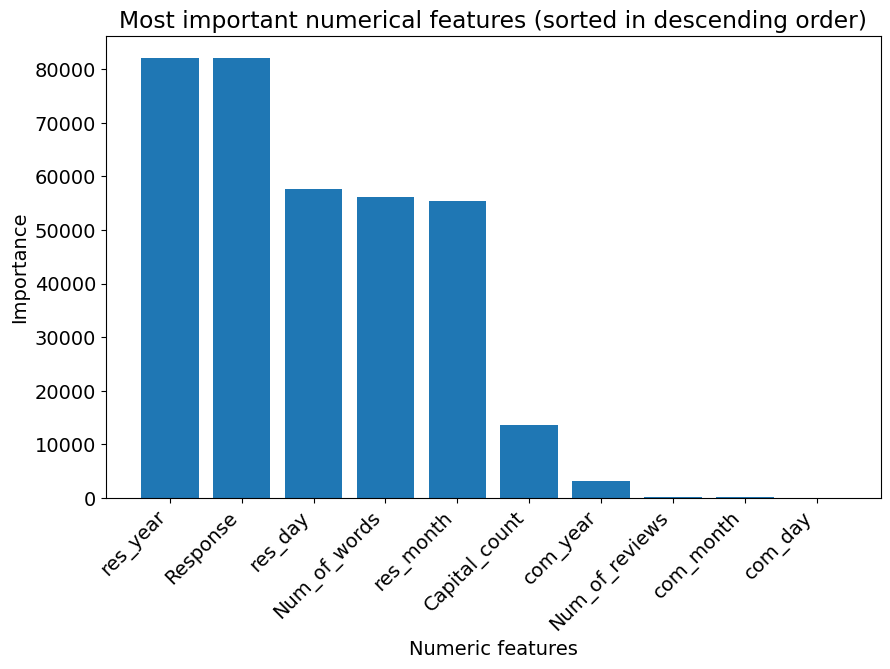

In [29]:
# Sort the most important numerical features in descending order of importance
sorted_indices_numeric = np.argsort(selector_numeric.scores_[selector_numeric.get_support()])[::-1]
sorted_numeric_features = important_features[sorted_indices_numeric]

# Barplot for the most important numerical characteristics
plt.figure(figsize=(10, 6))
plt.bar(sorted_numeric_features, selector_numeric.scores_[selector_numeric.get_support()][sorted_indices_numeric])
plt.xlabel('Numeric features')
plt.ylabel('Importance')
plt.title('Most important numerical features (sorted in descending order)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Feature Importance for text features

In [35]:
# Initialize the text feature selector
k_best_text = 10  
selector_text = SelectKBest(f_classif, k=k_best_text)

# Apply text feature preprocessing to the training data
X_train_text_selected = selector_text.fit_transform(X_train_comment_tfidf, y_train_nn)

# The most important text features and their scores
text_feature_importance = selector_text.scores_

# Sort the text features in descending order of importance
indices_text = np.argsort(text_feature_importance)[::-1]

# The top k text features and their scores
top_k_text_features = text_feature_importance[indices_text][:k_best_text]

# Print the dimensions again
print("Dimensions of top_k_text_features:", top_k_text_features.shape)

# The top k text features and their scores
top_k_feature_names = np.array(vectorizer.get_feature_names_out())[indices_text][:k_best_text]

# Print the top k text features and their scores
for feature_name, importance in zip(top_k_feature_names, top_k_text_features):
    print(f"Feature: {feature_name}, Importance: {importance}")

Dimensions of top_k_text_features: (10,)
Feature: still, Importance: 17828.718791300373
Feature: week, Importance: 16859.13378088128
Feature: told, Importance: 15164.288452301898
Feature: email, Importance: 14271.586416740838
Feature: month, Importance: 11566.529833742328
Feature: back, Importance: 11534.764560384765
Feature: poor, Importance: 9860.56117431631
Feature: call, Importance: 9657.837159981857
Feature: samsung, Importance: 9047.701335589965
Feature: great, Importance: 8844.800053039626


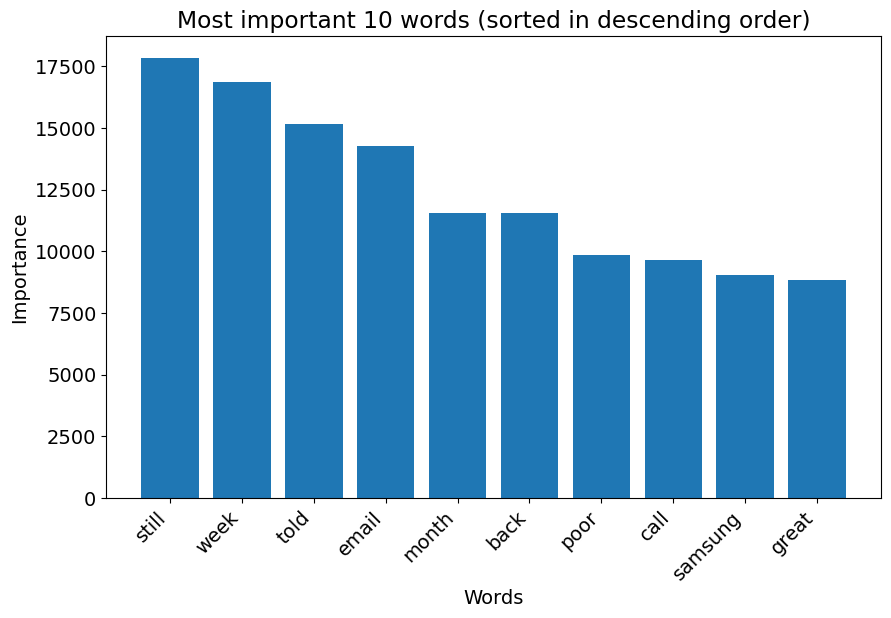

In [36]:
# Plot the most important 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_k_feature_names[:20], top_k_text_features[:20])
plt.xlabel('Words')
plt.ylabel('Importance')
plt.title('Most important 10 words (sorted in descending order)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Project Conclusion

This comprehensive report on the classification of Trustpilot reviews covered several key themes, ranging from data exploration and visualization to text mining, various machine learning models for classification, cluster analysis, and a neural network for text and metadata. The central theme of review classification was deepened through the implementation of advanced techniques. Here are the key insights and implications:

## Achieved Project Goals:

1. **Effective Data Cleaning and Preparation:**
   Thorough data exploration and preparation laid the foundation for reliable analyses. Techniques such as numerical feature selection, missing value imputation, and text cleaning effectively prepared the data.

2. **Accurate Sentiment Classification:**
   The application of various models, including XGBoost, Logistic Regression, and a neural network, led to precise sentiment classification. The models demonstrated high accuracy and performance on the test dataset.

3. **High Accuracy and Performance:**
   The presented models, particularly the neural network, achieved a remarkable accuracy of 94.57%. Visualizing losses and accuracies during the training process confirmed effective learning without signs of overfitting.

4. **Effective Visualization and Interpretation:**
   Model interpretation was conducted through Feature Importance analyses, SHAP analyses, and LIME explanations. These approaches provided comprehensive insights into the factors influencing model predictions, be it metadata, bigrams, or specific words.

5. **Customer Satisfaction and Engagement:**
   The precise classification of customer reviews enables targeted responses to both positive and negative feedback, enhancing customer engagement and satisfaction.



## Future Improvement Suggestions:

Despite the success of this project, there is room for future enhancements:

- **Data Quality:**
  Continuous monitoring and improvement of data quality are crucial to ensuring model robustness.

- **Expansion of Data Sources:**
  Including additional data sources could further improve model accuracy and significance.

- **Experimentation with Additional Models:**
  Trying different models and optimization techniques could lead to even more advanced results.


In summary, this project has achieved its goals and provided a clear path for leveraging machine learning and text analysis in review classification. The economic benefits and insights gained should aid businesses in strengthening customer relationships and optimizing their services.